# Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models.

In [1]:
# Importing the required packages.

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

from collections import Counter

# Understanding the data

In [2]:
# Importing and reading the csv file.

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Checking datatypes of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
# Checking the shape of data.

df.shape

(284807, 31)

In [5]:
# Checking the distribution and statistics of numerical attributes.

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Cleaning

In [6]:
# Checking the null values in our data.

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**As this dataset is PCA transformed there are no null values.**

In [7]:
# Also the 'time' variable indicates the seconds elapsed between the first transaction in the data set and the subsequent transactions.
# We don't need it for our analysis. So dropping that variable.

df = df.drop(['Time'], axis = 1)
print(df.shape)

(284807, 30)



# Exploratory Data Analysis

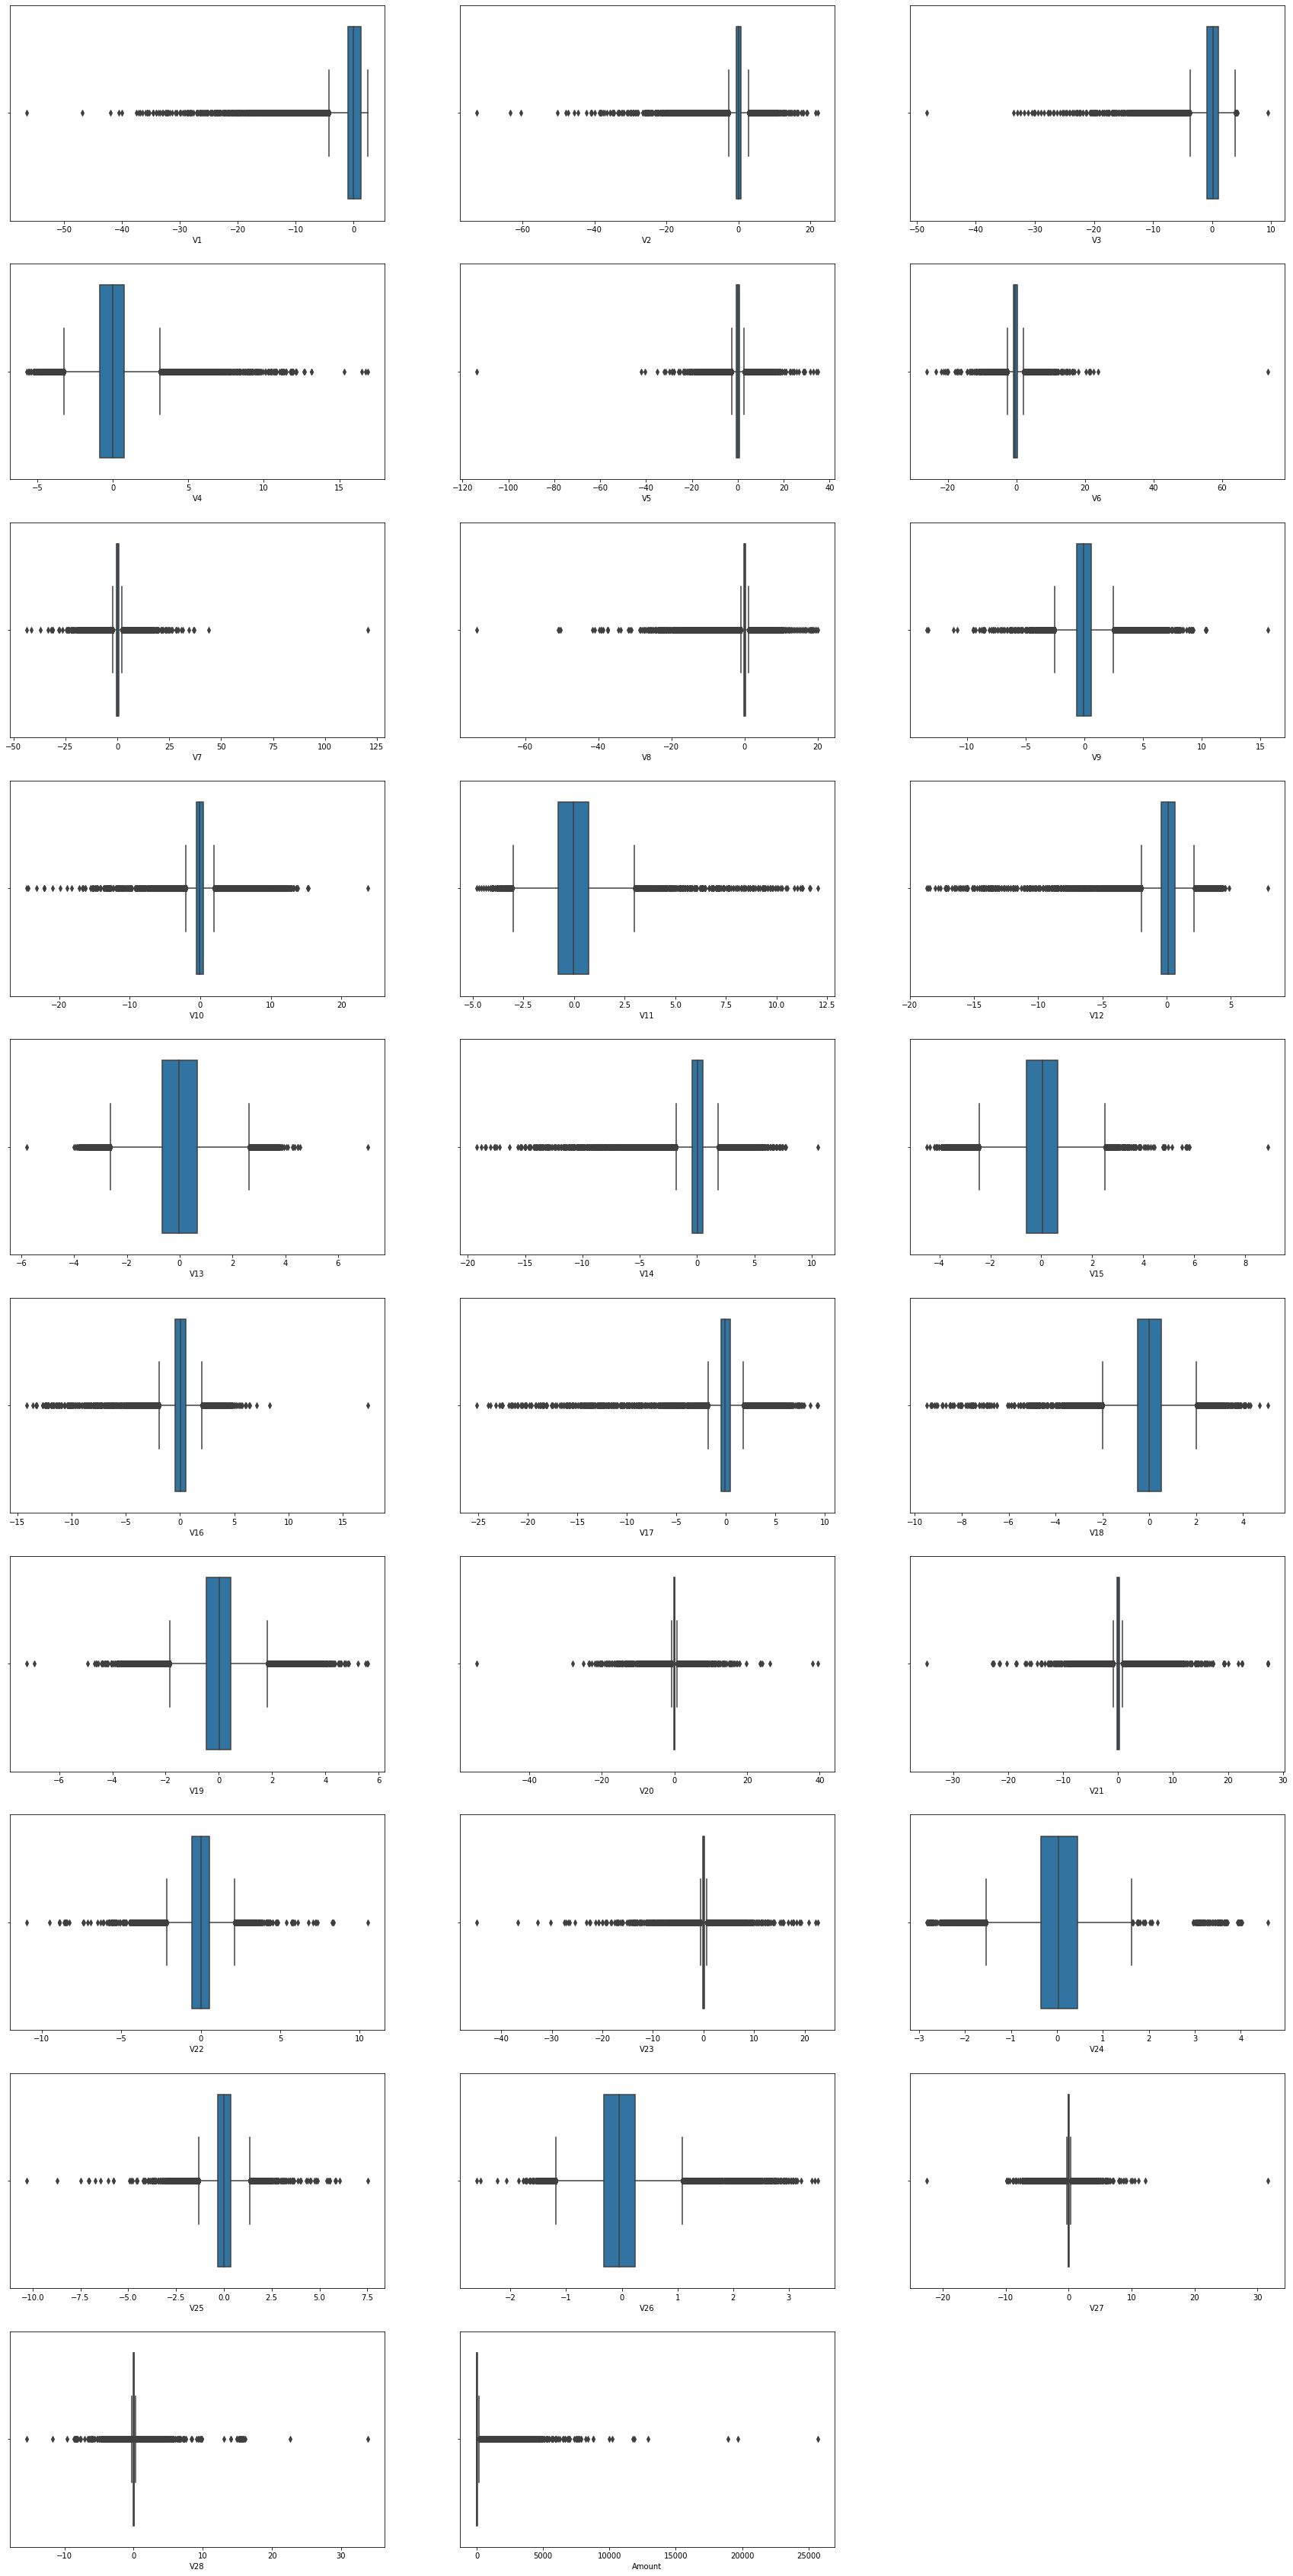

In [8]:
# Boxplots to check the data distribution.

cols = list(df.columns)
cols.remove('Class')

plt.figure(figsize = (30, 180))

for i in enumerate(cols):
    ax = plt.subplot(len(cols), 3, i[0]+1)
    sns.boxplot(x = i[1], data = df)

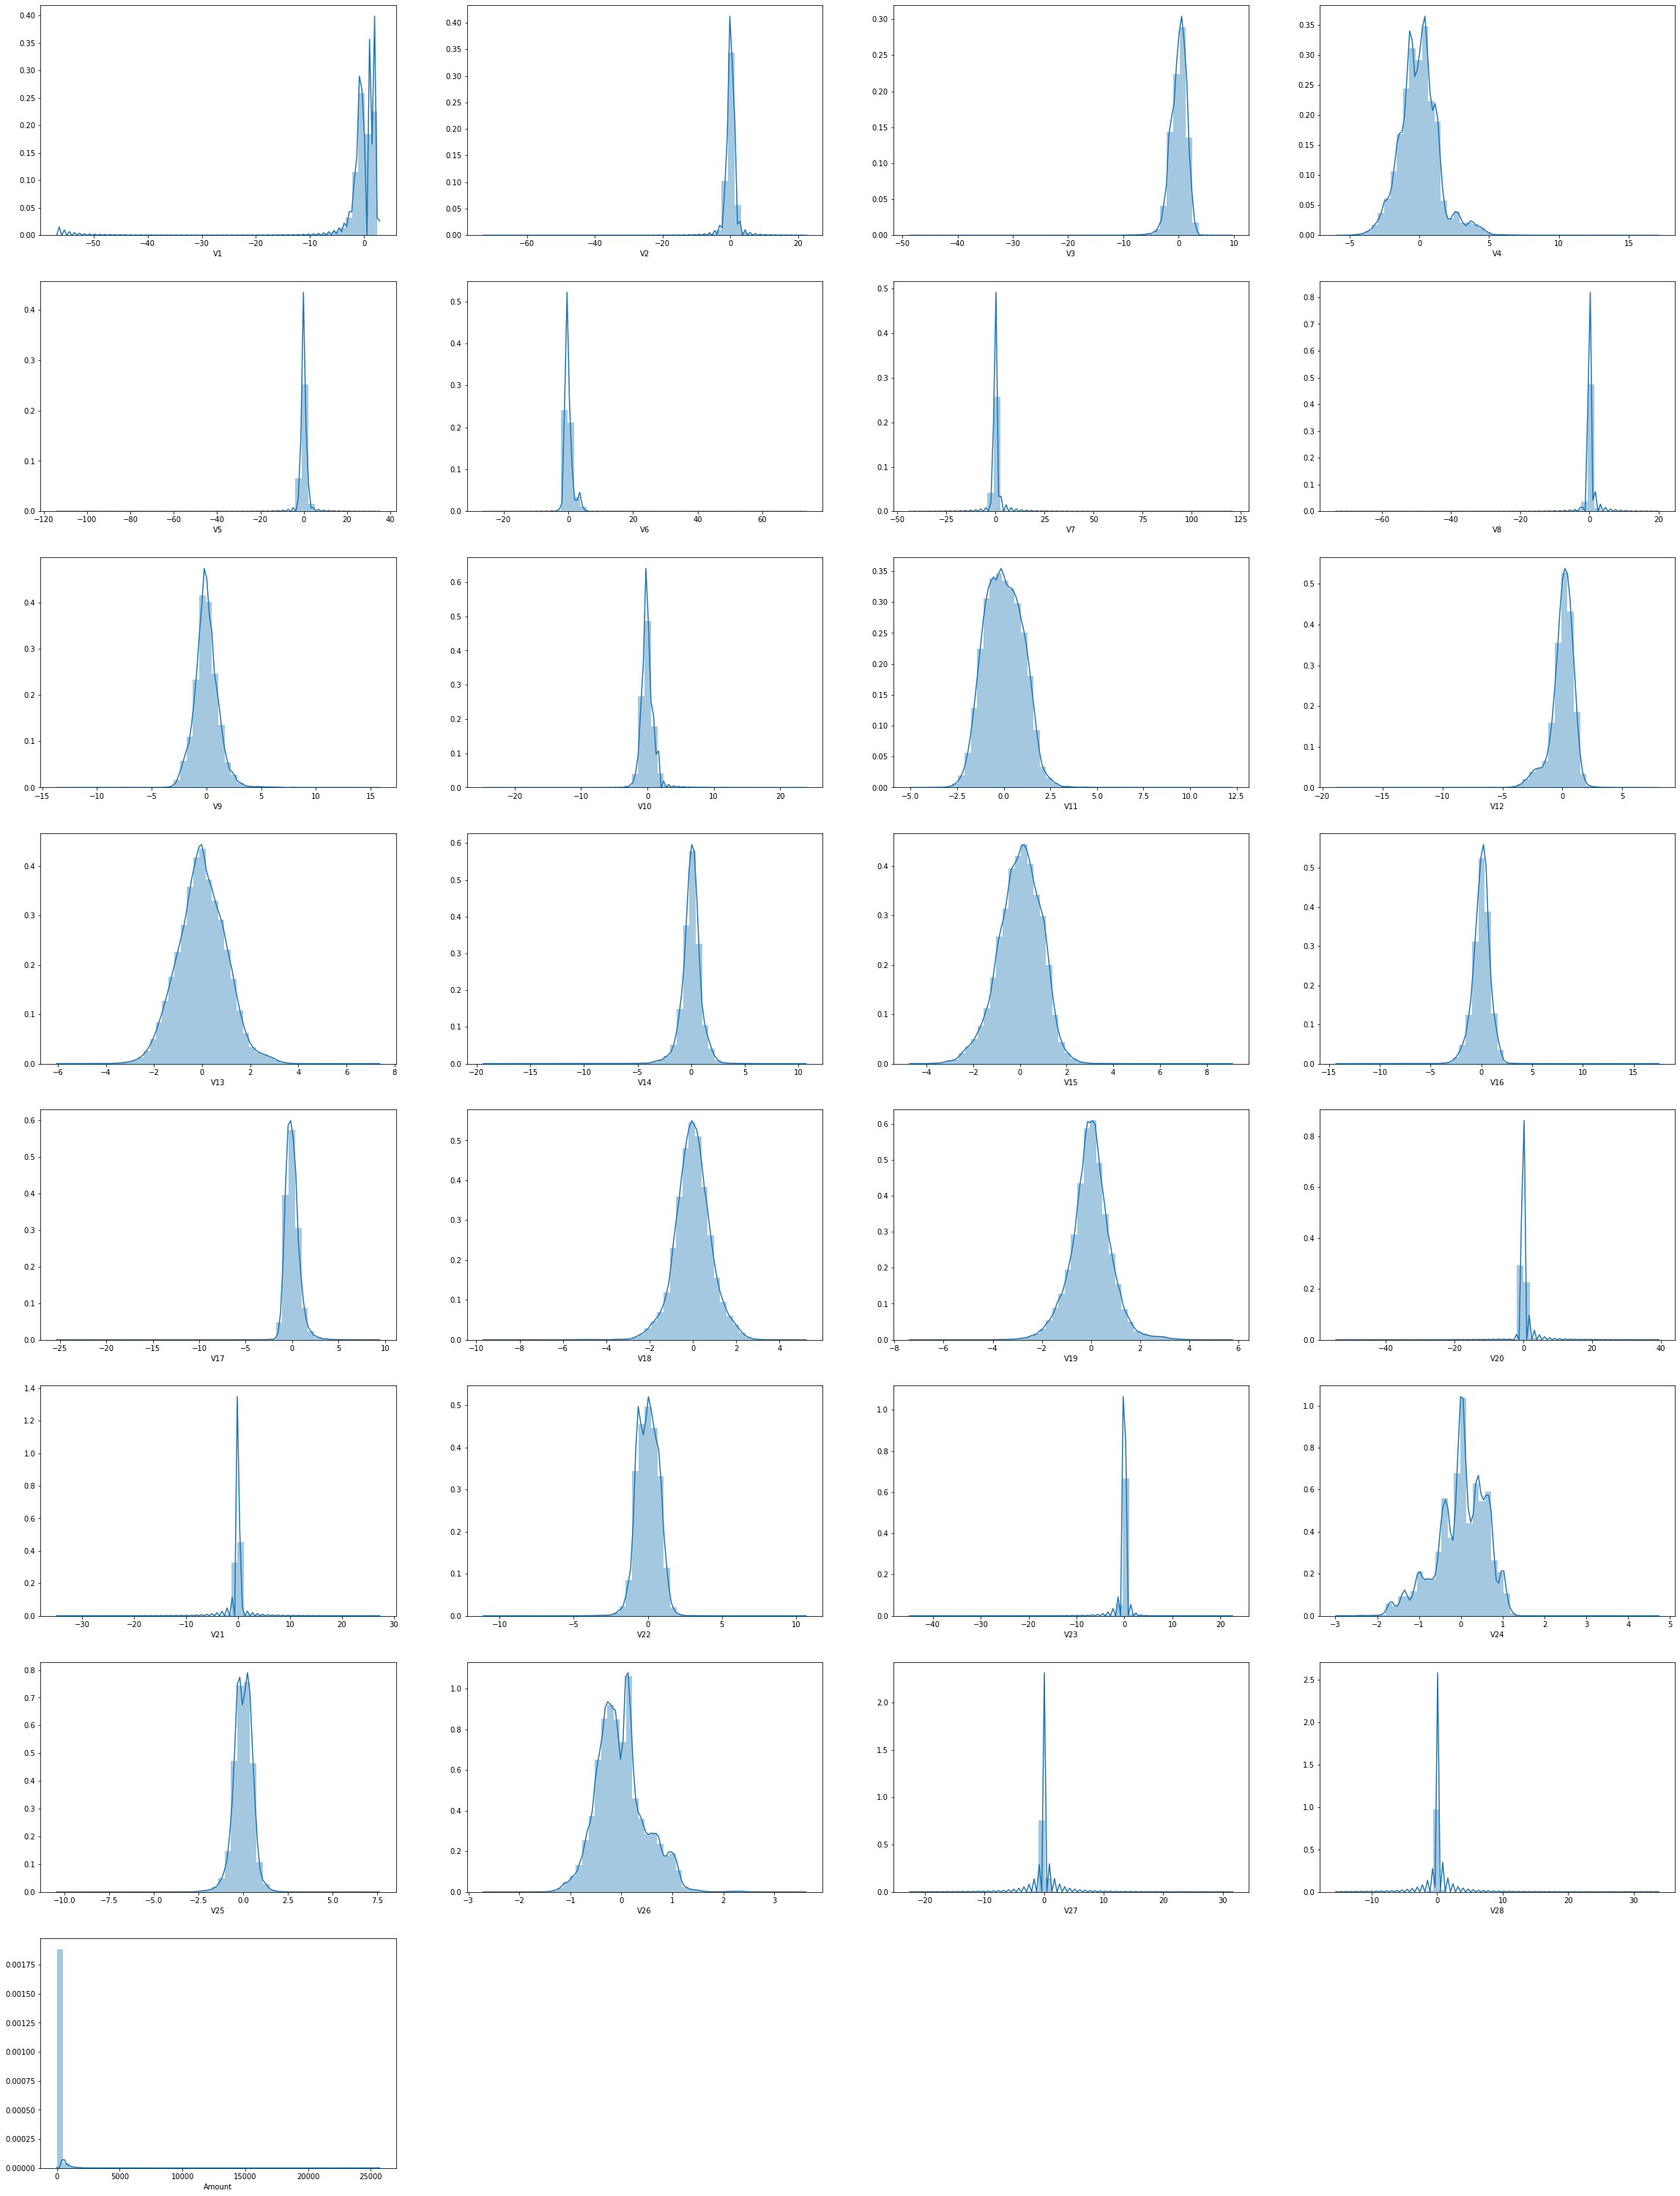

In [9]:
# Checking the skeweness of the variables through histplots.

plt.figure(figsize = (40, 200))

for i in enumerate(cols):
    ax = plt.subplot(len(cols), 4, i[0]+1)
    sns.distplot(df[i[1]])

**More or less all the variables are distributed normally except the 'Amount' variable. We can log transform that variable later.**

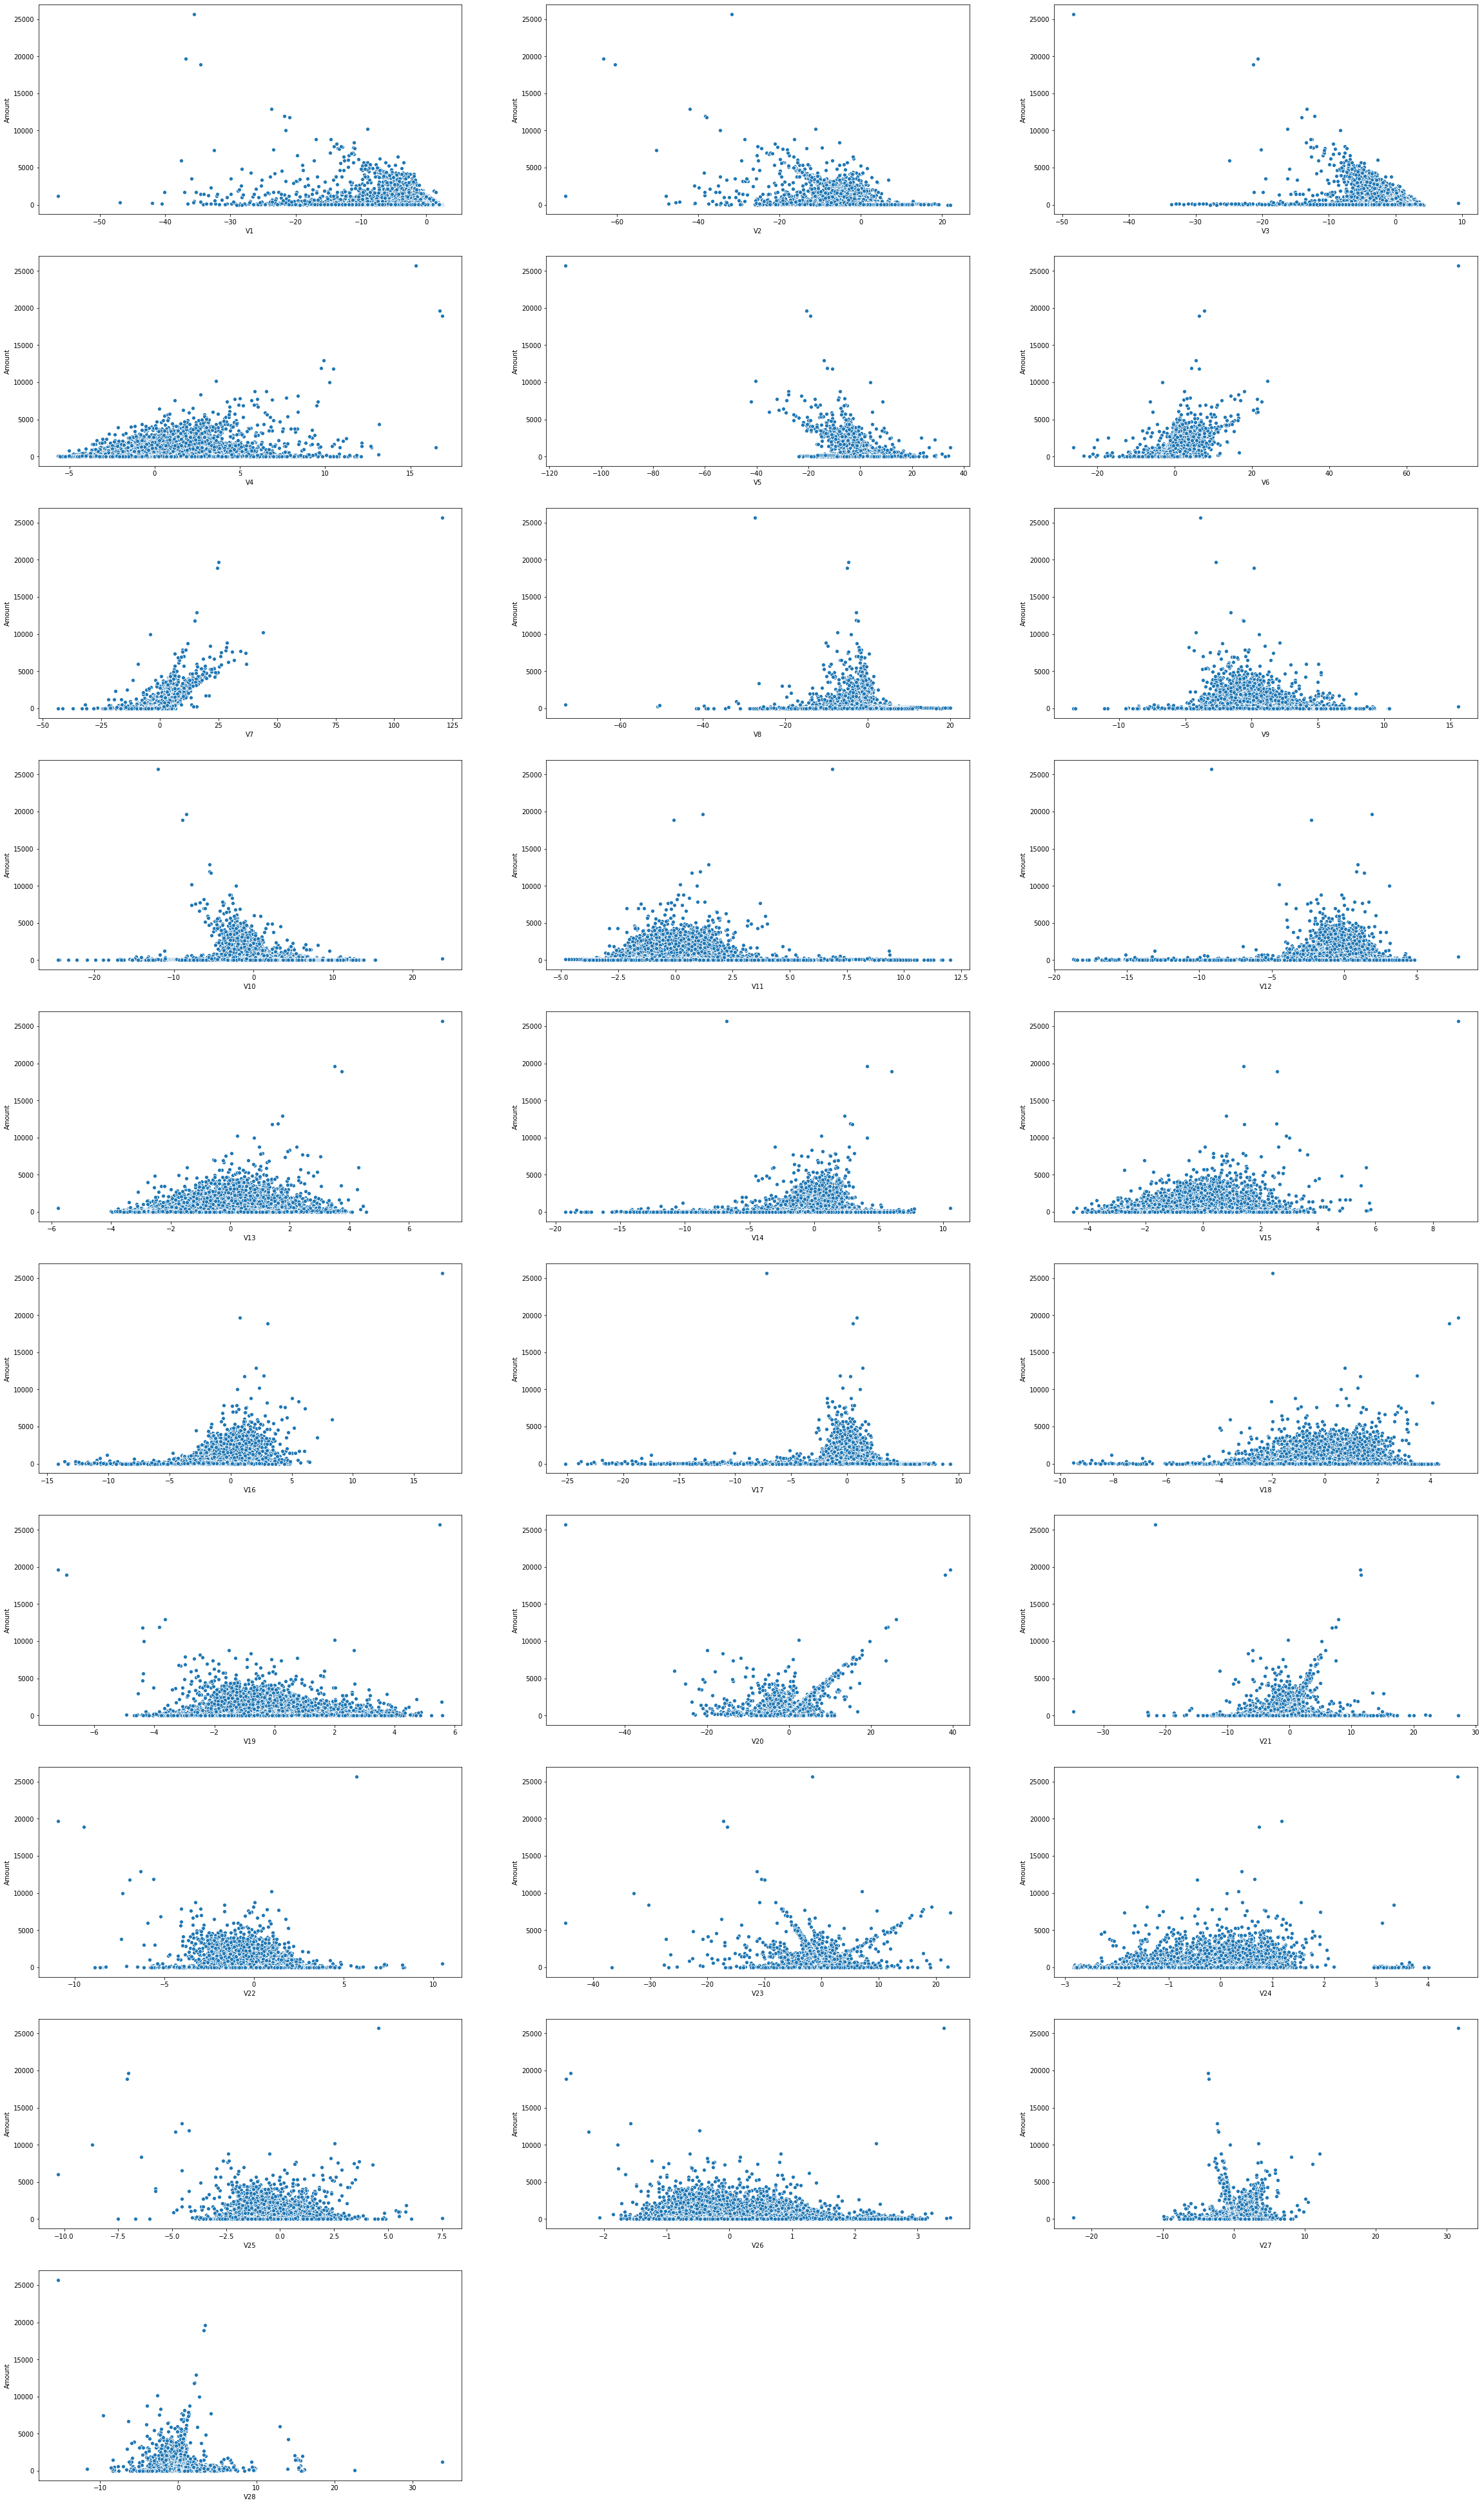

In [10]:
# Visualizing the amount and each PCA transformed variable using scatter plots.

cols_1 = cols[:-1]

plt.figure(figsize = (40, 200))

for i in enumerate(cols_1):
    ax = plt.subplot(len(cols_1), 3, i[0]+1)
    sns.scatterplot(x = df[i[1]], y = 'Amount', data = df)

In [11]:
# Observing the distribution of target variable.

classes = df['Class'].value_counts()

normal_share = classes[0] / df['Class'].count()*100
fraud_share = classes[1] / df['Class'].count()*100

print(classes)
print(normal_share)
print(fraud_share)

0    284315
1       492
Name: Class, dtype: int64
99.82725143693798
0.1727485630620034


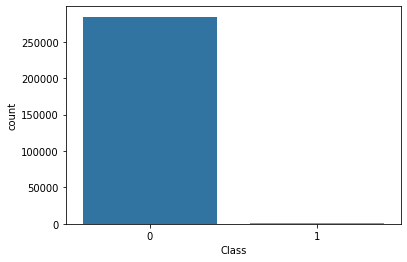

In [12]:
# Creating a count plot for the number of fraudulent vs non-fraudulent transcations.

sns.countplot(x = 'Class', data = df)

**As we see there is huge class imbalance in our data. We need treat this using oversampling techniques later.**

# Splitting the data into train & test sets

In [13]:
# Splitting the data into X and y sets first.

X = df.drop(['Class'], axis = 1)
y = df.Class

In [14]:
# Splitting the data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0, stratify = y)

In [15]:
# Checking the splits.

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(199364, 29)
(199364,)
(85443, 29)
(85443,)


# Transforming the skewed variables in our data.

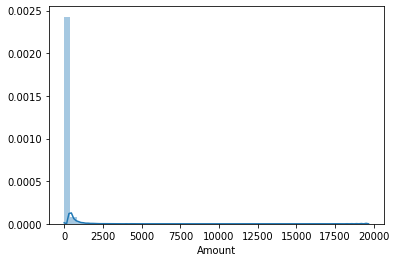

In [16]:
# From the above distplots, all the variables except the 'Amount' variable are more or less gaussian.

sns.distplot(X_train.Amount)

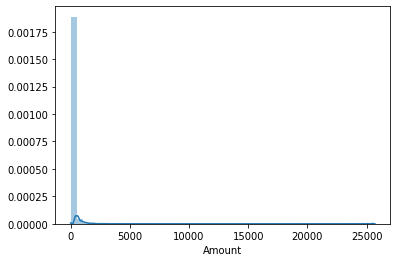

In [17]:
# Similarly checking the distribution of the same in test data.

sns.distplot(X_test.Amount)

In [18]:
# Transforming the 'Amount' variable using logarithmic scale.

X_train.Amount = np.log(X_train.Amount)
X_test.Amount = np.log(X_test.Amount)

In [19]:
# Checking for the presence of any positive or negative infinities in log transformed data.

a = [i for i in X_train.Amount if i == float('-inf')]
b = [i for i in X_train.Amount if i == float('inf')]
c = [i for i in X_test.Amount if i == float('-inf')]
d = [i for i in X_test.Amount if i == float('inf')]

print(len(a))
print(len(b))
print(len(c))
print(len(d))

1260
0
565
0


In [20]:
# We have '-inf' in our data, so replacing those values with '0' as it would cause some errors while plotting distplots and while model building.

X_train.Amount = [0 if i == float('-inf') else i for i in X_train.Amount]
X_test.Amount = [0 if i == float('-inf') else i for i in X_test.Amount]


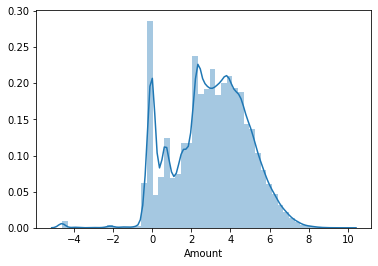

In [21]:
# Checking the distribution of train data after log transformation.

sns.distplot(X_train.Amount)

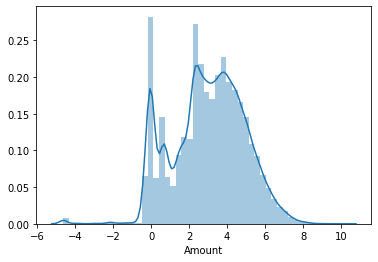

In [22]:
# Checking the distribution of test data after log transformation.

sns.distplot(X_test.Amount)

**Now our plots look more or less gaussian. Moving on to model building.**

# Model Building on Imbalanced dataset
- Building different models on the imbalanced dataset and comparing their results.

### Logistic Regression

In [23]:
# Fitting the logistic regression model using sklearn.
# Performing feature selection using RFECV.

logreg = LogisticRegression(random_state = 0)

rfecv = RFECV(logreg, step = 1, cv = 3)

rfecv = rfecv.fit(X_train, y_train)

In [24]:
# '.support_' gives an array of boolean values of which, True indicates that those columns are selected after applyng RFECV.

rfecv.support_

array([False, False,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True])

In [25]:
# Obtaining list of all the variables with boolean and ranking beside.
# Those with 'True' are the 15 variables selected using RFECV.
# '.ranking_' assigns rank to each variable.

list(zip(X_train.columns, rfecv.support_, rfecv.ranking_))

[('V1', False, 8),
 ('V2', False, 6),
 ('V3', True, 1),
 ('V4', True, 1),
 ('V5', False, 9),
 ('V6', True, 1),
 ('V7', False, 7),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', False, 4),
 ('V12', False, 3),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', False, 2),
 ('V16', True, 1),
 ('V17', False, 10),
 ('V18', False, 11),
 ('V19', False, 5),
 ('V20', True, 1),
 ('V21', True, 1),
 ('V22', True, 1),
 ('V23', True, 1),
 ('V24', True, 1),
 ('V25', False, 12),
 ('V26', False, 13),
 ('V27', True, 1),
 ('V28', True, 1),
 ('Amount', True, 1)]

In [26]:
# Pulling out the variables with boolean 'True' and assigning them to a variable.

Features = X_train.columns[rfecv.support_]
Features

Index(['V3', 'V4', 'V6', 'V8', 'V9', 'V10', 'V13', 'V14', 'V16', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V27', 'V28', 'Amount'],
      dtype='object')

In [27]:
# Assessing the model with StatsModels.
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept.
# Hence, we need to use the command 'add_constant' so that it also fits an intercept.

X_train_sm = sm.add_constant(X_train[Features])

logreg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

Model = logreg.fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199346
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -753.49
Date:                Sun, 15 Nov 2020   Deviance:                       1507.0
Time:                        14:56:29   Pearson chi2:                 9.65e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8709      0.221    -40.114      0.000      -9.304      -8.437
V3             0.0876      0.038      2.317      0.021       0.013       0.162
V4             0.6557      0.065     10.025      0.000       0.528       0.784
V6            -0.1608      0.065     -2.464      0.014      -0.289      -0.033
V8            -0.2165      0.027     -7.942      0.000      -0.270      -0.163
V9            -0.2044      0.098     -2.079      0.038      -0.397      -0.012
V10           -0.6767      0.105     -6.433      0.000      -0.883      -0.471
V13           -0.2420      0.096     -2.512      0.012      -0.431      -0.053
V14           -0.6234      0.059    -10.519      0.000      -0.740      -0.507
V16           -0.2662      0.070     -3.822      0.000      -0.403      -0.130
V20           -0.2126      0.066     -3.243      0.001      -0.341      -0.084
V21            0.3391      0.065      5.193      0.000       0.211       0.467
V22            0.5379      0.149      3.610      0.000       0.246       0.830
V23           -0.1453      0.064     -2.255      0.024      -0.272      -0.019
V24            0.1162      0.178      0.651      0.515      -0.233       0.466
V27           -0.4283      0.145     -2.952      0.003      -0.713      -0.144
V28           -0.1141      0.100     -1.146      0.252      -0.309       0.081
Amount         0.0877      0.049      1.798      0.072      -0.008       0.183
==============================================================================
"""

In [28]:
# Getting the predicted y-values on the train set.
# Looking at the first ten values.

y_train_pred = Model.predict(X_train_sm)
y_train_pred[:10]

211605    4.523470e-09
231628    1.375222e-04
110643    6.617904e-04
11478     4.945814e-05
243724    4.920387e-04
281000    8.854751e-05
95360     8.775967e-04
151631    1.769865e-02
140168    4.920543e-04
81304     3.966300e-05
dtype: float64

In [29]:
# Reshaping the data.
# Numpy allow us to give one of new shape parameter as -1. 
# It simply means that it is an unknown dimension and we want numpy to figure it out.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.52347009e-09, 1.37522166e-04, 6.61790369e-04, 4.94581387e-05,
       4.92038669e-04, 8.85475145e-05, 8.77596721e-04, 1.76986509e-02,
       4.92054269e-04, 3.96629963e-05])

In [30]:
# Creating a dataframe with the actual frauds and the predicted probabilities.

Prob = pd.DataFrame({'Class' : y_train.values, 'Predicted_prob' : y_train_pred})

Prob['Index'] = y_train.index

Prob.head()

,Class,Predicted_prob,Index
0,0,4.523470e-09,211605
1,0,1.375222e-04,231628
2,0,6.617904e-04,110643
3,0,4.945814e-05,11478
4,0,4.920387e-04,243724


In [31]:
# Creating new column 'Predicted' with values '1' if 'Predicted_prob > 0.5' else '0'.

Prob['Predicted'] = Prob.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob.head()

,Class,Predicted_prob,Index,Predicted
0,0,4.523470e-09,211605,0
1,0,1.375222e-04,231628,0
2,0,6.617904e-04,110643,0
3,0,4.945814e-05,11478,0
4,0,4.920387e-04,243724,0


In [32]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs.

VIF = pd.DataFrame()

VIF['Variables'] = X_train[Features].columns

VIF['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF['VIF'] = round(VIF['VIF'], 2)

VIF = VIF.sort_values(by = "VIF", ascending = False)

VIF

,Variables,VIF
16,Amount,1.02
9,V20,1.01
2,V6,1.01
15,V28,1.00
14,V27,1.00
13,V24,1.00
12,V23,1.00
11,V22,1.00
10,V21,1.00
0,V3,1.00


In [33]:
# Evaluating our model.

confusion_matrix_1 = confusion_matrix(Prob.Class, Prob.Predicted)

print(confusion_matrix_1)

[[198996     24]
 [   123    221]]


In [34]:
# Just checking the accuracy of our model even though it's not a correct metric to compare with.

Accuracy = accuracy_score(Prob.Class, Prob.Predicted)
Accuracy

0.9992626552436749

In [35]:
# Lets derive the following to derive other metrics of our model.

TP = confusion_matrix_1[1,1] # true positive 
TN = confusion_matrix_1[0,0] # true negatives
FP = confusion_matrix_1[0,1] # false positives
FN = confusion_matrix_1[1,0] # false negatives

In [36]:
# Let's see the sensitivity of our logistic regression model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.6424418604651163

In [37]:
# Let's see the specificity of our logistic regression model.

Specificity = TN / float(TN+FP)
Specificity

0.9998794091046126

**Clearly our model has very high specificity and low sensitivity. Lets try optimizing the cutoff value and re-evaluate our model.**

In [38]:
# Let's create columns with different probability cutoffs ranging from 0 to 1.

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    Prob[i] = Prob.Predicted_prob.map(lambda x: 1 if x > i else 0)

Prob.head()

,Class,Predicted_prob,Index,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,4.523470e-09,211605,0,1,0,0,0,0,0,0,0,0,0
1,0,1.375222e-04,231628,0,1,0,0,0,0,0,0,0,0,0
2,0,6.617904e-04,110643,0,1,0,0,0,0,0,0,0,0,0
3,0,4.945814e-05,11478,0,1,0,0,0,0,0,0,0,0,0
4,0,4.920387e-04,243724,0,1,0,0,0,0,0,0,0,0,0


In [39]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

Metrics = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

for i in numbers:
    a = metrics.confusion_matrix(Prob.Class, Prob[i])
    b = sum(sum(a))
    Accuracy = (a[0,0] + a[1,1])/b
    Specificity = a[0,0]/(a[0,0] + a[0,1])
    Sensitivity = a[1,1]/(a[1,0] + a[1,1])
    Metrics.loc[i] = [i, Accuracy, Sensitivity, Specificity]

print(Metrics)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.001725     1.000000     0.000000
0.1          0.1  0.999308     0.805233     0.999643
0.2          0.2  0.999278     0.752907     0.999704
0.3          0.3  0.999273     0.700581     0.999789
0.4          0.4  0.999273     0.668605     0.999844
0.5          0.5  0.999263     0.642442     0.999879
0.6          0.6  0.999218     0.616279     0.999879
0.7          0.7  0.999177     0.590116     0.999884
0.8          0.8  0.999132     0.563953     0.999884
0.9          0.9  0.999047     0.514535     0.999884


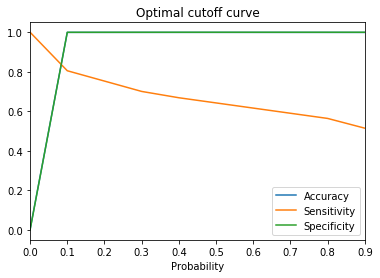

In [40]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

Metrics.plot.line(x ='Probability', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.title('Optimal cutoff curve')
plt.show()

In [41]:
# Adding the column 'final_predicted' to our dataframe which is obtained with the cutoff value 0.1.

Prob['Final_predicted'] = Prob.Predicted_prob.map(lambda x: 1 if x > 0.1 else 0)

Prob.head()

,Class,Predicted_prob,Index,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,4.523470e-09,211605,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1.375222e-04,231628,0,1,0,0,0,0,0,0,0,0,0,0
2,0,6.617904e-04,110643,0,1,0,0,0,0,0,0,0,0,0,0
3,0,4.945814e-05,11478,0,1,0,0,0,0,0,0,0,0,0,0
4,0,4.920387e-04,243724,0,1,0,0,0,0,0,0,0,0,0,0


In [42]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(Prob.Class, Prob.Final_predicted)
Accuracy

0.9993077988001846

In [43]:
# Creating another confusion matrix with probability cutoff at 0.1.

confusion_matrix_2 = confusion_matrix(Prob.Class, Prob.Final_predicted)
confusion_matrix_2

array([[198949,     71],
       [    67,    277]], dtype=int64)

In [44]:
# Lets derive the following to find other metrics.

TP = confusion_matrix_2[1,1] # true positive 
TN = confusion_matrix_2[0,0] # true negatives
FP = confusion_matrix_2[0,1] # false positives
FN = confusion_matrix_2[1,0] # false negatives

In [45]:
# Let's see the sensitivity of our logistic regression model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8052325581395349

In [46]:
# Let's see the specificity of our logistic regression model.

Specificity = TN / float(TN+FP)
Specificity

0.9996432519344789

In [47]:
# Re-checking the optimal cutoff using precision and recall curve.

p, r, thresholds = precision_recall_curve(Prob.Class, Prob.Predicted_prob)

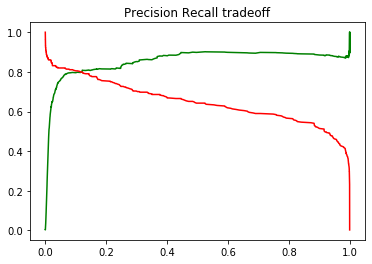

In [48]:
# Drawing the precision recall curve.

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall tradeoff')
plt.show()

#### ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [49]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

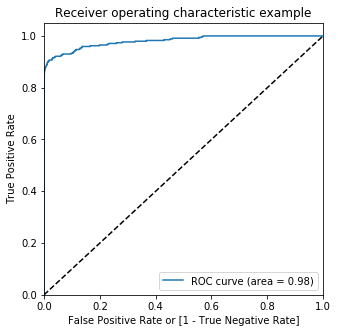

In [50]:
# Drawing ROC curve for our data.

fpr, tpr, thresholds = metrics.roc_curve(Prob.Class, Prob.Predicted_prob, drop_intermediate = False)

draw_roc(Prob.Class, Prob.Predicted_prob)

In [51]:
# Returning the roc_auc_score.

y_true = np.array(Prob.Class)
y_scores = np.array(Prob.Predicted_prob)
roc_auc_score(y_true, y_scores)

0.9802957018460222

In [52]:
# Making predictions on the test set.
# Assigning our final list of columns to 'X_test'.

X_test_final = X_test[Features]
X_test_final.head()

,V3,V4,V6,V8,V9,V10,V13,V14,V16,V20,V21,V22,V23,V24,V27,V28,Amount
170978,-0.514168,-0.675752,-0.681790,-0.096356,0.265313,-1.297842,-0.090956,-1.473774,0.219060,-0.177718,0.114197,0.500593,-0.066669,0.558720,0.079707,0.131678,2.525729
96185,0.947874,-2.101099,-1.037444,0.465090,-1.137320,0.847260,0.242062,0.162456,-0.514267,-0.246449,-0.383548,-0.581462,0.033139,0.483823,0.486383,0.291222,2.302585
30469,1.218361,-1.884626,-1.127801,-0.295973,-1.670308,0.022252,0.844869,-0.325771,0.685727,-0.126990,0.295294,0.836930,-0.367286,0.157457,-0.210861,0.103780,3.399529
266925,-0.855068,-0.506527,-0.197866,0.032557,-0.357041,1.015046,-0.319186,0.212163,-1.123797,-0.519001,-0.298900,-0.427423,0.298094,0.747735,-0.051892,-0.048338,3.917408
14185,0.586617,1.599474,0.114858,0.090062,0.944582,-0.207109,-1.322631,0.105750,0.551669,0.543494,0.299761,0.114989,-0.461395,-0.122341,-0.013775,0.092648,5.940171


In [53]:
# Adding constant to X_test_final.

X_test_final_sm = sm.add_constant(X_test_final)

In [54]:
# Predicting y_test data using our model.

y_test_pred = Model.predict(X_test_final_sm)
y_test_pred[:10]

170978    0.000978
96185     0.000020
30469     0.000187
266925    0.000080
14185     0.000794
209600    0.000703
49347     0.000194
210046    0.000351
32281     0.000535
265756    0.000319
dtype: float64

In [55]:
# Converting y_pred to a dataframe.

df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

,0
170978,0.000978
96185,0.000020
30469,0.000187
266925,0.000080
14185,0.000794


In [56]:
# Converting y_test to dataframe.

df_test = pd.DataFrame(y_test)
df_test.head()

,Class
170978,0
96185,0
30469,0
266925,0
14185,0


In [57]:
# Assigning a new column 'Index'.

df_test['Index'] = df_test.index

In [58]:
# Removing index for both dataframes to append them side by side.

df_test_pred.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

In [59]:
# Appending both the dataframes.

Prob_test = pd.concat([df_test, df_test_pred],axis = 1)

Prob_test.head()

,Class,Index,0
0,0,170978,0.000978
1,0,96185,0.000020
2,0,30469,0.000187
3,0,266925,0.000080
4,0,14185,0.000794


In [60]:
# Renaming the column.

Prob_test = Prob_test.rename(columns = {0 : 'Predicted_prob'})

Prob_test.head()

,Class,Index,Predicted_prob
0,0,170978,0.000978
1,0,96185,0.000020
2,0,30469,0.000187
3,0,266925,0.000080
4,0,14185,0.000794


In [61]:
# Calculating the final predicted values of test data using optimal cutoff 0.1.

Prob_test['Final_predicted'] = Prob_test.Predicted_prob.map(lambda x: 1 if x > 0.1 else 0)

Prob_test.head()

,Class,Index,Predicted_prob,Final_predicted
0,0,170978,0.000978,0
1,0,96185,0.000020,0
2,0,30469,0.000187,0
3,0,266925,0.000080,0
4,0,14185,0.000794,0


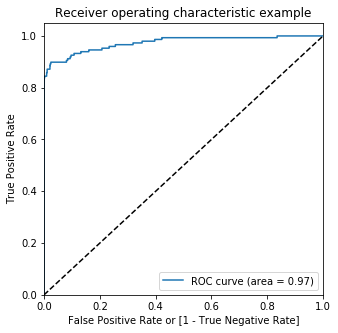

In [62]:
# Drawing ROC curve for our test data.

fpr, tpr, thresholds = metrics.roc_curve(Prob_test.Class, Prob_test.Predicted_prob, drop_intermediate = False)

draw_roc(Prob_test.Class, Prob_test.Predicted_prob)

In [63]:
# Returning the roc_auc_score.

y_true = np.array(Prob_test.Class)
y_scores = np.array(Prob_test.Predicted_prob)
roc_auc_score(y_true, y_scores)

0.973502613346684

In [64]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(Prob_test.Class, Prob_test.Final_predicted)
Accuracy

0.9992860737567735

In [65]:
# Confusion matrix for our test data.

confusion_matrix_3 = confusion_matrix(Prob_test.Class, Prob_test.Final_predicted)
confusion_matrix_3

array([[85267,    28],
       [   33,   115]], dtype=int64)

In [66]:
TP = confusion_matrix_3[1,1] # true positive 
TN = confusion_matrix_3[0,0] # true negatives
FP = confusion_matrix_3[0,1] # false positives
FN = confusion_matrix_3[1,0] # false negatives

In [67]:
# Let's see the sensitivity of our logistic regression model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.777027027027027

In [68]:
# Let's see the specificity of our logistic regression model.

Specificity = TN / float(TN+FP)
Specificity

0.9996717275338531

In [69]:
# Let's see the precision of our logistic regression model.

Precision = TP / float(TP+FP)
Precision

0.8041958041958042

In [70]:
# Let's see the F1 score of our logistic regression model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.7903780068728522

**Our Logistic Regression model evaluation metrics using optimal cut off value as 0.5 on train data are:**
- **Accuracy - 99.92%**
- **Sensitivity - 64.24%**
- **Specificity - 99.98%**

**Metrics obtained using optimal cut off value as 0.1 on train data are:**
- **Accuracy - 99.93%**
- **Sensitivity - 80.52%**
- **Specificity - 99.96%**

**Area Under Curve - ROC_AUC for our train data:**
- **ROC curve area - 0.98**

**Metrics obtained using optimal cut off value as 0.1 on test data are:**
- **Accuracy - 99.92%**
- **Sensitivity - 77.70%**
- **Specificity - 99.96%**
- **Precision - 80.41%**
- **F1 score - 79.03%**

**Area Under Curve - ROC_AUC for our test data:**
- **ROC curve area - 0.97**

### Decision trees

In [71]:
# Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.

dtc = DecisionTreeClassifier(max_depth = 5, random_state = 0)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [72]:
# Making predictions on the test data.

predictions = dtc.predict(X_test)

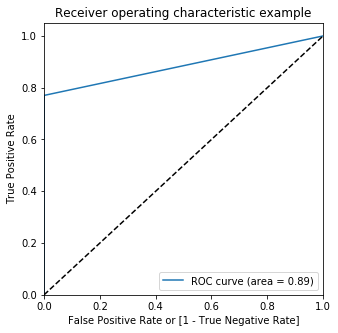

In [73]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [74]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.8850706530435706

In [75]:
# Confusion matrix.

confusion_matrix_4 = confusion_matrix(y_test, predictions)
print(confusion_matrix_4)

[[85284    11]
 [   34   114]]


In [76]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9994733330992591

In [77]:
TP = confusion_matrix_4[1,1] # true positive 
TN = confusion_matrix_4[0,0] # true negatives
FP = confusion_matrix_4[0,1] # false positives
FN = confusion_matrix_4[1,0] # false negatives

In [78]:
# Let's see the sensitivity of our decision tree model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.7702702702702703

In [79]:
# Let's see the specificity of our decision tree model.

Specificity = TN / float(TN+FP)
Specificity

0.9998710358168709

#### Hyperparameter tuning for Decision Tree model

In [80]:
# Tuning 'max_depth'.

n_folds = 3

parameters = {'max_depth': range(1, 20)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_train, y_train)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  1.5min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 20)}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [81]:
# Scores of GridSearch CV.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.138167,0.027217,0.164120,0.008776,1,{'max_depth': 1},0.838927,0.852001,0.837553,0.842827,0.006511,19,0.870987,0.864422,0.819456,0.851621,0.022902
1,2.469874,0.032978,0.100730,0.016629,2,{'max_depth': 2},0.869399,0.865104,0.872669,0.869057,0.003098,8,0.892876,0.899434,0.871672,0.887994,0.011848
2,3.737706,0.053148,0.083775,0.024470,3,{'max_depth': 3},0.921440,0.904123,0.877086,0.900883,0.018252,2,0.927728,0.932118,0.882571,0.914139,0.022394
3,5.361072,0.248962,0.049866,0.007100,4,{'max_depth': 4},0.912822,0.909834,0.898938,0.907198,0.005967,1,0.929991,0.955981,0.919462,0.935144,0.015348
4,6.692107,0.544934,0.051529,0.002617,5,{'max_depth': 5},0.895578,0.909415,0.872614,0.892536,0.015177,3,0.934490,0.962189,0.923811,0.940163,0.016173


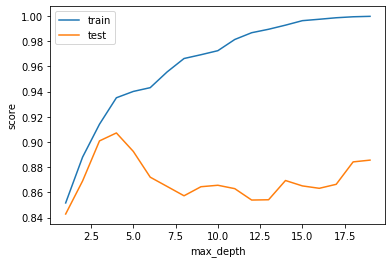

In [82]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [83]:
# Tuning 'min_samples_leaf'.

n_folds = 3

parameters = {'min_samples_leaf': range(1, 32, 10)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   26.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   28.1s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 32, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [84]:
# Cross validation results.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.570473,1.878807,0.053539,0.017651,1,{'min_samples_leaf': 1},0.878042,0.891071,0.885671,0.884928,0.005345,4,1.000000,1.000000,1.000000,1.000000,0.000000
1,16.343073,1.679567,0.052824,0.008228,11,{'min_samples_leaf': 11},0.921413,0.912765,0.929439,0.921206,0.006809,3,0.999812,0.999809,0.999807,0.999809,0.000002
2,14.459681,1.176381,0.036134,0.014512,21,{'min_samples_leaf': 21},0.925573,0.912562,0.942487,0.926874,0.012251,1,0.999622,0.999694,0.999647,0.999654,0.000030
3,11.121814,0.590077,0.024116,0.006447,31,{'min_samples_leaf': 31},0.916755,0.916778,0.946817,0.926783,0.014166,2,0.999523,0.999552,0.999457,0.999511,0.000040


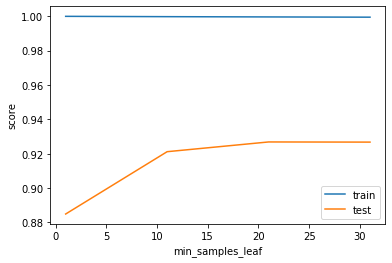

In [85]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.legend()
plt.show()

In [86]:
# Tuning 'min_samples_split'.

n_folds = 3

parameters = {'min_samples_split': range(2, 50, 10)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   33.2s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'min_samples_split': range(2, 50, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [87]:
# Cross validation results.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,15.808526,1.988903,0.052071,7.365302e-03,2,{'min_samples_split': 2},0.878042,0.891071,0.885671,0.884928,0.005345,5,1.000000,1.000000,1.000000,1.000000,0.000000
1,15.953101,1.984417,0.062486,6.836514e-07,12,{'min_samples_split': 12},0.904127,0.886728,0.898800,0.896552,0.007279,4,0.999992,0.999997,0.999994,0.999994,0.000002
2,15.050546,0.958768,0.052072,1.472802e-02,22,{'min_samples_split': 22},0.912737,0.899726,0.925054,0.912506,0.010341,3,0.999967,0.999976,0.999975,0.999972,0.000004
3,14.798615,1.034814,0.036452,1.472482e-02,32,{'min_samples_split': 32},0.921408,0.904026,0.933789,0.919741,0.012208,2,0.999924,0.999958,0.999942,0.999942,0.000014
4,13.991525,0.147844,0.041660,7.367551e-03,42,{'min_samples_split': 42},0.921425,0.908351,0.933791,0.921189,0.010387,1,0.999914,0.999953,0.999936,0.999934,0.000016


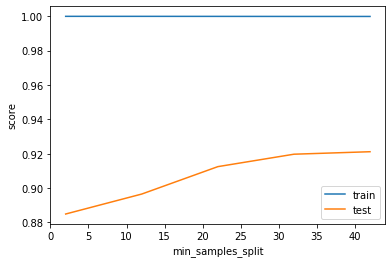

In [88]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("min_samples_split")
plt.ylabel("score")
plt.legend()
plt.show()

In [89]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [3, 4],
              'min_samples_leaf': [21],
              'min_samples_split': range(22, 32, 2),
              'criterion': ["entropy", "gini"]}

dtree = DecisionTreeClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [90]:
# Fitting the grid search to the data.

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   37.8s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4],
                         'min_samples_leaf': [21],
                         'min_samples_split': range(22, 32, 2)},
             verbose=1)

In [91]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 21, 'min_samples_split': 22}


In [92]:
# Fitting the final model with the best parameters obtained from grid search.

dtc = DecisionTreeClassifier(max_depth = 3,
                             min_samples_leaf = 21, 
                             min_samples_split = 22,
                             criterion = 'entropy', 
                             random_state = 0)

In [93]:
# Fitting our final tuned model on our train data.

dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=21,
                       min_samples_split=22, random_state=0)

In [94]:
# Predictions on the test data.

predictions = dtc.predict(X_test)

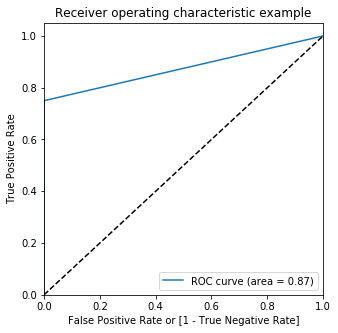

In [95]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [96]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.8748768978251948

In [97]:
# Confusion matrix.

confusion_matrix_5 = confusion_matrix(y_test, predictions)
print(confusion_matrix_5)

[[85274    21]
 [   37   111]]


In [98]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9993211848834895

In [99]:
TP = confusion_matrix_5[1,1] # true positive 
TN = confusion_matrix_5[0,0] # true negatives
FP = confusion_matrix_5[0,1] # false positives
FN = confusion_matrix_5[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our decision tree model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.75

In [101]:
# Let's see the specificity of our decision tree model.

Specificity = TN / float(TN+FP)
Specificity

0.9997537956503898

In [102]:
# Let's see the precision of our decision tree model.

Precision = TP / float(TP+FP)
Precision

0.8409090909090909

In [103]:
# Let's see the F1 score of our decision tree model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.7928571428571429

**Decision Tree model evaluation metrics on the test data without hyperparameter tuning are:**
- **Accuracy - 99.94%**
- **Sensitivity - 77.02%**
- **Specificity - 99.98%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.88**

**Decision Tree model evaluation metrics on the test data after hyperparameter tuning are:**
- **Accuracy - 99.93%**
- **Sensitivity - 75.00%**
- **Specificity - 99.97%**
- **Precision - 84.09%**
- **F1 score - 79.28%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.87**

### Random Forests

In [104]:
# Running the random forest with default parameters.

rfc = RandomForestClassifier(random_state = 0)

In [105]:
# Fitting our model on train data.

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [106]:
# Making predictions on test data.

predictions = rfc.predict(X_test)

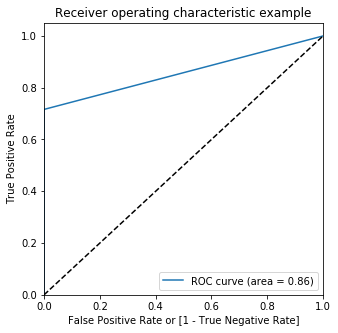

In [107]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [108]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.8580846600748119

In [109]:
# Confusion matrix.

confusion_matrix_6 = confusion_matrix(y_test, predictions)
print(confusion_matrix_6)

[[85291     4]
 [   42   106]]


In [110]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9994616293903538

In [111]:
TP = confusion_matrix_6[1,1] # true positive 
TN = confusion_matrix_6[0,0] # true negatives
FP = confusion_matrix_6[0,1] # false positives
FN = confusion_matrix_6[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our Random forest model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.7162162162162162

In [113]:
# Let's see the specificity of our Random forest model.

Specificity = TN / float(TN+FP)
Specificity

0.9999531039334076

#### Hyperparameter tuning for Random Forests

In [114]:
# Tuning 'max_depth'.

n_folds = 3

# Parameters to build the model.

parameters = {'max_depth': range(2, 10, 2)}

# Instantiating the model.

rfc = RandomForestClassifier(random_state = 0, warm_start = True)


# Fitting tree train data.

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  2.0min remaining:   23.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.2min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'max_depth': range(2, 10, 2)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [115]:
# Cross validation results.

results_1 = pd.DataFrame(model.cv_results_)
results_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,28.139208,0.129033,0.723787,0.029459,2,{'max_depth': 2},0.941405,0.940771,0.948607,0.943594,0.003554,4,0.951180,0.948677,0.939442,0.946433,0.005048
1,53.436621,0.187257,0.765445,0.012753,4,{'max_depth': 4},0.967324,0.956067,0.965670,0.963020,0.004963,3,0.975078,0.977769,0.958912,0.970586,0.008328
2,75.320011,2.579828,0.760235,0.074745,6,{'max_depth': 6},0.968362,0.951840,0.972022,0.964075,0.008779,2,0.984708,0.991806,0.975798,0.984104,0.006549
3,83.793778,5.084785,0.562368,0.051019,8,{'max_depth': 8},0.969543,0.960822,0.980001,0.970122,0.007841,1,0.994768,0.995116,0.992682,0.994188,0.001075


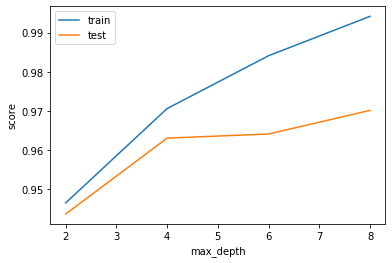

In [116]:
# Plotting the results. 

plt.figure()

plt.plot(results_1["param_max_depth"], 
         results_1["mean_train_score"], 
         label = "train")

plt.plot(results_1["param_max_depth"], 
         results_1["mean_test_score"], 
         label = "test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [117]:
# Tuning 'n_estimators'.

n_folds = 3

parameters = {'n_estimators': range(100, 800, 200)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 19.1min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 22.3min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'n_estimators': range(100, 800, 200)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [118]:
# Cross validation results.

results_2 = pd.DataFrame(model.cv_results_)
results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,180.810005,8.455874,1.208050,0.036819,100,{'n_estimators': 100},0.937546,0.946381,0.954715,0.946214,0.007010,4,1.0,1.0,1.0,1.0,0.0
1,538.187292,23.792511,3.520010,0.094017,300,{'n_estimators': 300},0.948948,0.953779,0.957697,0.953475,0.003578,3,1.0,1.0,1.0,1.0,0.0
2,825.374787,31.436512,4.410427,0.350775,500,{'n_estimators': 500},0.956315,0.961535,0.961276,0.959709,0.002402,2,1.0,1.0,1.0,1.0,0.0
3,919.324810,79.579064,5.099998,1.557346,700,{'n_estimators': 700},0.960228,0.961059,0.965355,0.962214,0.002247,1,1.0,1.0,1.0,1.0,0.0


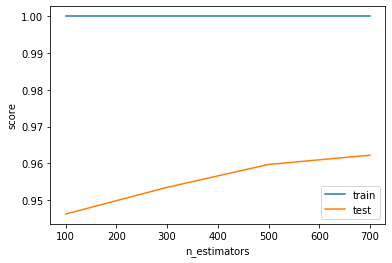

In [119]:
# Plotting the results. 

plt.figure()

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_train_score"], 
         label = "train")

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_test_score"], 
         label = "test")

plt.xlabel("n_estimators")
plt.ylabel("score")
plt.legend()
plt.show()

In [120]:
# Tuning 'max_features'.

n_folds = 3

parameters = {'max_features': range(2, 20, 5)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  9.6min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 11.3min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'max_features': range(2, 20, 5)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [121]:
# Cross validation results.

results_3 = pd.DataFrame(model.cv_results_)
results_3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,71.549171,2.494735,1.400714,0.038968,2,{'max_features': 2},0.941654,0.945951,0.945643,0.944416,0.001957,3,1.0,1.0,1.0,1.0,0.0
1,245.822451,9.222892,1.291364,0.070247,7,{'max_features': 7},0.937601,0.937521,0.959205,0.944775,0.010203,2,1.0,1.0,1.0,1.0,0.0
2,385.939632,13.558547,0.911254,0.092276,12,{'max_features': 12},0.946592,0.942366,0.950602,0.946520,0.003363,1,1.0,1.0,1.0,1.0,0.0
3,431.782041,37.790520,0.577976,0.055610,17,{'max_features': 17},0.946556,0.933673,0.941959,0.940729,0.005331,4,1.0,1.0,1.0,1.0,0.0


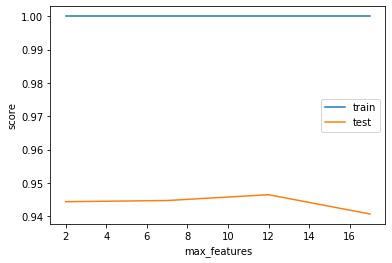

In [122]:
# Plotting the results.

plt.figure()

plt.plot(results_3["param_max_features"], 
         results_3["mean_train_score"], 
         label = "train")

plt.plot(results_3["param_max_features"], 
         results_3["mean_test_score"], 
         label = "test")

plt.xlabel("max_features")
plt.ylabel("score")
plt.legend()
plt.show()

In [123]:
# Tuning 'min_samples_leaf'.

n_folds = 3

parameters = {'min_samples_leaf': range(1, 60, 10)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  7.1min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 60, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [124]:
# Cross validation results.

results_4 = pd.DataFrame(model.cv_results_)
results_4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,260.427887,22.581920,2.327579,0.853331,1,{'min_samples_leaf': 1},0.937546,0.946381,0.954715,0.946214,0.007010,6,1.000000,1.000000,1.000000,1.000000,0.000000
1,248.335486,7.332655,2.889947,0.133164,11,{'min_samples_leaf': 11},0.962221,0.958604,0.973029,0.964618,0.006128,5,0.999859,0.999856,0.999852,0.999856,0.000003
2,249.137378,20.631542,2.186990,0.534027,21,{'min_samples_leaf': 21},0.973093,0.964298,0.975662,0.971018,0.004866,1,0.999725,0.999704,0.999673,0.999700,0.000022
3,251.704485,18.434399,2.436929,0.508113,31,{'min_samples_leaf': 31},0.970060,0.962453,0.972802,0.968438,0.004378,2,0.999523,0.999493,0.999456,0.999491,0.000027
4,164.331969,6.352520,0.869590,0.026552,41,{'min_samples_leaf': 41},0.972405,0.960472,0.970906,0.967928,0.005307,3,0.999329,0.999336,0.999238,0.999301,0.000045
5,147.153702,6.256705,0.734204,0.232052,51,{'min_samples_leaf': 51},0.976734,0.956063,0.967186,0.966661,0.008447,4,0.999184,0.999185,0.999038,0.999136,0.000069


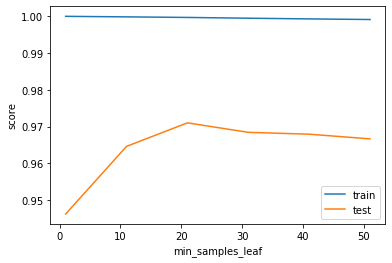

In [125]:
# Plotting the results. 

plt.figure()

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_train_score"], 
         label = "train")

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_test_score"], 
         label = "test")

plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.legend()
plt.show()

In [126]:
 # Tuning 'min_samples_split'.

n_folds = 3

parameters = {'min_samples_split': range(2, 120, 20)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  7.7min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'min_samples_split': range(2, 120, 20)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [127]:
# Cross validation results.

results_5 = pd.DataFrame(model.cv_results_)
results_5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,230.931748,45.368765,1.603792,0.578387,2,{'min_samples_split': 2},0.937546,0.946381,0.954715,0.946214,0.007010,6,1.000000,1.000000,1.000000,1.000000,0.000000
1,245.793020,4.861030,1.577813,0.508197,22,{'min_samples_split': 22},0.969076,0.956688,0.965736,0.963833,0.005233,3,0.999965,0.999963,0.999963,0.999964,0.000001
2,236.348389,41.788664,1.322609,0.125837,42,{'min_samples_split': 42},0.961920,0.955116,0.971885,0.962974,0.006886,4,0.999938,0.999933,0.999940,0.999937,0.000003
3,294.453922,14.000642,1.466881,0.387712,62,{'min_samples_split': 62},0.958030,0.953852,0.963396,0.958426,0.003906,5,0.999909,0.999911,0.999919,0.999913,0.000004
4,196.279866,12.110110,0.895625,0.133976,82,{'min_samples_split': 82},0.969747,0.969823,0.970102,0.969891,0.000153,1,0.999881,0.999883,0.999886,0.999883,0.000002
5,175.523367,13.848701,0.661303,0.099072,102,{'min_samples_split': 102},0.971257,0.963764,0.966697,0.967239,0.003083,2,0.999856,0.999853,0.999854,0.999854,0.000001


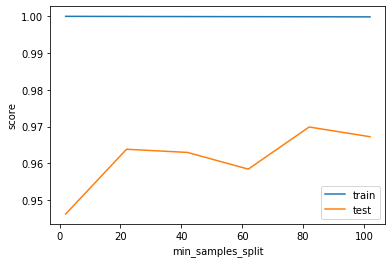

In [128]:
# Plotting the results. 

plt.figure()

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_train_score"], 
         label = "train")

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_test_score"], 
         label = "test")

plt.xlabel("min_samples_split")
plt.ylabel("score")
plt.legend()
plt.show()

In [129]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [4], 
              'n_estimators': [500, 600, 700], 
              'max_features': [12], 
              'min_samples_leaf': [21], 
              'min_samples_split': [22, 82]}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [130]:
# Fitting the grid search to the train data.

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 29.2min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [4], 'max_features': [12],
                         'min_samples_leaf': [21],
                         'min_samples_split': [22, 82],
                         'n_estimators': [500, 600, 700]},
             verbose=1)

In [131]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 12, 'min_samples_leaf': 21, 'min_samples_split': 22, 'n_estimators': 600}


In [132]:
# Fitting the final model with the best parameters obtained from grid search.

rfc = RandomForestClassifier(bootstrap = True, 
                             max_depth = 4, 
                             min_samples_leaf = 21, 
                             min_samples_split = 22, 
                             max_features = 12, 
                             n_estimators = 600, 
                             random_state = 0, 
                             warm_start = True)

In [133]:
# Fitting our final tuned model on train data.

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=12, min_samples_leaf=21,
                       min_samples_split=22, n_estimators=600, random_state=0,
                       warm_start=True)

In [134]:
# Predictions on test data.

predictions = rfc.predict(X_test)

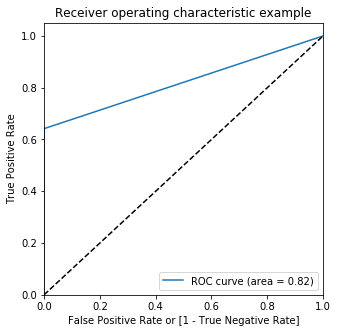

In [135]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [136]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.8208580158210851

In [137]:
# Confusion matrix.

confusion_matrix_7 = confusion_matrix(y_test, predictions)
print(confusion_matrix_7)

[[85280    15]
 [   53    95]]


In [138]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.999204147794436

In [139]:
TP = confusion_matrix_7[1,1] # true positive 
TN = confusion_matrix_7[0,0] # true negatives
FP = confusion_matrix_7[0,1] # false positives
FN = confusion_matrix_7[1,0] # false negatives

In [140]:
# Let's see the sensitivity of our random forest model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.6418918918918919

In [141]:
# Let's see the specificity of our random forest model.

Specificity = TN / float(TN+FP)
Specificity

0.9998241397502784

In [142]:
# Let's see the precision of our random forest model.

Precision = TP / float(TP+FP)
Precision

0.8636363636363636

In [143]:
# Let's see the F1 score of our random forest model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.7364341085271319

**Random Forests model evaluation metrics on the test data without hyperparameter tuning are:**
- **Accuracy - 99.94%**
- **Sensitivity - 71.62%**
- **Specificity - 99.99%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.86**

**Random Forests model evaluation metrics on the test data after hyperparameter tuning are:**
- **Accuracy - 99.92%**
- **Sensitivity - 64.18%**
- **Specificity - 99.98%**
- **Precision - 86.36%**
- **F1 score - 73.64%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.82**

### XGBoost

In [144]:
# Running XGBoost with default parameters.

xgb = XGBClassifier(random_state = 0)

In [145]:
# Fitting our model on train data.

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
# Making predictions on test data.

predictions = xgb.predict(X_test)

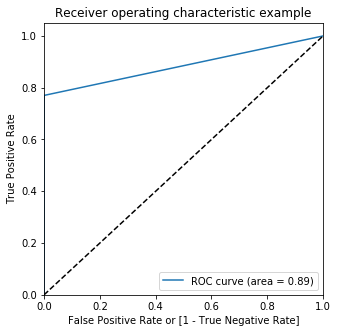

In [147]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [148]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.8850999630851908

In [149]:
# Confusion matrix.

confusion_matrix_8 = confusion_matrix(y_test, predictions)
print(confusion_matrix_8)

[[85289     6]
 [   34   114]]


In [150]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9995318516437859

In [151]:
TP = confusion_matrix_8[1,1] # true positive 
TN = confusion_matrix_8[0,0] # true negatives
FP = confusion_matrix_8[0,1] # false positives
FN = confusion_matrix_8[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our XGBoost model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.7702702702702703

In [153]:
# Let's see the specificity of our XGBoost model.

Specificity = TN / float(TN+FP)
Specificity

0.9999296559001114

#### Hyperparameter tuning for XGBoosting

In [154]:
# Tuning 'max_depth'.

n_folds = 3

# Parameters to build the model.

parameters = {'max_depth': range(3, 10, 1)}

# Instantiating the model.

xgb = XGBClassifier(random_state = 0)


# Fitting tree train data.

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  6.0min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [155]:
# Cross validation results.

results_1 = pd.DataFrame(model.cv_results_)
results_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,91.630197,0.331379,0.520713,0.026552,3,{'max_depth': 3},0.975067,0.977066,0.983907,0.978680,0.003785,1,1.0,1.0,1.0,1.0,0.0
1,112.869843,1.215414,0.624855,0.012752,4,{'max_depth': 4},0.979420,0.964899,0.975007,0.973109,0.006078,6,1.0,1.0,1.0,1.0,0.0
2,129.030485,5.707316,0.666516,0.019488,5,{'max_depth': 5},0.979249,0.972295,0.979912,0.977152,0.003445,2,1.0,1.0,1.0,1.0,0.0
3,142.890793,2.738718,0.666511,0.007366,6,{'max_depth': 6},0.983311,0.965279,0.973904,0.974165,0.007364,5,1.0,1.0,1.0,1.0,0.0
4,149.949636,3.073906,0.661305,0.026550,7,{'max_depth': 7},0.974794,0.963977,0.975838,0.971536,0.005362,7,1.0,1.0,1.0,1.0,0.0
5,122.091848,23.470795,0.479033,0.048303,8,{'max_depth': 8},0.973404,0.967940,0.981408,0.974251,0.005531,4,1.0,1.0,1.0,1.0,0.0
6,93.266610,8.808309,0.312438,0.066268,9,{'max_depth': 9},0.974397,0.968778,0.983137,0.975437,0.005908,3,1.0,1.0,1.0,1.0,0.0


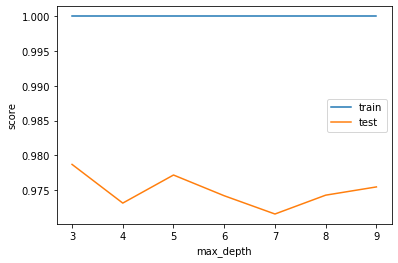

In [156]:
# Plotting the results. 

plt.figure()

plt.plot(results_1["param_max_depth"], 
         results_1["mean_train_score"], 
         label = "train")

plt.plot(results_1["param_max_depth"], 
         results_1["mean_test_score"], 
         label = "test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [157]:
# Tuning 'gamma'.

n_folds = 3

parameters = {'gamma': range(0, 6)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.2min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [158]:
# Cross validation results.

results_2 = pd.DataFrame(model.cv_results_)
results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,138.615101,1.497516,0.640477,0.012756,0,{'gamma': 0},0.983311,0.965279,0.973904,0.974165,0.007364,6,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,158.301178,5.985430,0.397258,0.043115,1,{'gamma': 1},0.971044,0.975478,0.981287,0.975936,0.004194,5,1.000000,1.000000,1.000000,1.000000,1.548142e-08
2,168.630370,1.544357,0.369539,0.046849,2,{'gamma': 2},0.980461,0.964096,0.983291,0.975950,0.008461,4,0.999998,0.999997,0.999988,0.999994,4.672185e-06
3,165.114593,1.872214,0.296806,0.033747,3,{'gamma': 3},0.976504,0.968723,0.987516,0.977581,0.007710,2,0.999994,0.999993,0.999918,0.999968,3.552604e-05
4,162.336191,2.652805,0.208285,0.057512,4,{'gamma': 4},0.984474,0.968069,0.988639,0.980394,0.008879,1,0.999969,0.999896,0.999900,0.999922,3.343274e-05
5,96.808348,43.457283,0.109339,0.012753,5,{'gamma': 5},0.978107,0.970920,0.983054,0.977360,0.004982,3,0.999670,0.999795,0.999786,0.999750,5.709097e-05


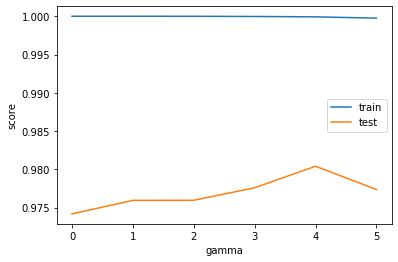

In [159]:
# Plotting the results. 

plt.figure()

plt.plot(results_2["param_gamma"], 
         results_2["mean_train_score"], 
         label = "train")

plt.plot(results_2["param_gamma"], 
         results_2["mean_test_score"], 
         label = "test")

plt.xlabel("gamma")
plt.ylabel("score")
plt.legend()
plt.show()

In [160]:
# Tuning 'subsample'.

n_folds = 3

parameters = {'subsample': np.arange(0, 1, 0.1)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.9min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [161]:
# Cross validation results.

results_3 = pd.DataFrame(model.cv_results_)
results_3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,24.385027,0.134531,0.192663,0.007367,0,{'subsample': 0.0},0.500000,0.500000,0.500000,0.500000,0.000000,10,0.500000,0.500000,0.500000,0.500000,0.000000e+00
1,65.942194,0.687807,0.400951,0.014730,0.1,{'subsample': 0.1},0.961374,0.961717,0.970901,0.964664,0.004412,8,0.989735,0.993623,0.987936,0.990431,2.373150e-03
2,95.592784,0.926524,0.494677,0.014728,0.2,{'subsample': 0.2},0.970439,0.964207,0.963708,0.966118,0.003062,6,0.998246,0.999431,0.998718,0.998798,4.869920e-04
3,112.147633,1.222085,0.536337,0.019484,0.3,{'subsample': 0.30000000000000004},0.971453,0.952322,0.972430,0.965402,0.009257,7,0.999896,0.999935,0.999995,0.999942,4.051797e-05
4,122.857319,1.097288,0.577990,0.025510,0.4,{'subsample': 0.4},0.975130,0.949358,0.977537,0.967342,0.012754,5,0.999997,1.000000,1.000000,0.999999,1.069798e-06
5,126.568133,2.616337,0.609235,0.012755,0.5,{'subsample': 0.5},0.974093,0.952193,0.965560,0.963948,0.009013,9,1.000000,1.000000,1.000000,1.000000,2.172442e-07
6,129.177479,2.846985,0.640480,0.012754,0.6,{'subsample': 0.6000000000000001},0.975668,0.963404,0.974673,0.971248,0.005561,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
7,131.931356,2.939819,0.604030,0.041001,0.7,{'subsample': 0.7000000000000001},0.977141,0.966012,0.978875,0.974009,0.005699,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,120.903171,6.375186,0.442596,0.062924,0.8,{'subsample': 0.8},0.979837,0.968435,0.976526,0.974933,0.004789,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,87.607184,7.611423,0.286389,0.019484,0.9,{'subsample': 0.9},0.976612,0.966022,0.978095,0.973576,0.005376,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00


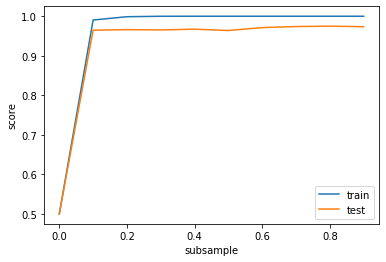

In [162]:
# Plotting the results.

plt.figure()

plt.plot(results_3["param_subsample"], 
         results_3["mean_train_score"], 
         label = "train")

plt.plot(results_3["param_subsample"], 
         results_3["mean_test_score"], 
         label = "test")

plt.xlabel("subsample")
plt.ylabel("score")
plt.legend()
plt.show()

In [163]:
# Tuning 'colsample_bytree'.

n_folds = 3

parameters = {'colsample_bytree': np.arange(0, 1, 0.1)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.3min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [164]:
# Cross validation results.

results_4 = pd.DataFrame(model.cv_results_)
results_4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,15.012629,0.206071,0.739410,0.014727,0,{'colsample_bytree': 0.0},0.975108,0.957511,0.978721,0.970446,0.009265,10,1.0,1.0,1.0,1.0,3.103007e-08
1,19.775245,0.281984,0.760844,0.007824,0.1,{'colsample_bytree': 0.1},0.978477,0.964686,0.982083,0.975082,0.007497,5,1.0,1.0,1.0,1.0,0.000000e+00
2,32.833186,1.108386,0.718582,0.012754,0.2,{'colsample_bytree': 0.2},0.974730,0.966109,0.985984,0.975608,0.008138,4,1.0,1.0,1.0,1.0,0.000000e+00
3,45.970014,1.045795,0.671717,0.012757,0.3,{'colsample_bytree': 0.30000000000000004},0.981598,0.966370,0.982698,0.976889,0.007452,2,1.0,1.0,1.0,1.0,0.000000e+00
4,58.156821,1.339898,0.682135,0.014728,0.4,{'colsample_bytree': 0.4},0.981311,0.974493,0.977468,0.977757,0.002791,1,1.0,1.0,1.0,1.0,0.000000e+00
5,72.154794,1.848439,0.708096,0.032004,0.5,{'colsample_bytree': 0.5},0.976246,0.964725,0.977719,0.972897,0.005809,8,1.0,1.0,1.0,1.0,0.000000e+00
6,86.085292,2.115185,0.666511,0.007365,0.6,{'colsample_bytree': 0.6000000000000001},0.969609,0.974654,0.976539,0.973601,0.002926,7,1.0,1.0,1.0,1.0,0.000000e+00
7,99.345098,1.542447,0.635269,0.041003,0.7,{'colsample_bytree': 0.7000000000000001},0.974118,0.968777,0.974416,0.972437,0.002591,9,1.0,1.0,1.0,1.0,0.000000e+00
8,95.310835,5.469498,0.468649,0.033735,0.8,{'colsample_bytree': 0.8},0.979200,0.966429,0.978141,0.974590,0.005787,6,1.0,1.0,1.0,1.0,0.000000e+00
9,82.846444,8.822201,0.291610,0.038955,0.9,{'colsample_bytree': 0.9},0.980494,0.967512,0.979394,0.975800,0.005878,3,1.0,1.0,1.0,1.0,0.000000e+00


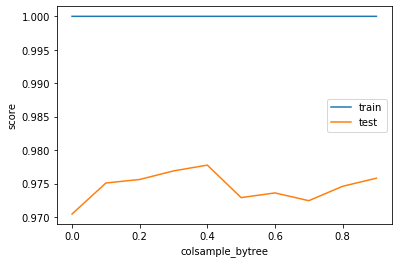

In [165]:
# Plotting the results. 

plt.figure()

plt.plot(results_4["param_colsample_bytree"], 
         results_4["mean_train_score"], 
         label = "train")

plt.plot(results_4["param_colsample_bytree"], 
         results_4["mean_test_score"], 
         label = "test")

plt.xlabel("colsample_bytree")
plt.ylabel("score")
plt.legend()
plt.show()

In [166]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [2,3], 
              'gamma': np.arange(0, 1, 0.1), 
              'subsample': [0.1], 
              'colsample_bytree': [0.2, 0.3, 0.4]}

xgb = XGBClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [167]:
# Fitting the grid search to the train data.

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.0min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [168]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'colsample_bytree': 0.3, 'gamma': 0.6000000000000001, 'max_depth': 2, 'subsample': 0.1}


In [169]:
# Fitting the final model with the best parameters obtained from grid search.

xgb = XGBClassifier(booster = 'gbtree',
                    learning_rate = 0.2,
                    max_depth = 2, 
                    gamma = 0.6,
                    subsample = 0.1, 
                    colsample_bytree = 0.3, 
                    random_state = 0)

In [170]:
# Fitting our final tuned model on train data.

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [171]:
# Predictions on test data.

predictions = xgb.predict(X_test)

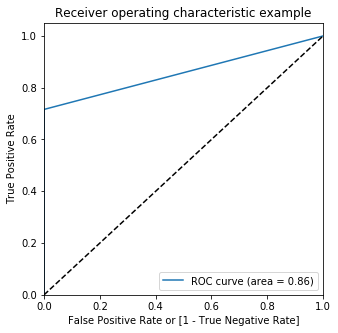

In [172]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [173]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.8580377640082195

In [174]:
# Confusion matrix.

confusion_matrix_9 = confusion_matrix(y_test, predictions)
print(confusion_matrix_9)

[[85283    12]
 [   42   106]]


In [175]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9993679997191109

In [176]:
TP = confusion_matrix_9[1,1] # true positive 
TN = confusion_matrix_9[0,0] # true negatives
FP = confusion_matrix_9[0,1] # false positives
FN = confusion_matrix_9[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our XGBoost model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.7162162162162162

In [178]:
# Let's see the specificity of our XGBoost model.

Specificity = TN / float(TN+FP)
Specificity

0.9998593118002228

In [179]:
# Let's see the precision of our XGBoost model.

Precision = TP / float(TP+FP)
Precision

0.8983050847457628

In [180]:
# Let's see the F1 score of our XGBoost model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.7969924812030076

**XGBoost model evaluation metrics on the test data without hyperparameter tuning are:**
- **Accuracy - 99.95%**
- **Sensitivity - 77.02%**
- **Specificity - 99.99%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.89**

**XGBoost model evaluation metrics on the test data after hyperparameter tuning are:**
- **Accuracy - 99.93%**
- **Sensitivity - 71.62%**
- **Specificity - 99.98%**
- **Precision - 89.83%**
- **F1 score - 79.69%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.86**

In [181]:
# Dataframe containing all the metrics for each model we've built so far.

imbalanced_metrics = pd.DataFrame({'Metrics': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 score', 'ROC_AUC'], 
                                   'Logistic Regression': [99.92, 77.70, 99.96, 80.41, 79.03, 0.97], 
                                   'Decision Trees': [99.93, 75.00, 99.97, 84.09, 79.28, 0.87], 
                                   'Random Forests': [99.92, 64.18, 99.98, 86.36, 73.64, 0.82], 
                                   'XGBoost': [99.93, 71.62, 99.98, 89.93, 79.69, 0.86]})
imbalanced_metrics

,Metrics,Logistic Regression,Decision Trees,Random Forests,XGBoost
0,Accuracy,99.92,99.93,99.92,99.93
1,Sensitivity,77.70,75.00,64.18,71.62
2,Specificity,99.96,99.97,99.98,99.98
3,Precision,80.41,84.09,86.36,89.93
4,F1 score,79.03,79.28,73.64,79.69
5,ROC_AUC,0.97,0.87,0.82,0.86


# Model building on balanced dataset

**Techniques used for treating data imbalance are:**
- Random Oversampling
- SMOTE
- ADASYN

**Also, I'm not using undersampling technique here because, it drastically reduces the data we have. We have around 2 lakh data records of which only 500 belong to positive class. Using undersampling here would eliminate around 1.95 lakh data points with class label as 0 leaving us with just 1000 data points. Data is very expensive and loosing such huge amount of data is total stupidity.**

**Building the following models for each oversampling technique and comparing their results. Though our logistic model has given good results, I'm not choosing it because, there is multicollinearity in our data and to resolve that, we need to remove few variables as we have done before on the imbalanced dataset. As we only have few variables and feature selection will reduce them even further, I'm choosing the following:**
- Decision Trees
- Random Forests
- XGBoost

### Random Oversampling

In [182]:
# It's the most naive strategy which generates new samples by random sampling with replacement of the current available samples.

ros = RandomOverSampler(random_state = 0)

X_ros, y_ros = ros.fit_resample(X_train, y_train)

print(sorted(Counter(y_ros).items()))

[(0, 199020), (1, 199020)]


### Decision trees

In [183]:
# Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.

dtc = DecisionTreeClassifier(max_depth = 5, random_state = 0)

dtc.fit(X_ros, y_ros)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [184]:
# Making predictions on the test data.

predictions = dtc.predict(X_test)

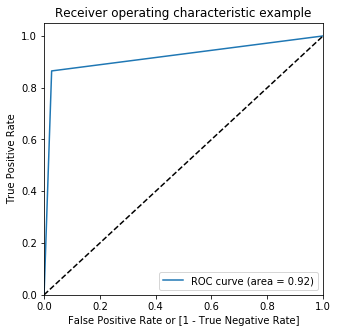

In [185]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [186]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9188736071789007

In [187]:
# Confusion matrix.

confusion_matrix_10 = confusion_matrix(y_test, predictions)
print(confusion_matrix_10)

[[82982  2313]
 [   20   128]]


In [188]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9726952471238135

In [189]:
TP = confusion_matrix_10[1,1] # true positive 
TN = confusion_matrix_10[0,0] # true negatives
FP = confusion_matrix_10[0,1] # false positives
FN = confusion_matrix_10[1,0] # false negatives

In [190]:
# Let's see the sensitivity of our decision tree model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8648648648648649

In [191]:
# Let's see the specificity of our decision tree model.

Specificity = TN / float(TN+FP)
Specificity

0.9728823494929363

#### Hyperparameter tuning for Decision Tree model

In [192]:
# Tuning 'max_depth'.

n_folds = 3

parameters = {'max_depth': range(1, 20)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_ros, y_ros)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 20)}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [193]:
# Scores of GridSearch CV.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.703263,0.025512,0.115153,0.008683,1,{'max_depth': 1},0.927284,0.926424,0.927208,0.926972,0.000388,19,0.926820,0.927250,0.926854,0.926975,0.000195
1,3.276735,0.019485,0.109352,0.000003,2,{'max_depth': 2},0.958829,0.958977,0.958608,0.958805,0.000152,18,0.958793,0.958718,0.958903,0.958805,0.000076
2,4.717037,0.006424,0.099144,0.007655,3,{'max_depth': 3},0.971854,0.967098,0.966269,0.968407,0.002461,17,0.972144,0.966393,0.966803,0.968447,0.002620
3,6.287547,0.055244,0.114024,0.015923,4,{'max_depth': 4},0.977527,0.973251,0.972730,0.974503,0.002149,16,0.978098,0.972801,0.973064,0.974655,0.002437
4,8.468942,0.456656,0.134393,0.006571,5,{'max_depth': 5},0.990189,0.990104,0.989885,0.990059,0.000128,15,0.990546,0.989932,0.990024,0.990168,0.000270


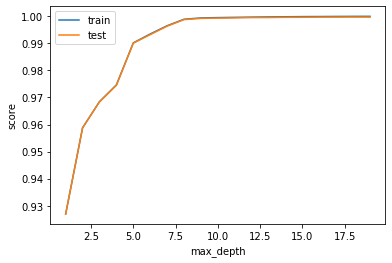

In [194]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [195]:
# Tuning 'min_samples_leaf'.

n_folds = 3

parameters = {'min_samples_leaf': range(1, 32, 10)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_ros, y_ros)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   21.8s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   22.1s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 32, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [196]:
# Cross validation results.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,15.013441,0.607851,0.083318,0.019484,1,{'min_samples_leaf': 1},0.999683,0.999744,0.999699,0.999709,0.000026,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,13.731615,0.607742,0.098935,0.007359,11,{'min_samples_leaf': 11},0.999814,0.999822,0.999792,0.999809,0.000013,1,0.999987,0.999982,0.999987,0.999985,2.469280e-06
2,11.556622,2.262619,0.088520,0.019483,21,{'min_samples_leaf': 21},0.999837,0.999784,0.999757,0.999793,0.000033,3,0.999965,0.999966,0.999969,0.999967,1.728255e-06
3,7.821083,0.237371,0.055793,0.006571,31,{'min_samples_leaf': 31},0.999833,0.999828,0.999727,0.999796,0.000049,2,0.999957,0.999958,0.999957,0.999957,3.960981e-07


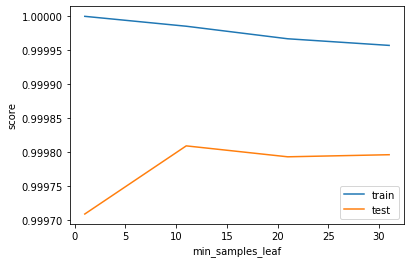

In [197]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.legend()
plt.show()

In [198]:
# Tuning 'min_samples_split'.

n_folds = 3

parameters = {'min_samples_split': range(2, 50, 10)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_ros, y_ros)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   28.8s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'min_samples_split': range(2, 50, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [199]:
# Cross validation results.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,14.772765,0.431846,0.124973,0.012757,2,{'min_samples_split': 2},0.999683,0.999744,0.999699,0.999709,0.000026,1,1.0,1.0,1.0,1.0,0.0
1,14.652998,0.340902,0.119763,0.019483,12,{'min_samples_split': 12},0.999683,0.999744,0.999699,0.999709,0.000026,1,1.0,1.0,1.0,1.0,0.0
2,14.120073,1.084533,0.119765,0.019485,22,{'min_samples_split': 22},0.999683,0.999744,0.999699,0.999709,0.000026,1,1.0,1.0,1.0,1.0,0.0
3,13.049039,0.089587,0.067697,0.007378,32,{'min_samples_split': 32},0.999683,0.999744,0.999699,0.999709,0.000026,1,1.0,1.0,1.0,1.0,0.0
4,12.762652,0.652007,0.072902,0.026551,42,{'min_samples_split': 42},0.999683,0.999744,0.999699,0.999709,0.000026,1,1.0,1.0,1.0,1.0,0.0


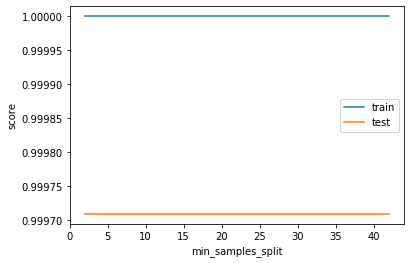

In [200]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("min_samples_split")
plt.ylabel("score")
plt.legend()
plt.show()

In [201]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [3, 4],
              'min_samples_leaf': range(1, 11),
              'criterion': ["entropy", "gini"]}

dtree = DecisionTreeClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [202]:
# Fitting the grid search to the data.

grid_search.fit(X_ros, y_ros)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.6min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4],
                         'min_samples_leaf': range(1, 11)},
             verbose=1)

In [203]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}


In [204]:
# Fitting the final model with the best parameters obtained from grid search.

dtc = DecisionTreeClassifier(max_depth = 4,
                             min_samples_leaf = 1,
                             criterion = 'gini', 
                             random_state = 0)

In [205]:
# Fitting our final tuned model on our train data.

dtc.fit(X_ros, y_ros)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [206]:
# Predictions on the test data.

predictions = dtc.predict(X_test)

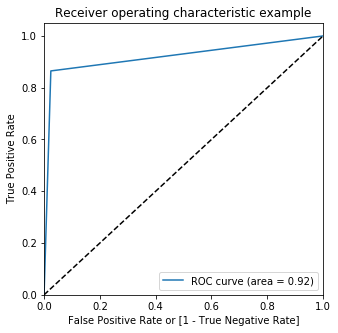

In [207]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [208]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9203097992182933

In [209]:
# Confusion matrix.

confusion_matrix_11 = confusion_matrix(y_test, predictions)
print(confusion_matrix_11)

[[83227  2068]
 [   20   128]]


In [210]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9755626558056248

In [211]:
TP = confusion_matrix_11[1,1] # true positive 
TN = confusion_matrix_11[0,0] # true negatives
FP = confusion_matrix_11[0,1] # false positives
FN = confusion_matrix_11[1,0] # false negatives

In [212]:
# Let's see the sensitivity of our decision tree model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8648648648648649

In [213]:
# Let's see the specificity of our decision tree model.

Specificity = TN / float(TN+FP)
Specificity

0.9757547335717217

In [214]:
# Let's see the precision of our decision tree model.

Precision = TP / float(TP+FP)
Precision

0.058287795992714025

In [215]:
# Let's see the F1 score of our decision tree model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.1092150170648464

**Decision Tree model evaluation metrics on Randomly oversampled test data without hyperparameter tuning are:**
- **Accuracy - 97.26%**
- **Sensitivity - 86.48%**
- **Specificity - 97.28%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.92**

**Decision Tree model evaluation metrics on Randomly oversampled test data after hyperparameter tuning are:**
- **Accuracy - 97.55%**
- **Sensitivity - 86.48%**
- **Specificity - 97.57%**
- **Precision - 5.82%**
- **F1 score - 10.92%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.92**

### Random Forests

In [216]:
# Running the random forest with default parameters.

rfc = RandomForestClassifier(random_state = 0)

In [217]:
# Fitting our model on train data.

rfc.fit(X_ros, y_ros)

RandomForestClassifier(random_state=0)

In [218]:
# Making predictions on test data.

predictions = rfc.predict(X_test)

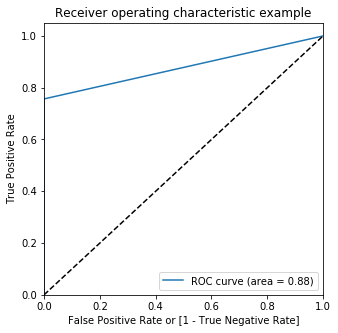

In [219]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [220]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.8783490683367581

In [221]:
# Confusion matrix.

confusion_matrix_12 = confusion_matrix(y_test, predictions)
print(confusion_matrix_12)

[[85290     5]
 [   36   112]]


In [222]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9995201479348805

In [223]:
TP = confusion_matrix_12[1,1] # true positive 
TN = confusion_matrix_12[0,0] # true negatives
FP = confusion_matrix_12[0,1] # false positives
FN = confusion_matrix_12[1,0] # false negatives

In [224]:
# Let's see the sensitivity of our Random forest model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.7567567567567568

In [225]:
# Let's see the specificity of our Random forest model.

Specificity = TN / float(TN+FP)
Specificity

0.9999413799167595

#### Hyperparameter tuning for Random Forests

In [226]:
# Tuning 'max_depth'.

n_folds = 3

# Parameters to build the model.

parameters = {'max_depth': range(2, 10, 2)}

# Instantiating the model.

rfc = RandomForestClassifier(random_state = 0, warm_start = True)


# Fitting tree train data.

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_ros, y_ros)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  2.7min remaining:   32.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.0min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'max_depth': range(2, 10, 2)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [227]:
# Cross validation results.

results_1 = pd.DataFrame(model.cv_results_)
results_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,48.663435,1.143320,1.629829,0.064199,2,{'max_depth': 2},0.974933,0.975564,0.975696,0.975398,0.000333,4,0.975008,0.974911,0.976151,0.975357,0.000563
1,85.554945,1.344223,1.843317,0.055597,4,{'max_depth': 4},0.989700,0.990327,0.989587,0.989872,0.000326,3,0.989779,0.989997,0.989985,0.989920,0.000100
2,108.420045,10.943728,1.528438,0.212876,6,{'max_depth': 6},0.996528,0.996550,0.996413,0.996497,0.000060,2,0.996489,0.996410,0.996713,0.996537,0.000128
3,99.321332,10.619807,1.095503,0.142048,8,{'max_depth': 8},0.999700,0.999685,0.999506,0.999630,0.000088,1,0.999707,0.999702,0.999603,0.999671,0.000048


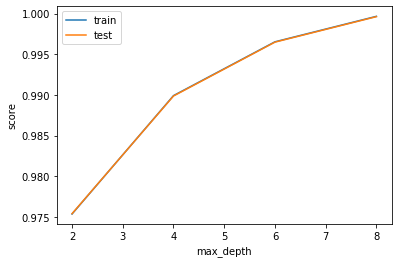

In [228]:
# Plotting the results. 

plt.figure()

plt.plot(results_1["param_max_depth"], 
         results_1["mean_train_score"], 
         label = "train")

plt.plot(results_1["param_max_depth"], 
         results_1["mean_test_score"], 
         label = "test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [229]:
# Tuning 'n_estimators'.

n_folds = 3

parameters = {'n_estimators': range(100, 800, 200)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_ros, y_ros)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 21.2min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 23.3min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'n_estimators': range(100, 800, 200)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [230]:
# Cross validation results.

results_2 = pd.DataFrame(model.cv_results_)
results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,202.958769,2.571648,2.801425,0.074736,100,{'n_estimators': 100},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
1,610.779688,7.892697,8.263689,0.159307,300,{'n_estimators': 300},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
2,902.668419,46.540957,10.456043,1.291363,500,{'n_estimators': 500},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
3,938.559139,130.669564,9.508173,1.334393,700,{'n_estimators': 700},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0


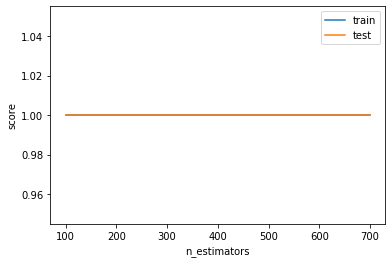

In [231]:
# Plotting the results. 

plt.figure()

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_train_score"], 
         label = "train")

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_test_score"], 
         label = "test")

plt.xlabel("n_estimators")
plt.ylabel("score")
plt.legend()
plt.show()

In [232]:
# Tuning 'max_features'.

n_folds = 3

parameters = {'max_features': range(2, 20, 5)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_ros, y_ros)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  9.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 10.0min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'max_features': range(2, 20, 5)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [233]:
# Cross validation results.

results_3 = pd.DataFrame(model.cv_results_)
results_3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,94.115780,1.109751,2.973260,0.048288,2,{'max_features': 2},1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.0,1.0,0.0
1,273.943272,3.182216,2.879534,0.060279,7,{'max_features': 7},1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.0,1.0,0.0
2,398.252179,23.571194,1.983912,0.200460,12,{'max_features': 12},1.0,1.0,0.999992,0.999997,0.000004,4,1.0,1.0,1.0,1.0,0.0
3,401.428854,57.598345,1.322619,0.207746,17,{'max_features': 17},1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.0,1.0,0.0


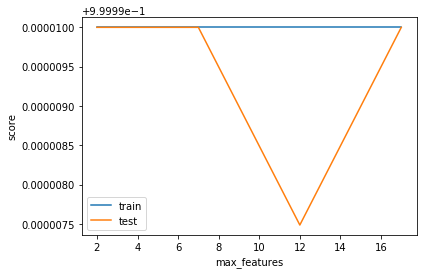

In [234]:
# Plotting the results.

plt.figure()

plt.plot(results_3["param_max_features"], 
         results_3["mean_train_score"], 
         label = "train")

plt.plot(results_3["param_max_features"], 
         results_3["mean_test_score"], 
         label = "test")

plt.xlabel("max_features")
plt.ylabel("score")
plt.legend()
plt.show()

In [235]:
# Tuning 'min_samples_leaf'.

n_folds = 3

parameters = {'min_samples_leaf': range(1, 30, 10)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_ros, y_ros)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  3.3min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  4.4min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 30, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [236]:
# Cross validation results.

results_4 = pd.DataFrame(model.cv_results_)
results_4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,198.944913,1.571466,2.349730,0.475362,1,{'min_samples_leaf': 1},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,190.908481,0.756881,2.806635,0.051545,11,{'min_samples_leaf': 11},0.999996,0.999984,0.999988,0.999989,0.000005,2,0.999997,0.999999,0.999999,0.999998,0.000001
2,146.424023,59.012550,2.192193,0.821306,21,{'min_samples_leaf': 21},0.999987,0.999982,0.999978,0.999982,0.000004,3,0.999987,0.999990,0.999993,0.999990,0.000003


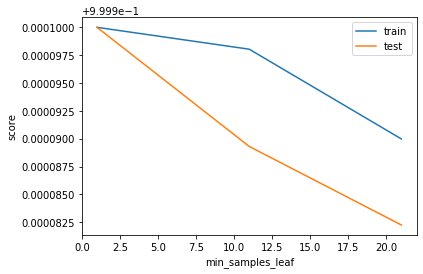

In [237]:
# Plotting the results. 

plt.figure()

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_train_score"], 
         label = "train")

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_test_score"], 
         label = "test")

plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.legend()
plt.show()

In [238]:
 # Tuning 'min_samples_split'.

n_folds = 3

parameters = {'min_samples_split': range(2, 120, 20)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_ros, y_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  8.4min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'min_samples_split': range(2, 120, 20)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [239]:
# Cross validation results.

results_5 = pd.DataFrame(model.cv_results_)
results_5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,204.138831,2.251366,2.931606,0.178722,2,{'min_samples_split': 2},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
1,203.711887,2.058092,2.926397,0.139917,22,{'min_samples_split': 22},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
2,203.692186,3.285710,2.968057,0.147095,42,{'min_samples_split': 42},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
3,201.440470,1.226672,2.895156,0.044791,62,{'min_samples_split': 62},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
4,201.107206,1.864394,2.973263,0.019482,82,{'min_samples_split': 82},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
5,119.754651,59.111128,1.874558,0.850754,102,{'min_samples_split': 102},1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0


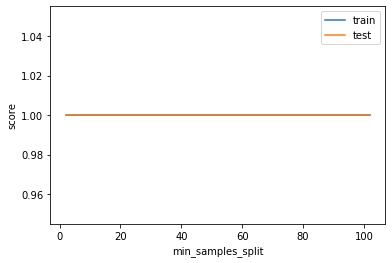

In [240]:
# Plotting the results. 

plt.figure()

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_train_score"], 
         label = "train")

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_test_score"], 
         label = "test")

plt.xlabel("min_samples_split")
plt.ylabel("score")
plt.legend()
plt.show()

In [241]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [3, 4], 
              'n_estimators': [100], 
              'max_features': [7], 
              'min_samples_split': [2]}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [242]:
# Fitting the grid search to the train data.

grid_search.fit(X_ros, y_ros)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.4min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4], 'max_features': [7],
                         'min_samples_split': [2], 'n_estimators': [100]},
             verbose=1)

In [243]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 100}


In [244]:
# Fitting the final model with the best parameters obtained from grid search.

rfc = RandomForestClassifier(bootstrap = True, 
                             max_depth = 4, 
                             min_samples_split = 2, 
                             max_features = 7, 
                             n_estimators = 100, 
                             random_state = 0, 
                             warm_start = True)

In [245]:
# Fitting our final tuned model on train data.

rfc.fit(X_ros, y_ros)

RandomForestClassifier(max_depth=4, max_features=7, random_state=0,
                       warm_start=True)

In [246]:
# Predictions on test data.

predictions = rfc.predict(X_test)

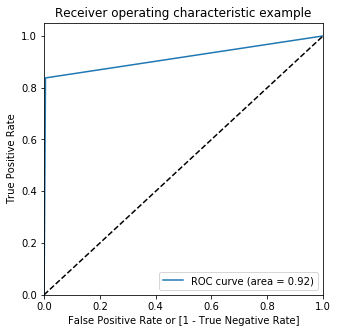

In [247]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [248]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9163630832896323

In [249]:
# Confusion matrix.

confusion_matrix_13 = confusion_matrix(y_test, predictions)
print(confusion_matrix_13)

[[84859   436]
 [   24   124]]


In [250]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.994616293903538

In [251]:
TP = confusion_matrix_13[1,1] # true positive 
TN = confusion_matrix_13[0,0] # true negatives
FP = confusion_matrix_13[0,1] # false positives
FN = confusion_matrix_13[1,0] # false negatives

In [252]:
# Let's see the sensitivity of our random forest model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8378378378378378

In [253]:
# Let's see the specificity of our random forest model.

Specificity = TN / float(TN+FP)
Specificity

0.9948883287414269

In [254]:
# Let's see the precision of our random forest model.

Precision = TP / float(TP+FP)
Precision

0.22142857142857142

In [255]:
# Let's see the F1 score of our random forest model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.3502824858757062

**Random Forests model evaluation metrics on Randomly oversampled test data without hyperparameter tuning are:**
- **Accuracy - 99.95%**
- **Sensitivity - 75.67%**
- **Specificity - 99.99%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.88**

**Random Forests model evaluation metrics on Randomly oversampled test data after hyperparameter tuning are:**
- **Accuracy - 99.46%**
- **Sensitivity - 83.78%**
- **Specificity - 99.48%**
- **Precision - 22.14%**
- **F1 score - 35.02%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.92**

### XGBoost

In [256]:
# Running XGBoost with default parameters.

xgb = XGBClassifier(random_state = 0)

In [257]:
# Fitting our model on train data.

xgb.fit(X_ros, y_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [258]:
# Making predictions on test data.

predictions = xgb.predict(X_test)

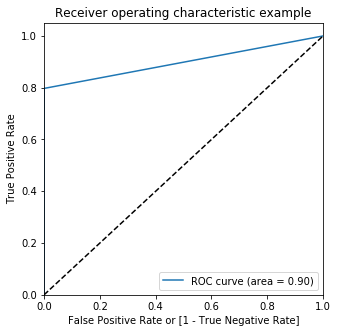

In [259]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [260]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.8986076145903802

In [261]:
# Confusion matrix.

confusion_matrix_14 = confusion_matrix(y_test, predictions)
print(confusion_matrix_14)

[[85288     7]
 [   30   118]]


In [262]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9995669627705019

In [263]:
TP = confusion_matrix_14[1,1] # true positive 
TN = confusion_matrix_14[0,0] # true negatives
FP = confusion_matrix_14[0,1] # false positives
FN = confusion_matrix_14[1,0] # false negatives

In [264]:
# Let's see the sensitivity of our XGBoost model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.7972972972972973

In [265]:
# Let's see the specificity of our XGBoost model.

Specificity = TN / float(TN+FP)
Specificity

0.9999179318834632

#### Hyperparameter tuning for XGBoosting

In [266]:
# Tuning 'max_depth'.

n_folds = 3

# Parameters to build the model.

parameters = {'max_depth': range(3, 10, 1)}

# Instantiating the model.

xgb = XGBClassifier(random_state = 0)


# Fitting tree train data.

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_ros, y_ros)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 15.1min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [267]:
# Cross validation results.

results_1 = pd.DataFrame(model.cv_results_)
results_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,195.590031,0.675707,1.114324,0.032100,3,{'max_depth': 3},0.999979,0.999966,0.999957,0.999967,0.000009,7,0.999982,0.999983,0.999983,0.999983,6.087218e-07
1,258.085974,0.439253,1.411131,0.036817,4,{'max_depth': 4},0.999995,0.999995,0.999980,0.999990,0.000007,6,1.000000,1.000000,1.000000,1.000000,0.000000e+00
2,320.427847,2.558861,1.775629,0.040998,5,{'max_depth': 5},0.999995,0.999998,0.999989,0.999994,0.000003,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,380.110403,4.645237,2.171370,0.154643,6,{'max_depth': 6},0.999996,1.000000,0.999992,0.999996,0.000003,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,414.122290,5.200585,1.890186,0.210738,7,{'max_depth': 7},0.999991,0.999996,0.999985,0.999991,0.000004,5,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,346.593817,53.533923,1.218439,0.159848,8,{'max_depth': 8},0.999999,0.999995,0.999984,0.999993,0.000006,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,246.483524,33.644867,0.760240,0.139911,9,{'max_depth': 9},0.999996,0.999998,0.999987,0.999994,0.000005,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00


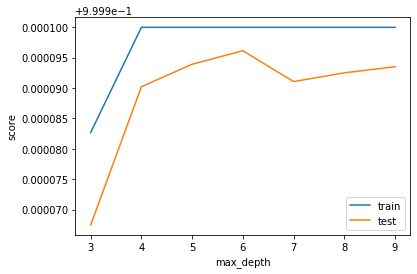

In [268]:
# Plotting the results. 

plt.figure()

plt.plot(results_1["param_max_depth"], 
         results_1["mean_train_score"], 
         label = "train")

plt.plot(results_1["param_max_depth"], 
         results_1["mean_test_score"], 
         label = "test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [269]:
# Tuning 'gamma'.

n_folds = 3

parameters = {'gamma': range(0, 6)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_ros, y_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 14.4min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [270]:
# Cross validation results.

results_2 = pd.DataFrame(model.cv_results_)
results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,377.158168,0.208040,1.713141,0.019481,0,{'gamma': 0},0.999996,1.000000,0.999992,0.999996,0.000003,1,1.000000,1.0,1.000000,1.000000,0.000000e+00
1,386.982879,0.983092,1.296571,0.221286,1,{'gamma': 1},0.999991,0.999996,0.999984,0.999990,0.000005,2,1.000000,1.0,1.000000,1.000000,0.000000e+00
2,386.958484,1.819471,1.109118,0.051021,2,{'gamma': 2},0.999995,0.999990,0.999975,0.999987,0.000008,4,1.000000,1.0,1.000000,1.000000,0.000000e+00
3,383.474119,3.788198,1.041426,0.060279,3,{'gamma': 3},0.999995,0.999995,0.999981,0.999990,0.000007,3,1.000000,1.0,1.000000,1.000000,1.639635e-07
4,385.968324,0.130282,0.853967,0.092273,4,{'gamma': 4},0.999992,0.999985,0.999975,0.999984,0.000007,5,1.000000,1.0,1.000000,1.000000,2.049075e-07
5,190.719622,136.610992,0.458228,0.118511,5,{'gamma': 5},0.999982,0.999990,0.999973,0.999982,0.000007,6,0.999998,1.0,0.999995,0.999998,2.033944e-06


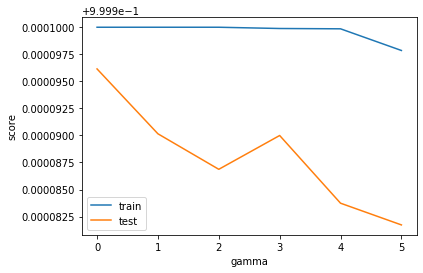

In [271]:
# Plotting the results. 

plt.figure()

plt.plot(results_2["param_gamma"], 
         results_2["mean_train_score"], 
         label = "train")

plt.plot(results_2["param_gamma"], 
         results_2["mean_test_score"], 
         label = "test")

plt.xlabel("gamma")
plt.ylabel("score")
plt.legend()
plt.show()

In [272]:
# Tuning 'subsample'.

n_folds = 3

parameters = {'subsample': np.arange(0, 1, 0.1)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_ros, y_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 21.1min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [273]:
# Cross validation results.

results_3 = pd.DataFrame(model.cv_results_)
results_3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,66.420633,0.733051,0.531132,0.000003,0,{'subsample': 0.0},0.500000,0.500000,0.500000,0.500000,0.000000e+00,10,0.50000,0.500000,0.500000,0.500000,0.000000e+00
1,340.618288,1.794118,1.598588,0.103093,0.1,{'subsample': 0.1},0.999976,0.999980,0.999956,0.999971,1.016438e-05,9,0.99999,0.999996,0.999989,0.999992,3.107869e-06
2,362.391862,1.239336,1.755747,0.026954,0.2,{'subsample': 0.2},0.999987,0.999988,0.999986,0.999987,9.074567e-07,8,1.00000,0.999999,1.000000,1.000000,5.281750e-07
3,371.247935,10.377508,1.796456,0.033746,0.3,{'subsample': 0.30000000000000004},0.999988,0.999997,0.999988,0.999991,4.382699e-06,7,1.00000,1.000000,1.000000,1.000000,0.000000e+00
4,369.578941,0.599933,2.020364,0.218074,0.4,{'subsample': 0.4},0.999990,0.999994,0.999991,0.999992,1.687811e-06,6,1.00000,1.000000,1.000000,1.000000,0.000000e+00
5,378.838544,3.262947,1.926634,0.048290,0.5,{'subsample': 0.5},0.999994,0.999998,0.999993,0.999995,2.511936e-06,2,1.00000,1.000000,1.000000,1.000000,0.000000e+00
6,376.934392,5.550122,1.911018,0.014729,0.6,{'subsample': 0.6000000000000001},0.999994,0.999999,0.999994,0.999996,2.014320e-06,1,1.00000,1.000000,1.000000,1.000000,0.000000e+00
7,375.806633,2.654311,1.858942,0.096295,0.7,{'subsample': 0.7000000000000001},0.999991,0.999996,0.999989,0.999992,2.977476e-06,5,1.00000,1.000000,1.000000,1.000000,0.000000e+00
8,350.299186,6.960757,1.275742,0.148928,0.8,{'subsample': 0.8},0.999997,0.999996,0.999989,0.999994,3.372993e-06,4,1.00000,1.000000,1.000000,1.000000,0.000000e+00
9,163.454814,6.646229,0.812324,0.025498,0.9,{'subsample': 0.9},0.999998,1.000000,0.999987,0.999995,5.715719e-06,3,1.00000,1.000000,1.000000,1.000000,0.000000e+00


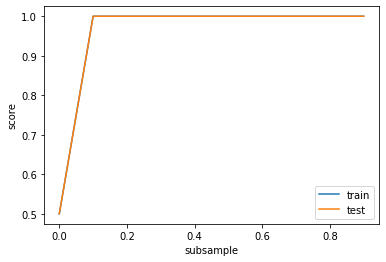

In [274]:
# Plotting the results.

plt.figure()

plt.plot(results_3["param_subsample"], 
         results_3["mean_train_score"], 
         label = "train")

plt.plot(results_3["param_subsample"], 
         results_3["mean_test_score"], 
         label = "test")

plt.xlabel("subsample")
plt.ylabel("score")
plt.legend()
plt.show()

In [275]:
# Tuning 'colsample_bytree'.

n_folds = 3

parameters = {'colsample_bytree': np.arange(0, 1, 0.1)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_ros, y_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.7min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [276]:
# Cross validation results.

results_4 = pd.DataFrame(model.cv_results_)
results_4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,30.528352,0.327008,1.733968,0.033744,0,{'colsample_bytree': 0.0},0.999987,0.999986,0.999970,0.999981,0.000008,10,0.999997,0.999999,0.999996,0.999998,0.000001
1,39.513207,0.690069,1.911012,0.029457,0.1,{'colsample_bytree': 0.1},0.999998,0.999985,0.999985,0.999989,0.000006,9,1.000000,1.000000,1.000000,1.000000,0.000000
2,73.575822,4.518138,1.947467,0.040999,0.2,{'colsample_bytree': 0.2},0.999998,0.999997,0.999993,0.999996,0.000002,2,1.000000,1.000000,1.000000,1.000000,0.000000
3,111.746637,0.983279,1.890185,0.033748,0.3,{'colsample_bytree': 0.30000000000000004},0.999995,0.999999,0.999993,0.999996,0.000003,4,1.000000,1.000000,1.000000,1.000000,0.000000
4,145.603161,2.064689,1.843320,0.055595,0.4,{'colsample_bytree': 0.4},1.000000,0.999994,0.999990,0.999995,0.000004,8,1.000000,1.000000,1.000000,1.000000,0.000000
5,184.417379,3.164939,1.911015,0.014728,0.5,{'colsample_bytree': 0.5},0.999997,0.999997,0.999992,0.999995,0.000002,7,1.000000,1.000000,1.000000,1.000000,0.000000
6,222.992410,1.436311,1.926635,0.038965,0.6,{'colsample_bytree': 0.6000000000000001},0.999999,0.999997,0.999990,0.999995,0.000004,5,1.000000,1.000000,1.000000,1.000000,0.000000
7,258.731285,3.096815,1.843320,0.096295,0.7,{'colsample_bytree': 0.7000000000000001},1.000000,0.999995,0.999994,0.999996,0.000003,3,1.000000,1.000000,1.000000,1.000000,0.000000
8,246.134367,14.490544,1.306987,0.172228,0.8,{'colsample_bytree': 0.8},0.999998,0.999999,0.999989,0.999995,0.000005,6,1.000000,1.000000,1.000000,1.000000,0.000000
9,203.994876,22.470316,0.809598,0.130141,0.9,{'colsample_bytree': 0.9},0.999997,1.000000,0.999992,0.999996,0.000003,1,1.000000,1.000000,1.000000,1.000000,0.000000


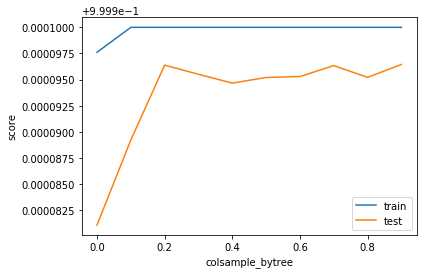

In [277]:
# Plotting the results. 

plt.figure()

plt.plot(results_4["param_colsample_bytree"], 
         results_4["mean_train_score"], 
         label = "train")

plt.plot(results_4["param_colsample_bytree"], 
         results_4["mean_test_score"], 
         label = "test")

plt.xlabel("colsample_bytree")
plt.ylabel("score")
plt.legend()
plt.show()

In [278]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [4, 5, 6], 
              'gamma': np.arange(0, 0.5, 0.1), 
              'subsample': [0.1], 
              'colsample_bytree': [0.2]}

xgb = XGBClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [279]:
# Fitting the grid search to the train data.

grid_search.fit(X_ros, y_ros)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  5.3min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [280]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'colsample_bytree': 0.2, 'gamma': 0.0, 'max_depth': 6, 'subsample': 0.1}


In [281]:
# Fitting the final model with the best parameters obtained from grid search.

xgb = XGBClassifier(booster = 'gbtree',
                    learning_rate = 0.2,
                    max_depth = 6, 
                    gamma = 0,
                    subsample = 0.1, 
                    colsample_bytree = 0.2, 
                    random_state = 0)

In [282]:
# Fitting our final tuned model on train data.

xgb.fit(X_ros, y_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [283]:
# Predictions on test data.

predictions = xgb.predict(X_test)

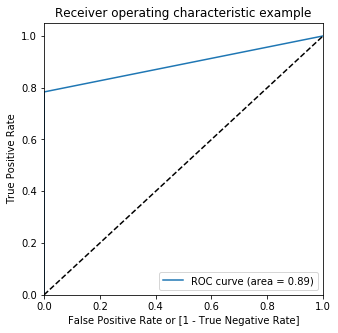

In [284]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [285]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.8917394796754665

In [286]:
# Confusion matrix.

confusion_matrix_15 = confusion_matrix(y_test, predictions)
print(confusion_matrix_15)

[[85269    26]
 [   32   116]]


In [287]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9993211848834895

In [288]:
TP = confusion_matrix_15[1,1] # true positive 
TN = confusion_matrix_15[0,0] # true negatives
FP = confusion_matrix_15[0,1] # false positives
FN = confusion_matrix_15[1,0] # false negatives

In [289]:
# Let's see the sensitivity of our XGBoost model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.7837837837837838

In [290]:
# Let's see the specificity of our XGBoost model.

Specificity = TN / float(TN+FP)
Specificity

0.9996951755671493

In [291]:
# Let's see the precision of our XGBoost model.

Precision = TP / float(TP+FP)
Precision

0.8169014084507042

In [292]:
# Let's see the F1 score of our XGBoost model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.8

**XGBoost model evaluation metrics on Randomly oversampled test data without hyperparameter tuning are:**
- **Accuracy - 99.95%**
- **Sensitivity - 79.72%**
- **Specificity - 99.99%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.90**

**XGBoost model evaluation metrics on Randomly oversampled test data after hyperparameter tuning are:**
- **Accuracy - 99.93%**
- **Sensitivity - 78.37%**
- **Specificity - 99.96%**
- **Precision - 81.69%**
- **F1 score - 80.00%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.89**

In [293]:
# Dataframe containing all the metrics for each Randomly oversampled model we've built so far.

ros_metrics = pd.DataFrame({'Metrics': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 score', 'ROC_AUC'], 
                            'Decision Trees': [97.55, 86.48, 97.57, 5.82, 10.92, 0.92], 
                            'Random Forests': [99.46, 83.78, 99.48, 22.14, 35.02, 0.92], 
                            'XGBoost': [99.93, 78.37, 99.96, 81.69, 80.00, 0.89]})
ros_metrics

,Metrics,Decision Trees,Random Forests,XGBoost
0,Accuracy,97.55,99.46,99.93
1,Sensitivity,86.48,83.78,78.37
2,Specificity,97.57,99.48,99.96
3,Precision,5.82,22.14,81.69
4,F1 score,10.92,35.02,80.00
5,ROC_AUC,0.92,0.92,0.89


### SMOTE

In [294]:
# Applying SMOTE to our imbalanced train dataset.

smote = SMOTE(random_state = 0)

X_smote, y_smote = smote.fit_resample(X_train, y_train)

print(sorted(Counter(y_smote).items()))

[(0, 199020), (1, 199020)]


### Decision trees

In [295]:
# Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.

dtc = DecisionTreeClassifier(max_depth = 5, random_state = 0)

dtc.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [296]:
# Making predictions on the test data.

predictions = dtc.predict(X_test)

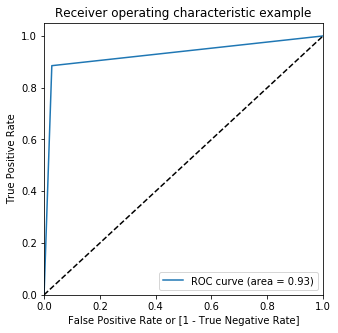

In [297]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [298]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9286921938645368

In [299]:
# Confusion matrix.

confusion_matrix_16 = confusion_matrix(y_test, predictions)
print(confusion_matrix_16)

[[82928  2367]
 [   17   131]]


In [300]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9720983579696406

In [301]:
TP = confusion_matrix_16[1,1] # true positive 
TN = confusion_matrix_16[0,0] # true negatives
FP = confusion_matrix_16[0,1] # false positives
FN = confusion_matrix_16[1,0] # false negatives

In [302]:
# Let's see the sensitivity of our decision tree model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8851351351351351

In [303]:
# Let's see the specificity of our decision tree model.

Specificity = TN / float(TN+FP)
Specificity

0.9722492525939387

#### Hyperparameter tuning for Decision Tree model

In [304]:
# Tuning 'max_depth'.

n_folds = 3

parameters = {'max_depth': range(1, 20)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_smote, y_smote)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  2.4min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 20)}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [305]:
# Scores of GridSearch CV.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.721807,0.392939,0.104156,5.892731e-02,1,{'max_depth': 1},0.928731,0.928316,0.928346,0.928464,0.000189,19,0.928418,0.928625,0.928546,0.928530,0.000085
1,3.363332,0.337176,0.130177,4.479543e-02,2,{'max_depth': 2},0.953136,0.952851,0.953295,0.953094,0.000184,18,0.953108,0.953398,0.953316,0.953274,0.000122
2,5.581319,0.187887,0.109346,1.275396e-02,3,{'max_depth': 3},0.969880,0.974432,0.970449,0.971587,0.002025,17,0.970064,0.974549,0.970460,0.971691,0.002027
3,8.195234,0.154641,0.104143,1.472605e-02,4,{'max_depth': 4},0.977397,0.981538,0.978098,0.979011,0.001810,16,0.977881,0.981256,0.978298,0.979145,0.001503
4,10.824813,0.007364,0.093729,1.123916e-07,5,{'max_depth': 5},0.986247,0.987721,0.987050,0.987006,0.000602,15,0.986938,0.987545,0.987369,0.987284,0.000255


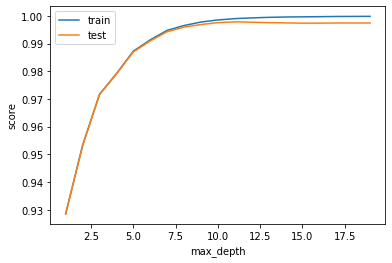

In [306]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [307]:
# Tuning 'min_samples_leaf'.

n_folds = 3

parameters = {'min_samples_leaf': range(1, 32, 10)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_smote, y_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   53.8s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   54.9s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 32, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [308]:
# Cross validation results.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,35.564767,0.520917,0.093729,0.012753,1,{'min_samples_leaf': 1},0.997927,0.997814,0.998123,0.997955,0.000128,4,1.000000,1.000000,1.000000,1.000000,0.000000
1,33.471944,0.914955,0.109350,0.000001,11,{'min_samples_leaf': 11},0.998747,0.998527,0.998655,0.998643,0.000090,3,0.999983,0.999983,0.999986,0.999984,0.000001
2,28.372845,5.772662,0.098935,0.026550,21,{'min_samples_leaf': 21},0.998959,0.998815,0.998834,0.998870,0.000064,2,0.999943,0.999949,0.999953,0.999948,0.000004
3,20.958526,0.857903,0.057281,0.007366,31,{'min_samples_leaf': 31},0.998998,0.998848,0.999043,0.998963,0.000083,1,0.999902,0.999899,0.999904,0.999901,0.000002


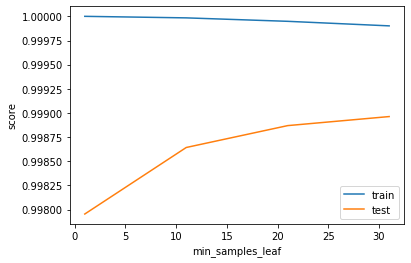

In [309]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.legend()
plt.show()

In [310]:
# Tuning 'min_samples_split'.

n_folds = 3

parameters = {'min_samples_split': range(2, 100, 10)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_smote, y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'min_samples_split': range(2, 100, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [311]:
# Cross validation results.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,35.354221,0.562779,0.098937,0.007366,2,{'min_samples_split': 2},0.997927,0.997814,0.998123,0.997955,0.000128,10,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,35.614461,0.662415,0.130182,0.014729,12,{'min_samples_split': 12},0.998068,0.997841,0.998392,0.998100,0.000226,9,1.000000,1.000000,1.000000,1.000000,2.189309e-08
2,35.741260,0.849655,0.104144,0.007365,22,{'min_samples_split': 22},0.998311,0.998177,0.998381,0.998290,0.000085,8,0.999999,0.999999,0.999999,0.999999,1.773996e-07
3,36.610535,0.548505,0.109350,0.000001,32,{'min_samples_split': 32},0.998479,0.998328,0.998485,0.998431,0.000072,7,0.999997,0.999997,0.999997,0.999997,3.645054e-07
4,36.423073,0.468002,0.114557,0.007364,42,{'min_samples_split': 42},0.998547,0.998359,0.998624,0.998510,0.000111,6,0.999994,0.999996,0.999994,0.999995,6.738437e-07


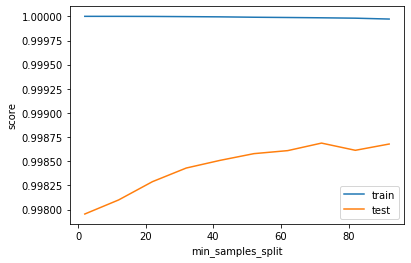

In [312]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("min_samples_split")
plt.ylabel("score")
plt.legend()
plt.show()

In [313]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [5, 7],
              'min_samples_leaf': range(1, 11),
              'min_samples_split': range(70, 75), 
              'criterion': ["entropy", "gini"]}

dtree = DecisionTreeClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [314]:
# Fitting the grid search to the data.

grid_search.fit(X_smote, y_smote)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 20.3min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [5, 7],
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(70, 75)},
             verbose=1)

In [315]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 70}


In [316]:
# Fitting the final model with the best parameters obtained from grid search.

dtc = DecisionTreeClassifier(max_depth = 7,
                             min_samples_leaf = 1,
                             min_samples_split = 70, 
                             criterion = 'gini', 
                             random_state = 0)

In [317]:
# Fitting our final tuned model on our train data.

dtc.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=7, min_samples_split=70, random_state=0)

In [318]:
# Predictions on the test data.

predictions = dtc.predict(X_test)

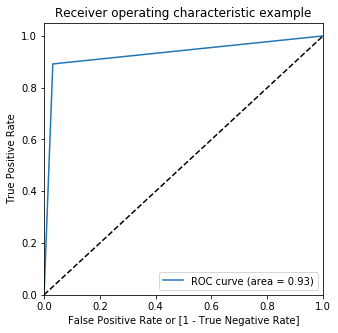

In [319]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [320]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9302826597040794

In [321]:
# Confusion matrix.

confusion_matrix_17 = confusion_matrix(y_test, predictions)
print(confusion_matrix_17)

[[82623  2672]
 [   16   132]]


In [322]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9685404304624136

In [323]:
TP = confusion_matrix_17[1,1] # true positive 
TN = confusion_matrix_17[0,0] # true negatives
FP = confusion_matrix_17[0,1] # false positives
FN = confusion_matrix_17[1,0] # false negatives

In [324]:
# Let's see the sensitivity of our decision tree model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8918918918918919

In [325]:
# Let's see the specificity of our decision tree model.

Specificity = TN / float(TN+FP)
Specificity

0.9686734275162671

In [326]:
# Let's see the precision of our decision tree model.

Precision = TP / float(TP+FP)
Precision

0.047075606276747506

In [327]:
# Let's see the F1 score of our decision tree model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.08943089430894309

**Decision Tree model evaluation metrics on test data using SMOTE without hyperparameter tuning are:**
- **Accuracy - 97.20%**
- **Sensitivity - 88.51%**
- **Specificity - 97.22%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.93**

**Decision Tree model evaluation metrics on test data using SMOTE after hyperparameter tuning are:**
- **Accuracy - 96.85%**
- **Sensitivity - 89.18%**
- **Specificity - 96.86%**
- **Precision - 4.70%**
- **F1 score - 8.94%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.93**

### Random Forests

In [328]:
# Running the random forest with default parameters.

rfc = RandomForestClassifier(random_state = 0)

In [329]:
# Fitting our model on train data.

rfc.fit(X_smote, y_smote)

RandomForestClassifier(random_state=0)

In [330]:
# Making predictions on test data.

predictions = rfc.predict(X_test)

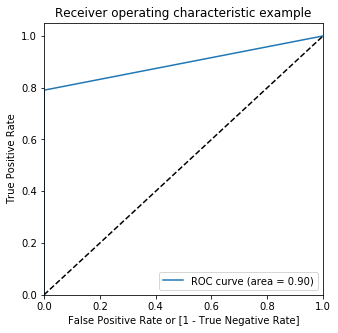

In [331]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [332]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.8951999261703817

In [333]:
# Confusion matrix.

confusion_matrix_18 = confusion_matrix(y_test, predictions)
print(confusion_matrix_18)

[[85283    12]
 [   31   117]]


In [334]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9994967405170698

In [335]:
TP = confusion_matrix_18[1,1] # true positive 
TN = confusion_matrix_18[0,0] # true negatives
FP = confusion_matrix_18[0,1] # false positives
FN = confusion_matrix_18[1,0] # false negatives

In [336]:
# Let's see the sensitivity of our Random forest model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.7905405405405406

In [337]:
# Let's see the specificity of our Random forest model.

Specificity = TN / float(TN+FP)
Specificity

0.9998593118002228

#### Hyperparameter tuning for Random Forests

In [338]:
# Tuning 'max_depth'.

n_folds = 3

# Parameters to build the model.

parameters = {'max_depth': range(2, 10, 2)}

# Instantiating the model.

rfc = RandomForestClassifier(random_state = 0, warm_start = True)


# Fitting tree train data.

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_smote, y_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  3.8min remaining:   45.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.1min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'max_depth': range(2, 10, 2)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [339]:
# Cross validation results.

results_1 = pd.DataFrame(model.cv_results_)
results_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,61.855435,0.716183,1.536102,0.060281,2,{'max_depth': 2},0.967962,0.968461,0.969278,0.968567,0.000542,4,0.968310,0.968611,0.969165,0.968696,0.000354
1,114.480955,0.672339,1.786042,0.041000,4,{'max_depth': 4},0.987762,0.987640,0.987778,0.987727,0.000062,3,0.987944,0.987687,0.987880,0.987837,0.000109
2,149.023833,11.618167,1.515272,0.222389,6,{'max_depth': 6},0.995386,0.995533,0.995828,0.995582,0.000184,2,0.995589,0.995598,0.995959,0.995715,0.000172
3,146.056680,14.861664,1.213257,0.206190,8,{'max_depth': 8},0.998797,0.998890,0.998713,0.998800,0.000072,1,0.998910,0.998984,0.998804,0.998899,0.000074


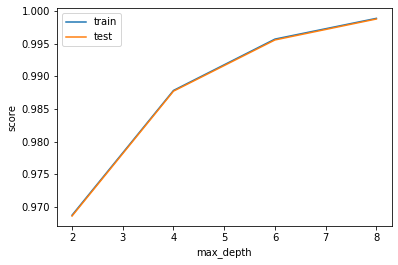

In [340]:
# Plotting the results. 

plt.figure()

plt.plot(results_1["param_max_depth"], 
         results_1["mean_train_score"], 
         label = "train")

plt.plot(results_1["param_max_depth"], 
         results_1["mean_test_score"], 
         label = "test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [341]:
# Tuning 'n_estimators'.

n_folds = 3

parameters = {'n_estimators': range(100, 800, 200)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_smote, y_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 36.3min remaining:  7.3min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 40.1min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'n_estimators': range(100, 800, 200)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [342]:
# Cross validation results.

results_2 = pd.DataFrame(model.cv_results_)
results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,337.362528,5.141500,2.999301,0.066276,100,{'n_estimators': 100},0.999999,0.999999,0.999992,0.999996,3.457729e-06,4,1.0,1.0,1.0,1.0,0.0
1,1012.807649,17.292650,8.966647,0.077585,300,{'n_estimators': 300},0.999999,0.999999,0.999998,0.999999,3.921202e-07,1,1.0,1.0,1.0,1.0,0.0
2,1525.910293,74.609061,11.476468,1.451446,500,{'n_estimators': 500},0.999999,0.999999,0.999998,0.999999,4.464057e-07,2,1.0,1.0,1.0,1.0,0.0
3,1654.791830,205.909872,10.872450,1.411868,700,{'n_estimators': 700},0.999999,0.999999,0.999998,0.999999,5.176430e-07,3,1.0,1.0,1.0,1.0,0.0


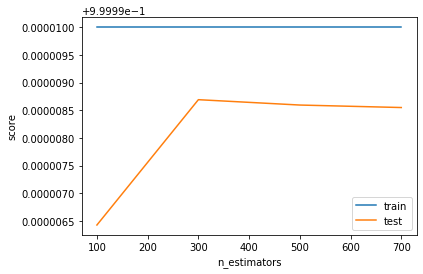

In [343]:
# Plotting the results. 

plt.figure()

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_train_score"], 
         label = "train")

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_test_score"], 
         label = "test")

plt.xlabel("n_estimators")
plt.ylabel("score")
plt.legend()
plt.show()

In [344]:
# Tuning 'max_features'.

n_folds = 3

parameters = {'max_features': range(2, 20, 5)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_smote, y_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 18.2min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 19.8min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'max_features': range(2, 20, 5)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [345]:
# Cross validation results.

results_3 = pd.DataFrame(model.cv_results_)
results_3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,139.190181,1.425876,3.197170,0.070249,2,{'max_features': 2},0.999999,0.999999,0.999992,0.999997,0.000004,1,1.0,1.0,1.0,1.0,0.0
1,473.363045,13.258354,2.874326,0.025510,7,{'max_features': 7},0.999999,0.999991,0.999991,0.999994,0.000004,3,1.0,1.0,1.0,1.0,0.0
2,770.670402,37.160958,2.207817,0.256791,12,{'max_features': 12},0.999992,0.999999,0.999991,0.999994,0.000003,2,1.0,1.0,1.0,1.0,0.0
3,865.548792,105.118389,1.431951,0.159490,17,{'max_features': 17},0.999999,0.999991,0.999991,0.999994,0.000004,4,1.0,1.0,1.0,1.0,0.0


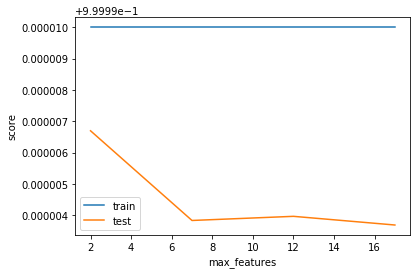

In [346]:
# Plotting the results.

plt.figure()

plt.plot(results_3["param_max_features"], 
         results_3["mean_train_score"], 
         label = "train")

plt.plot(results_3["param_max_features"], 
         results_3["mean_test_score"], 
         label = "test")

plt.xlabel("max_features")
plt.ylabel("score")
plt.legend()
plt.show()

In [347]:
# Tuning 'min_samples_leaf'.

n_folds = 3

parameters = {'min_samples_leaf': range(1, 30, 10)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_smote, y_smote)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  5.6min remaining:  7.0min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  7.5min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 30, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [348]:
# Cross validation results.

results_4 = pd.DataFrame(model.cv_results_)
results_4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,335.020193,4.603797,2.088042,0.434672,1,{'min_samples_leaf': 1},0.999999,0.999999,0.999992,0.999996,0.000003,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,321.221394,6.116713,2.874328,0.179930,11,{'min_samples_leaf': 11},0.999992,0.999990,0.999982,0.999988,0.000005,2,0.999998,0.999998,0.999999,0.999998,2.924715e-07
2,251.292859,90.551239,2.494206,0.882785,21,{'min_samples_leaf': 21},0.999984,0.999983,0.999981,0.999983,0.000001,3,0.999992,0.999992,0.999994,0.999993,1.022146e-06


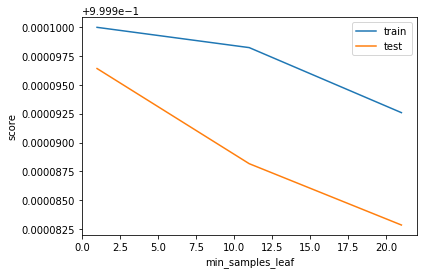

In [349]:
# Plotting the results. 

plt.figure()

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_train_score"], 
         label = "train")

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_test_score"], 
         label = "test")

plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.legend()
plt.show()

In [350]:
 # Tuning 'min_samples_split'.

n_folds = 3

parameters = {'min_samples_split': range(2, 120, 20)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_smote, y_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 14.0min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'min_samples_split': range(2, 120, 20)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [351]:
# Cross validation results.

results_5 = pd.DataFrame(model.cv_results_)
results_5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,337.615076,4.895849,3.113855,0.152169,2,{'min_samples_split': 2},0.999999,0.999999,0.999992,0.999996,0.000003,1,1.0,1.0,1.0,1.0,0.000000e+00
1,336.840657,8.311415,3.124271,0.185275,22,{'min_samples_split': 22},0.999997,0.999997,0.999990,0.999995,0.000003,2,1.0,1.0,1.0,1.0,1.281975e-16
2,338.095800,5.128189,3.056577,0.155865,42,{'min_samples_split': 42},0.999997,0.999996,0.999989,0.999994,0.000004,3,1.0,1.0,1.0,1.0,1.071132e-10
3,336.669506,4.556074,3.051371,0.070247,62,{'min_samples_split': 62},0.999996,0.999993,0.999987,0.999992,0.000004,4,1.0,1.0,1.0,1.0,2.901091e-09
4,336.206079,4.960580,3.118887,0.048382,82,{'min_samples_split': 82},0.999993,0.999994,0.999985,0.999991,0.000004,5,1.0,1.0,1.0,1.0,7.451296e-09
5,216.132333,89.207883,1.796865,0.464691,102,{'min_samples_split': 102},0.999994,0.999992,0.999984,0.999990,0.000004,6,1.0,1.0,1.0,1.0,3.828359e-09


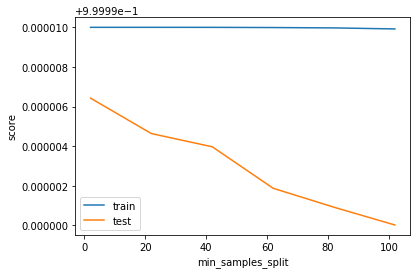

In [352]:
# Plotting the results. 

plt.figure()

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_train_score"], 
         label = "train")

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_test_score"], 
         label = "test")

plt.xlabel("min_samples_split")
plt.ylabel("score")
plt.legend()
plt.show()

In [353]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [4, 6], 
              'n_estimators': [300], 
              'max_features': [2], 
              'min_samples_leaf': [1], 
              'min_samples_split': [2]}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [354]:
# Fitting the grid search to the train data.

grid_search.fit(X_smote, y_smote)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.9min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6], 'max_features': [2],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [300]},
             verbose=1)

In [355]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [356]:
# Fitting the final model with the best parameters obtained from grid search.

rfc = RandomForestClassifier(bootstrap = True, 
                             max_depth = 6, 
                             min_samples_split = 2, 
                             min_samples_leaf = 1, 
                             max_features = 2, 
                             n_estimators = 300, 
                             random_state = 0, 
                             warm_start = True)

In [357]:
# Fitting our final tuned model on train data.

rfc.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=6, max_features=2, n_estimators=300,
                       random_state=0, warm_start=True)

In [358]:
# Predictions on test data.

predictions = rfc.predict(X_test)

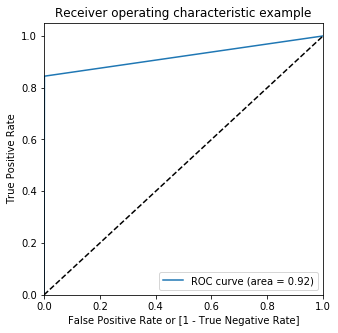

In [359]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [360]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9216466143733276

In [361]:
# Confusion matrix.

confusion_matrix_19 = confusion_matrix(y_test, predictions)
print(confusion_matrix_19)

[[85184   111]
 [   23   125]]


In [362]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9984317030066828

In [363]:
TP = confusion_matrix_19[1,1] # true positive 
TN = confusion_matrix_19[0,0] # true negatives
FP = confusion_matrix_19[0,1] # false positives
FN = confusion_matrix_19[1,0] # false negatives

In [364]:
# Let's see the sensitivity of our random forest model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8445945945945946

In [365]:
# Let's see the specificity of our random forest model.

Specificity = TN / float(TN+FP)
Specificity

0.9986986341520605

In [366]:
# Let's see the precision of our random forest model.

Precision = TP / float(TP+FP)
Precision

0.5296610169491526

In [367]:
# Let's see the F1 score of our random forest model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.6510416666666667

**Random Forests model evaluation metrics on test data using SMOTE without hyperparameter tuning are:**
- **Accuracy - 99.94%**
- **Sensitivity - 79.05%**
- **Specificity - 99.98%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.90**

**Random Forests model evaluation metrics on test data using SMOTE after hyperparameter tuning are:**
- **Accuracy - 99.84%**
- **Sensitivity - 84.45%**
- **Specificity - 99.86%**
- **Precision - 52.96%**
- **F1 score - 65.10%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.92**

### XGBoost

In [368]:
# Running XGBoost with default parameters.

xgb = XGBClassifier(random_state = 0)

In [369]:
# Fitting our model on train data.

xgb.fit(X_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [370]:
# Making predictions on test data.

predictions = xgb.predict(X_test)

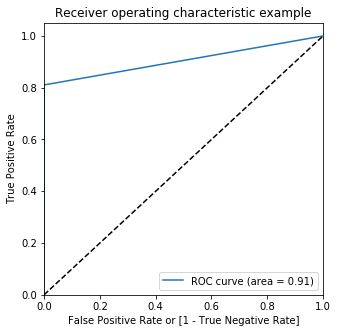

In [371]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [372]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9052119591307118

In [373]:
# Confusion matrix.

confusion_matrix_20 = confusion_matrix(y_test, predictions)
print(confusion_matrix_20)

[[85262    33]
 [   28   120]]


In [374]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9992860737567735

In [375]:
TP = confusion_matrix_20[1,1] # true positive 
TN = confusion_matrix_20[0,0] # true negatives
FP = confusion_matrix_20[0,1] # false positives
FN = confusion_matrix_20[1,0] # false negatives

In [376]:
# Let's see the sensitivity of our XGBoost model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8108108108108109

In [377]:
# Let's see the specificity of our XGBoost model.

Specificity = TN / float(TN+FP)
Specificity

0.9996131074506126

#### Hyperparameter tuning for XGBoosting

In [378]:
# Tuning 'max_depth'.

n_folds = 3

# Parameters to build the model.

parameters = {'max_depth': range(3, 10, 1)}

# Instantiating the model.

xgb = XGBClassifier(random_state = 0)

# Fitting tree train data.

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_smote, y_smote)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 17.7min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [379]:
# Cross validation results.

results_1 = pd.DataFrame(model.cv_results_)
results_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,215.532140,1.271453,1.291368,0.162506,3,{'max_depth': 3},0.999928,0.999912,0.999938,0.999926,0.000011,7,0.999948,0.999956,0.999971,0.999958,9.209051e-06
1,284.652271,0.803078,1.348643,0.014725,4,{'max_depth': 4},0.999985,0.999981,0.999970,0.999978,0.000006,6,0.999997,0.999994,0.999995,0.999995,1.211381e-06
2,351.003417,1.101289,1.744386,0.007363,5,{'max_depth': 5},0.999993,0.999986,0.999978,0.999986,0.000006,5,1.000000,1.000000,1.000000,1.000000,6.146011e-09
3,414.356573,1.233418,1.968291,0.022095,6,{'max_depth': 6},0.999995,0.999994,0.999983,0.999991,0.000005,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,461.032152,3.706311,2.025570,0.099068,7,{'max_depth': 7},0.999996,0.999996,0.999989,0.999993,0.000003,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,420.386886,49.299659,1.609002,0.150378,8,{'max_depth': 8},0.999995,0.999995,0.999989,0.999993,0.000003,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,336.425652,35.949923,0.963348,0.143360,9,{'max_depth': 9},0.999992,0.999995,0.999990,0.999993,0.000002,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00


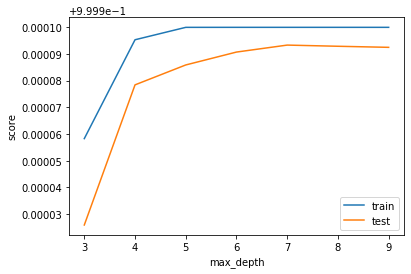

In [380]:
# Plotting the results. 

plt.figure()

plt.plot(results_1["param_max_depth"], 
         results_1["mean_train_score"], 
         label = "train")

plt.plot(results_1["param_max_depth"], 
         results_1["mean_test_score"], 
         label = "test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [381]:
# Tuning 'gamma'.

n_folds = 3

parameters = {'gamma': range(0, 6)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_smote, y_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 16.3min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [382]:
# Cross validation results.

results_2 = pd.DataFrame(model.cv_results_)
results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,419.915601,0.796387,1.890182,0.012753,0,{'gamma': 0},0.999995,0.999994,0.999983,0.999991,0.000005,2,1.000000,1.0,1.000000,1.000000,0.000000e+00
1,418.528179,1.853773,1.892509,0.282529,1,{'gamma': 1},0.999995,0.999987,0.999991,0.999991,0.000003,1,1.000000,1.0,1.000000,1.000000,9.064933e-17
2,420.191384,1.983117,1.622032,0.120681,2,{'gamma': 2},0.999994,0.999992,0.999986,0.999990,0.000004,3,1.000000,1.0,1.000000,1.000000,2.624272e-09
3,418.449081,1.068653,1.405923,0.025513,3,{'gamma': 3},0.999991,0.999987,0.999977,0.999985,0.000006,6,0.999999,1.0,1.000000,1.000000,2.553518e-07
4,421.791317,6.846080,1.114311,0.248760,4,{'gamma': 4},0.999992,0.999992,0.999979,0.999988,0.000006,4,1.000000,1.0,0.999999,0.999999,1.526966e-07
5,226.614490,135.405517,0.645686,0.140497,5,{'gamma': 5},0.999991,0.999992,0.999976,0.999987,0.000007,5,0.999999,1.0,0.999999,0.999999,4.470033e-07


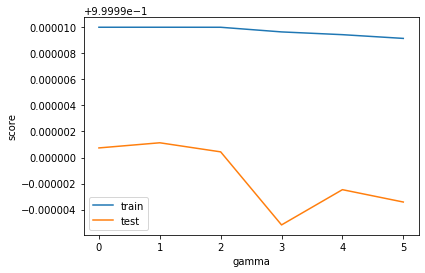

In [383]:
# Plotting the results. 

plt.figure()

plt.plot(results_2["param_gamma"], 
         results_2["mean_train_score"], 
         label = "train")

plt.plot(results_2["param_gamma"], 
         results_2["mean_test_score"], 
         label = "test")

plt.xlabel("gamma")
plt.ylabel("score")
plt.legend()
plt.show()

In [384]:
# Tuning 'subsample'.

n_folds = 3

parameters = {'subsample': np.arange(0, 1, 0.1)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_smote, y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 22.8min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [385]:
# Cross validation results.

results_3 = pd.DataFrame(model.cv_results_)
results_3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,64.868859,0.451273,0.499887,0.033749,0,{'subsample': 0.0},0.500000,0.500000,0.500000,0.500000,0.000000e+00,10,0.500000,0.500000,0.500000,0.500000,0.000000e+00
1,357.663843,1.777366,1.968291,0.058452,0.1,{'subsample': 0.1},0.999969,0.999965,0.999964,0.999966,2.303125e-06,9,0.999994,0.999991,0.999996,0.999993,1.989839e-06
2,378.442226,1.054493,2.035986,0.058912,0.2,{'subsample': 0.2},0.999988,0.999988,0.999989,0.999988,9.989244e-08,7,0.999999,0.999997,1.000000,0.999998,1.076384e-06
3,386.037216,19.066096,2.155745,0.276222,0.3,{'subsample': 0.30000000000000004},0.999984,0.999979,0.999991,0.999984,5.080994e-06,8,0.999999,1.000000,1.000000,1.000000,3.445977e-07
4,381.904977,1.892195,2.020361,0.064197,0.4,{'subsample': 0.4},0.999988,0.999992,0.999986,0.999989,2.595921e-06,6,1.000000,1.000000,1.000000,1.000000,1.716996e-08
5,393.333394,5.717952,2.176579,0.206584,0.5,{'subsample': 0.5},0.999994,0.999989,0.999987,0.999990,2.906974e-06,3,1.000000,1.000000,1.000000,1.000000,5.355659e-11
6,397.655145,10.733884,2.009959,0.036814,0.6,{'subsample': 0.6000000000000001},0.999995,0.999993,0.999985,0.999991,4.447766e-06,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
7,399.638785,2.941868,1.931846,0.129026,0.7,{'subsample': 0.7000000000000001},0.999992,0.999986,0.999989,0.999989,2.180762e-06,5,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,380.612794,8.651304,1.426752,0.125189,0.8,{'subsample': 0.8},0.999992,0.999997,0.999990,0.999993,2.909519e-06,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,214.377053,11.830907,0.952913,0.134369,0.9,{'subsample': 0.9},0.999994,0.999989,0.999985,0.999989,3.570472e-06,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00


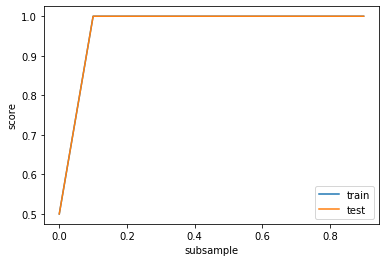

In [386]:
# Plotting the results.

plt.figure()

plt.plot(results_3["param_subsample"], 
         results_3["mean_train_score"], 
         label = "train")

plt.plot(results_3["param_subsample"], 
         results_3["mean_test_score"], 
         label = "test")

plt.xlabel("subsample")
plt.ylabel("score")
plt.legend()
plt.show()

In [387]:
# Tuning 'colsample_bytree'.

n_folds = 3

parameters = {'colsample_bytree': np.arange(0, 1, 0.1)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_smote, y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.6min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [388]:
# Cross validation results.

results_4 = pd.DataFrame(model.cv_results_)
results_4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,33.548261,0.424745,1.921426,0.033746,0,{'colsample_bytree': 0.0},0.998962,0.999033,0.999077,0.999024,4.731697e-05,10,0.999406,0.999393,0.999406,0.999402,6.064396e-06
1,47.313996,0.649652,2.155747,0.071013,0.1,{'colsample_bytree': 0.1},0.999962,0.999963,0.999949,0.999958,6.262309e-06,9,0.999996,0.999995,0.999995,0.999995,5.861686e-07
2,88.284379,2.079333,2.181782,0.215075,0.2,{'colsample_bytree': 0.2},0.999989,0.999983,0.999982,0.999985,2.885274e-06,8,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,129.844437,0.308585,2.015153,0.051019,0.3,{'colsample_bytree': 0.30000000000000004},0.999993,0.999986,0.999990,0.999990,3.121790e-06,6,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,169.444660,0.980655,1.978706,0.029457,0.4,{'colsample_bytree': 0.4},0.999989,0.999991,0.999991,0.999990,9.164793e-07,5,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,210.325262,1.983320,1.989123,0.032098,0.5,{'colsample_bytree': 0.5},0.999994,0.999991,0.999988,0.999991,2.527169e-06,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,255.161356,4.954975,2.035986,0.103096,0.6,{'colsample_bytree': 0.6000000000000001},0.999995,0.999992,0.999992,0.999993,1.335894e-06,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
7,293.077696,1.430955,2.119281,0.339714,0.7,{'colsample_bytree': 0.7000000000000001},0.999993,0.999992,0.999991,0.999992,1.032714e-06,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,289.875749,15.406672,1.484036,0.140314,0.8,{'colsample_bytree': 0.8},0.999995,0.999991,0.999991,0.999992,1.678151e-06,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,256.597684,23.199105,0.932056,0.152144,0.9,{'colsample_bytree': 0.9},0.999992,0.999990,0.999987,0.999990,1.934228e-06,7,1.000000,1.000000,1.000000,1.000000,0.000000e+00


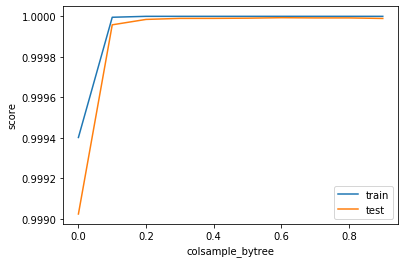

In [389]:
# Plotting the results. 

plt.figure()

plt.plot(results_4["param_colsample_bytree"], 
         results_4["mean_train_score"], 
         label = "train")

plt.plot(results_4["param_colsample_bytree"], 
         results_4["mean_test_score"], 
         label = "test")

plt.xlabel("colsample_bytree")
plt.ylabel("score")
plt.legend()
plt.show()

In [390]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [5, 6, 7], 
              'gamma': [1], 
              'subsample': [0.1], 
              'colsample_bytree': [0.1, 0.2]}

xgb = XGBClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [391]:
# Fitting the grid search to the train data.

grid_search.fit(X_smote, y_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.1min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [392]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'colsample_bytree': 0.2, 'gamma': 1, 'max_depth': 7, 'subsample': 0.1}


In [393]:
# Fitting the final model with the best parameters obtained from grid search.

xgb = XGBClassifier(booster = 'gbtree',
                    learning_rate = 0.2,
                    max_depth = 7, 
                    gamma = 1,
                    subsample = 0.1, 
                    colsample_bytree = 0.2, 
                    random_state = 0)

In [394]:
# Fitting our final tuned model on train data.

xgb.fit(X_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [395]:
# Predictions on test data.

predictions = xgb.predict(X_test)

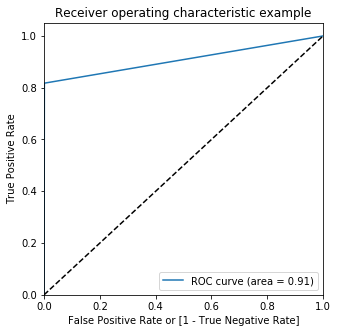

In [396]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [397]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.908244479017971

In [398]:
# Confusion matrix.

confusion_matrix_21 = confusion_matrix(y_test, predictions)
print(confusion_matrix_21)

[[85203    92]
 [   27   121]]


In [399]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9986072586402631

In [400]:
TP = confusion_matrix_21[1,1] # true positive 
TN = confusion_matrix_21[0,0] # true negatives
FP = confusion_matrix_21[0,1] # false positives
FN = confusion_matrix_21[1,0] # false negatives

In [401]:
# Let's see the sensitivity of our XGBoost model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8175675675675675

In [402]:
# Let's see the specificity of our XGBoost model.

Specificity = TN / float(TN+FP)
Specificity

0.9989213904683745

In [403]:
# Let's see the precision of our XGBoost model.

Precision = TP / float(TP+FP)
Precision

0.568075117370892

In [404]:
# Let's see the F1 score of our XGBoost model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.6703601108033241

**XGBoost model evaluation metrics on test data using SMOTE without hyperparameter tuning are:**
- **Accuracy - 99.92%**
- **Sensitivity - 81.08%**
- **Specificity - 99.96%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.91**

**XGBoost model evaluation metrics on test data using SMOTE after hyperparameter tuning are:**
- **Accuracy - 99.86%**
- **Sensitivity - 81.75%**
- **Specificity - 99.89%**
- **Precision - 56.80%**
- **F1 score - 67.03%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.91**

In [405]:
# Dataframe containing all the metrics for each model we've built so far using SMOTE.

smote_metrics = pd.DataFrame({'Metrics': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 score', 'ROC_AUC'], 
                               'Decision Trees': [96.85, 89.18, 96.86, 4.70, 8.94, 0.93], 
                               'Random Forests': [99.84, 84.45, 99.86, 52.96, 65.10, 0.92], 
                               'XGBoost': [99.86, 81.75, 99.89, 56.80, 67.03, 0.91]})
smote_metrics

,Metrics,Decision Trees,Random Forests,XGBoost
0,Accuracy,96.85,99.84,99.86
1,Sensitivity,89.18,84.45,81.75
2,Specificity,96.86,99.86,99.89
3,Precision,4.70,52.96,56.80
4,F1 score,8.94,65.10,67.03
5,ROC_AUC,0.93,0.92,0.91


### ADASYN

In [406]:
# Applying ADASYN to our imbalanced train dataset.

adasyn = ADASYN(random_state = 0)

X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

print(sorted(Counter(y_adasyn).items()))

[(0, 199020), (1, 199040)]


### Decision trees

In [407]:
# Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.

dtc = DecisionTreeClassifier(max_depth = 5, random_state = 0)

dtc.fit(X_adasyn, y_adasyn)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [408]:
# Making predictions on the test data.

predictions = dtc.predict(X_test)

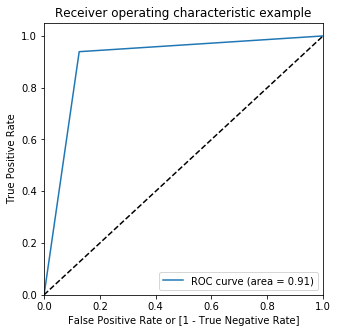

In [409]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [410]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9066483492109261

In [411]:
# Confusion matrix.

confusion_matrix_22 = confusion_matrix(y_test, predictions)
print(confusion_matrix_22)

[[74557 10738]
 [    9   139]]


In [412]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.8742202403941809

In [413]:
TP = confusion_matrix_22[1,1] # true positive 
TN = confusion_matrix_22[0,0] # true negatives
FP = confusion_matrix_22[0,1] # false positives
FN = confusion_matrix_22[1,0] # false negatives

In [414]:
# Let's see the sensitivity of our decision tree model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.9391891891891891

In [415]:
# Let's see the specificity of our decision tree model.

Specificity = TN / float(TN+FP)
Specificity

0.8741075092326631

#### Hyperparameter tuning for Decision Tree model

In [416]:
# Tuning 'max_depth'.

n_folds = 3

parameters = {'max_depth': range(1, 20)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  2.2min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 20)}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [417]:
# Scores of GridSearch CV.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.082848,0.162506,0.098936,0.029457,1,{'max_depth': 1},0.777154,0.775338,0.763889,0.772127,0.005872,19,0.773362,0.766222,0.805502,0.781695,0.017084
1,3.665811,0.089586,0.114558,0.019483,2,{'max_depth': 2},0.867283,0.840960,0.839833,0.849359,0.012683,18,0.840608,0.849530,0.879214,0.856451,0.016503
2,6.031108,0.239939,0.097180,0.008868,3,{'max_depth': 3},0.869727,0.889037,0.866823,0.875195,0.009859,17,0.870406,0.907654,0.906990,0.895017,0.017405
3,8.449687,0.137964,0.093729,0.000002,4,{'max_depth': 4},0.921744,0.906046,0.866377,0.898055,0.023299,14,0.922100,0.928969,0.923760,0.924943,0.002926
4,10.589807,0.079649,0.104143,0.007364,5,{'max_depth': 5},0.921960,0.906395,0.909339,0.912565,0.006751,2,0.946974,0.953688,0.946590,0.949084,0.003260


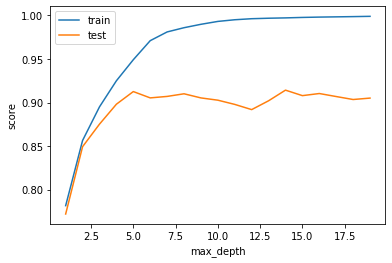

In [418]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [419]:
# Tuning 'min_samples_leaf'.

n_folds = 3

parameters = {'min_samples_leaf': range(1, 32, 10)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   57.4s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   59.8s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 32, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [420]:
# Cross validation results.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,37.968109,2.450648,0.083324,0.014714,1,{'min_samples_leaf': 1},0.900500,0.877492,0.877928,0.885307,0.010745,4,1.000000,1.000000,1.000000,1.000000,0.000000
1,35.458717,2.395503,0.104143,0.007363,11,{'min_samples_leaf': 11},0.925944,0.894986,0.908674,0.909868,0.012667,3,0.999988,0.999991,0.999989,0.999989,0.000001
2,30.126074,3.068790,0.078111,0.022092,21,{'min_samples_leaf': 21},0.931577,0.916181,0.916190,0.921316,0.007255,2,0.999961,0.999972,0.999963,0.999966,0.000005
3,24.149067,0.277648,0.088510,0.048295,31,{'min_samples_leaf': 31},0.941357,0.920538,0.918563,0.926819,0.010311,1,0.999920,0.999943,0.999928,0.999930,0.000009


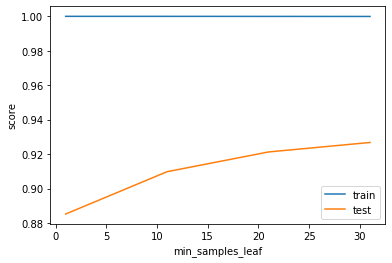

In [421]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.legend()
plt.show()

In [422]:
# Tuning 'min_samples_split'.

n_folds = 3

parameters = {'min_samples_split': range(2, 100, 10)}

dtree = DecisionTreeClassifier(random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'min_samples_split': range(2, 100, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [423]:
# Cross validation results.

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,38.440771,3.327041,0.104143,7.364010e-03,2,{'min_samples_split': 2},0.900500,0.877492,0.877928,0.885307,0.010745,10,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,38.141862,2.968719,0.109349,8.778064e-07,12,{'min_samples_split': 12},0.905059,0.876484,0.884734,0.888759,0.012008,9,1.000000,1.000000,1.000000,1.000000,1.715753e-08
2,38.498666,3.245684,0.109352,2.485354e-06,22,{'min_samples_split': 22},0.909174,0.878459,0.884548,0.890727,0.013279,8,1.000000,1.000000,1.000000,1.000000,3.029538e-08
3,38.938612,3.166610,0.119763,7.365471e-03,32,{'min_samples_split': 32},0.911269,0.878185,0.884060,0.891172,0.014412,7,1.000000,0.999999,0.999999,0.999999,5.933917e-08
4,38.890069,2.788694,0.104146,7.363392e-03,42,{'min_samples_split': 42},0.912428,0.886778,0.877415,0.892207,0.014800,6,0.999999,0.999999,0.999999,0.999999,2.679532e-07


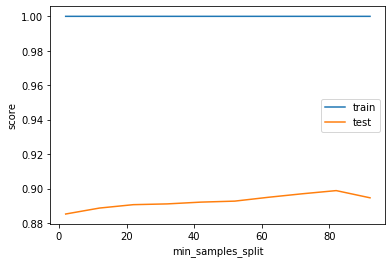

In [424]:
# Plotting the results.

plt.figure()

plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="train")

plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test")

plt.xlabel("min_samples_split")
plt.ylabel("score")
plt.legend()
plt.show()

In [425]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [5],
              'min_samples_leaf': [31],
              'min_samples_split': range(82, 85), 
              'criterion': ["entropy", "gini"]}

dtree = DecisionTreeClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [426]:
# Fitting the grid search to the data.

grid_search.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   31.2s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [5],
                         'min_samples_leaf': [31],
                         'min_samples_split': range(82, 85)},
             verbose=1)

In [427]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 31, 'min_samples_split': 82}


In [428]:
# Fitting the final model with the best parameters obtained from grid search.

dtc = DecisionTreeClassifier(max_depth = 5,
                             min_samples_leaf = 31,
                             min_samples_split = 82, 
                             criterion = 'gini', 
                             random_state = 0)

In [429]:
# Fitting our final tuned model on our train data.

dtc.fit(X_adasyn, y_adasyn)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=31, min_samples_split=82,
                       random_state=0)

In [430]:
# Predictions on the test data.

predictions = dtc.predict(X_test)

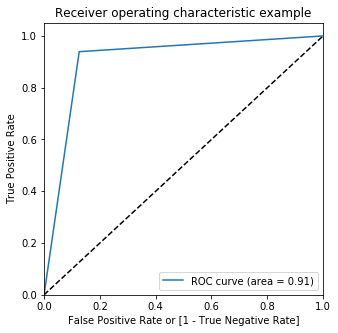

In [431]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [432]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9066190391693059

In [433]:
# Confusion matrix.

confusion_matrix_23 = confusion_matrix(y_test, predictions)
print(confusion_matrix_23)

[[74552 10743]
 [    9   139]]


In [434]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.8741617218496541

In [435]:
TP = confusion_matrix_23[1,1] # true positive 
TN = confusion_matrix_23[0,0] # true negatives
FP = confusion_matrix_23[0,1] # false positives
FN = confusion_matrix_23[1,0] # false negatives

In [436]:
# Let's see the sensitivity of our decision tree model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.9391891891891891

In [437]:
# Let's see the specificity of our decision tree model.

Specificity = TN / float(TN+FP)
Specificity

0.8740488891494226

In [438]:
# Let's see the precision of our decision tree model.

Precision = TP / float(TP+FP)
Precision

0.012773387244991729

In [439]:
# Let's see the F1 score of our decision tree model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.025203989120580233

**Decision Tree model evaluation metrics on test data using ADASYN without hyperparameter tuning are:**
- **Accuracy - 87.42%**
- **Sensitivity - 93.91%**
- **Specificity - 87.41%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.91**

**Decision Tree model evaluation metrics on test data using ADASYN after hyperparameter tuning are:**
- **Accuracy - 87.41%**
- **Sensitivity - 93.91%**
- **Specificity - 87.40%**
- **Precision - 1.27%**
- **F1 score - 2.52%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.91**

### Random Forests

In [440]:
# Running the random forest with default parameters.

rfc = RandomForestClassifier(random_state = 0)

In [441]:
# Fitting our model on train data.

rfc.fit(X_adasyn, y_adasyn)

RandomForestClassifier(random_state=0)

In [442]:
# Making predictions on test data.

predictions = rfc.predict(X_test)

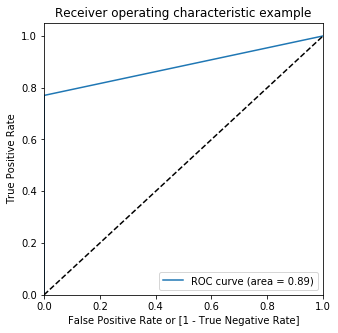

In [443]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [444]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.8850530670185984

In [445]:
# Confusion matrix.

confusion_matrix_24 = confusion_matrix(y_test, predictions)
print(confusion_matrix_24)

[[85281    14]
 [   34   114]]


In [446]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9994382219725431

In [447]:
TP = confusion_matrix_24[1,1] # true positive 
TN = confusion_matrix_24[0,0] # true negatives
FP = confusion_matrix_24[0,1] # false positives
FN = confusion_matrix_24[1,0] # false negatives

In [448]:
# Let's see the sensitivity of our Random forest model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.7702702702702703

In [449]:
# Let's see the specificity of our Random forest model.

Specificity = TN / float(TN+FP)
Specificity

0.9998358637669266

#### Hyperparameter tuning for Random Forests

In [450]:
# Tuning 'max_depth'.

n_folds = 3

# Parameters to build the model.

parameters = {'max_depth': range(2, 20, 2)}

# Instantiating the model.

rfc = RandomForestClassifier(random_state = 0, warm_start = True)


# Fitting tree train data.

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 12.4min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 2)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [451]:
# Cross validation results.

results_1 = pd.DataFrame(model.cv_results_)
results_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,57.435595,0.206191,1.588166,0.007361,2,{'max_depth': 2},0.932387,0.934698,0.904071,0.923719,0.013925,9,0.940350,0.945143,0.943726,0.943073,2.010718e-03
1,106.841232,0.199603,1.801663,0.040999,4,{'max_depth': 4},0.956493,0.969650,0.949864,0.958669,0.008223,8,0.978525,0.983108,0.976745,0.979459,2.680748e-03
2,152.559076,0.495182,1.983912,0.033748,6,{'max_depth': 6},0.976063,0.982795,0.971588,0.976815,0.004606,7,0.993163,0.995810,0.992744,0.993906,1.357485e-03
3,194.165798,1.608752,2.155747,0.025510,8,{'max_depth': 8},0.988954,0.988043,0.984195,0.987064,0.002062,6,0.998284,0.999208,0.998146,0.998546,4.714881e-04
4,226.543421,2.453208,2.322375,0.019483,10,{'max_depth': 10},0.994481,0.991150,0.991195,0.992275,0.001560,5,0.999649,0.999868,0.999775,0.999764,8.951143e-05
5,247.052140,2.572844,2.442137,0.007361,12,{'max_depth': 12},0.996725,0.992392,0.993219,0.994112,0.001878,4,0.999975,0.999989,0.999978,0.999981,5.812322e-06
6,262.357526,2.635061,2.442134,0.115734,14,{'max_depth': 14},0.997680,0.993645,0.995312,0.995546,0.001656,3,0.999999,0.999998,0.999998,0.999999,5.064568e-07
7,265.939776,7.874740,1.957875,0.200188,16,{'max_depth': 16},0.998281,0.993384,0.995935,0.995867,0.002000,1,1.000000,1.000000,1.000000,1.000000,6.234969e-08
8,219.940120,14.906219,1.327816,0.162841,18,{'max_depth': 18},0.998259,0.992288,0.996102,0.995550,0.002469,2,1.000000,1.000000,1.000000,1.000000,2.061351e-08


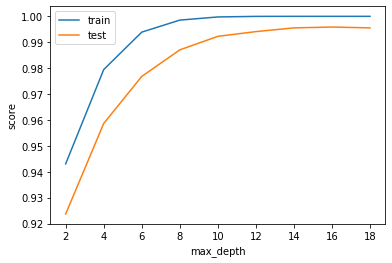

In [452]:
# Plotting the results. 

plt.figure()

plt.plot(results_1["param_max_depth"], 
         results_1["mean_train_score"], 
         label = "train")

plt.plot(results_1["param_max_depth"], 
         results_1["mean_test_score"], 
         label = "test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [453]:
# Tuning 'n_estimators'.

n_folds = 3

parameters = {'n_estimators': range(100, 800, 200)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 39.4min remaining:  7.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 44.5min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'n_estimators': range(100, 800, 200)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [454]:
# Cross validation results.

results_2 = pd.DataFrame(model.cv_results_)
results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,361.976359,1.944128,2.926397,0.032099,100,{'n_estimators': 100},0.999228,0.997653,0.998737,0.998539,0.000658,4,1.0,1.0,1.0,1.0,0.0
1,1081.974260,5.061378,8.576115,0.111195,300,{'n_estimators': 300},0.999683,0.998801,0.999295,0.999260,0.000361,3,1.0,1.0,1.0,1.0,0.0
2,1647.715570,53.248318,11.330815,1.401966,500,{'n_estimators': 500},0.999683,0.998832,0.999313,0.999276,0.000348,2,1.0,1.0,1.0,1.0,0.0
3,1817.962243,197.885863,10.882870,1.422161,700,{'n_estimators': 700},0.999691,0.998866,0.999287,0.999281,0.000337,1,1.0,1.0,1.0,1.0,0.0


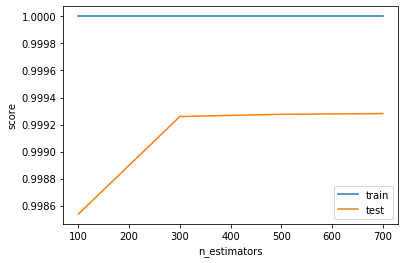

In [455]:
# Plotting the results. 

plt.figure()

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_train_score"], 
         label = "train")

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_test_score"], 
         label = "test")

plt.xlabel("n_estimators")
plt.ylabel("score")
plt.legend()
plt.show()

In [456]:
# Tuning 'max_features'.

n_folds = 3

parameters = {'max_features': range(2, 20, 5)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 19.9min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 23.4min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'max_features': range(2, 20, 5)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [457]:
# Cross validation results.

results_3 = pd.DataFrame(model.cv_results_)
results_3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,139.748397,0.637013,3.030539,0.121673,2,{'max_features': 2},0.998480,0.997249,0.997925,0.997885,0.000503,1,1.0,1.0,1.0,1.0,0.0
1,522.528964,4.247908,2.887215,0.047707,7,{'max_features': 7},0.998274,0.996872,0.997327,0.997491,0.000584,2,1.0,1.0,1.0,1.0,0.0
2,863.452131,11.782686,2.181781,0.228995,12,{'max_features': 12},0.997916,0.995422,0.995158,0.996166,0.001243,4,1.0,1.0,1.0,1.0,0.0
3,989.230341,85.553926,1.510074,0.198139,17,{'max_features': 17},0.999271,0.993457,0.998125,0.996951,0.002515,3,1.0,1.0,1.0,1.0,0.0


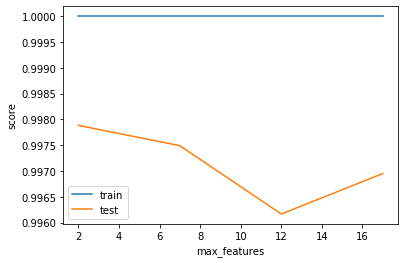

In [458]:
# Plotting the results.

plt.figure()

plt.plot(results_3["param_max_features"], 
         results_3["mean_train_score"], 
         label = "train")

plt.plot(results_3["param_max_features"], 
         results_3["mean_test_score"], 
         label = "test")

plt.xlabel("max_features")
plt.ylabel("score")
plt.legend()
plt.show()

In [459]:
# Tuning 'min_samples_leaf'.

n_folds = 3

parameters = {'min_samples_leaf': range(1, 30, 10)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  5.9min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  8.2min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 30, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [460]:
# Cross validation results.

results_4 = pd.DataFrame(model.cv_results_)
results_4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,361.710846,1.654858,2.218231,0.125619,1,{'min_samples_leaf': 1},0.999228,0.997653,0.998737,0.998539,0.000658,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,341.384754,4.062395,2.900361,0.142221,11,{'min_samples_leaf': 11},0.999312,0.997347,0.998473,0.998377,0.000805,2,1.000000,1.000000,1.000000,1.000000,1.686299e-07
2,270.070003,81.227572,2.400480,0.836613,21,{'min_samples_leaf': 21},0.998628,0.996394,0.996179,0.997067,0.001107,3,0.999998,0.999998,0.999999,0.999998,5.051510e-07


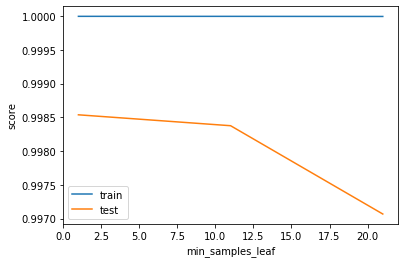

In [461]:
# Plotting the results. 

plt.figure()

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_train_score"], 
         label = "train")

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_test_score"], 
         label = "test")

plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.legend()
plt.show()

In [462]:
 # Tuning 'min_samples_split'.

n_folds = 3

parameters = {'min_samples_split': range(2, 120, 20)}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 15.2min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1, param_grid={'min_samples_split': range(2, 120, 20)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [463]:
# Cross validation results.

results_5 = pd.DataFrame(model.cv_results_)
results_5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,359.563157,2.166808,3.165926,0.103097,2,{'min_samples_split': 2},0.999228,0.997653,0.998737,0.998539,0.000658,2,1.0,1.0,1.0,1.0,0.000000e+00
1,358.964912,4.149859,3.108646,0.129449,22,{'min_samples_split': 22},0.999691,0.997502,0.998244,0.998479,0.000909,3,1.0,1.0,1.0,1.0,4.123452e-09
2,360.245235,4.280228,2.973261,0.108478,42,{'min_samples_split': 42},0.999446,0.996956,0.998773,0.998392,0.001052,4,1.0,1.0,1.0,1.0,6.949253e-09
3,361.238546,2.458871,3.004504,0.115027,62,{'min_samples_split': 62},0.999407,0.997378,0.999270,0.998685,0.000926,1,1.0,1.0,1.0,1.0,8.612156e-09
4,360.009664,2.054164,3.165931,0.057516,82,{'min_samples_split': 82},0.999374,0.996929,0.998733,0.998345,0.001035,6,1.0,1.0,1.0,1.0,1.593213e-08
5,232.343883,87.412200,2.051582,0.824875,102,{'min_samples_split': 102},0.999108,0.997428,0.998531,0.998356,0.000697,5,1.0,1.0,1.0,1.0,2.145300e-08


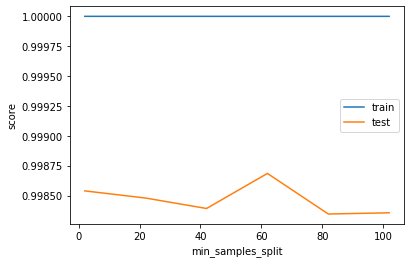

In [464]:
# Plotting the results. 

plt.figure()

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_train_score"], 
         label = "train")

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_test_score"], 
         label = "test")

plt.xlabel("min_samples_split")
plt.ylabel("score")
plt.legend()
plt.show()

In [465]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [10, 14], 
              'n_estimators': [300], 
              'max_features': [2], 
              'min_samples_leaf': [1], 
              'min_samples_split': [62]}

rfc = RandomForestClassifier(random_state = 0, warm_start = True)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [466]:
# Fitting the grid search to the train data.

grid_search.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  4.7min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [10, 14], 'max_features': [2],
                         'min_samples_leaf': [1], 'min_samples_split': [62],
                         'n_estimators': [300]},
             verbose=1)

In [467]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 62, 'n_estimators': 300}


In [468]:
# Fitting the final model with the best parameters obtained from grid search.

rfc = RandomForestClassifier(bootstrap = True, 
                             max_depth = 10, 
                             min_samples_split = 62, 
                             min_samples_leaf = 1, 
                             max_features = 2, 
                             n_estimators = 300, 
                             random_state = 0, 
                             warm_start = True)

In [469]:
# Fitting our final tuned model on train data.

rfc.fit(X_adasyn, y_adasyn)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=62,
                       n_estimators=300, random_state=0, warm_start=True)

In [470]:
# Predictions on test data.

predictions = rfc.predict(X_test)

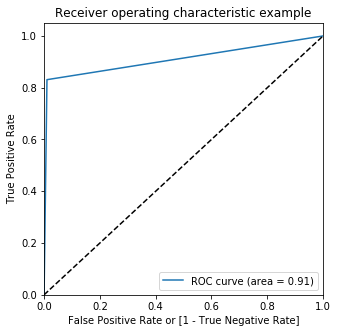

In [471]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [472]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9103585251820788

In [473]:
# Confusion matrix.

confusion_matrix_25 = confusion_matrix(y_test, predictions)
print(confusion_matrix_25)

[[84411   884]
 [   25   123]]


In [474]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9893613286050349

In [475]:
TP = confusion_matrix_25[1,1] # true positive 
TN = confusion_matrix_25[0,0] # true negatives
FP = confusion_matrix_25[0,1] # false positives
FN = confusion_matrix_25[1,0] # false negatives

In [476]:
# Let's see the sensitivity of our random forest model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.831081081081081

In [477]:
# Let's see the specificity of our random forest model.

Specificity = TN / float(TN+FP)
Specificity

0.9896359692830764

In [478]:
# Let's see the precision of our random forest model.

Precision = TP / float(TP+FP)
Precision

0.1221449851042701

In [479]:
# Let's see the F1 score of our random forest model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.21298701298701297

**Random Forests model evaluation metrics on test data using ADASYN without hyperparameter tuning are:**
- **Accuracy - 99.94%**
- **Sensitivity - 77.02%**
- **Specificity - 99.98%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.89**

**Random Forests model evaluation metrics on test data using ADASYN after hyperparameter tuning are:**
- **Accuracy - 98.93%**
- **Sensitivity - 83.10%**
- **Specificity - 98.96%**
- **Precision - 12.21%**
- **F1 score - 21.29%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.91**

### XGBoost

In [480]:
# Running XGBoost with default parameters.

xgb = XGBClassifier(random_state = 0)

In [481]:
# Fitting our model on train data.

xgb.fit(X_adasyn, y_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [482]:
# Making predictions on test data.

predictions = xgb.predict(X_test)

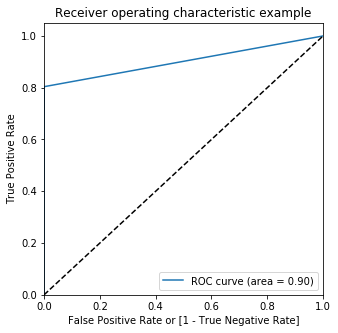

In [483]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [484]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9018101327190371

In [485]:
# Confusion matrix.

confusion_matrix_26 = confusion_matrix(y_test, predictions)
print(confusion_matrix_26)

[[85258    37]
 [   29   119]]


In [486]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9992275552122467

In [487]:
TP = confusion_matrix_26[1,1] # true positive 
TN = confusion_matrix_26[0,0] # true negatives
FP = confusion_matrix_26[0,1] # false positives
FN = confusion_matrix_26[1,0] # false negatives

In [488]:
# Let's see the sensitivity of our XGBoost model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8040540540540541

In [489]:
# Let's see the specificity of our XGBoost model.

Specificity = TN / float(TN+FP)
Specificity

0.9995662113840201

#### Hyperparameter tuning for XGBoosting

In [490]:
# Tuning 'max_depth'.

n_folds = 3

# Parameters to build the model.

parameters = {'max_depth': range(3, 10, 1)}

# Instantiating the model.

xgb = XGBClassifier(random_state = 0)

# Fitting tree train data.

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 16.3min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [491]:
# Cross validation results.

results_1 = pd.DataFrame(model.cv_results_)
results_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,187.842042,0.519213,1.051838,0.007362,3,{'max_depth': 3},0.998684,0.969692,0.998053,0.988810,0.013521,7,0.999925,0.999903,0.999913,0.999914,8.992499e-06
1,253.375541,4.091023,1.478824,0.040999,4,{'max_depth': 4},0.999510,0.991028,0.998955,0.996498,0.003874,6,0.999995,0.999998,0.999996,0.999996,1.316971e-06
2,312.271832,1.213740,3.129479,1.086654,5,{'max_depth': 5},0.999673,0.999003,0.999562,0.999413,0.000293,5,1.000000,1.000000,1.000000,1.000000,2.142053e-10
3,369.010524,4.110093,1.989123,0.164002,6,{'max_depth': 6},0.999738,0.999204,0.999585,0.999509,0.000224,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,410.777507,1.934055,2.025570,0.277792,7,{'max_depth': 7},0.999787,0.999571,0.999611,0.999656,0.000094,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,393.183825,38.067156,1.707936,0.239414,8,{'max_depth': 8},0.999807,0.999303,0.999625,0.999579,0.000208,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,328.588982,29.723448,0.973755,0.145041,9,{'max_depth': 9},0.999779,0.999511,0.999241,0.999510,0.000220,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00


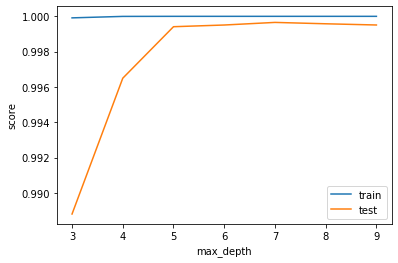

In [492]:
# Plotting the results. 

plt.figure()

plt.plot(results_1["param_max_depth"], 
         results_1["mean_train_score"], 
         label = "train")

plt.plot(results_1["param_max_depth"], 
         results_1["mean_test_score"], 
         label = "test")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [493]:
# Tuning 'gamma'.

n_folds = 3

parameters = {'gamma': range(0, 6)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 14.9min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [494]:
# Cross validation results.

results_2 = pd.DataFrame(model.cv_results_)
results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,361.200954,10.064458,2.020359,0.053101,0,{'gamma': 0},0.999738,0.999204,0.999585,0.999509,0.000224,1,1.000000,1.000000,1.0,1.000000,0.000000e+00
1,362.011708,10.024396,1.520481,0.048287,1,{'gamma': 1},0.999705,0.998851,0.999357,0.999304,0.000350,2,1.000000,1.000000,1.0,1.000000,0.000000e+00
2,376.295926,0.132813,1.426749,0.060279,2,{'gamma': 2},0.999729,0.998650,0.999471,0.999284,0.000460,3,1.000000,1.000000,1.0,1.000000,2.861240e-09
3,375.860819,1.642526,1.629134,0.153177,3,{'gamma': 3},0.999527,0.997880,0.999397,0.998935,0.000748,4,1.000000,1.000000,1.0,1.000000,2.209290e-07
4,363.890487,4.601707,0.952904,0.055594,4,{'gamma': 4},0.999515,0.995576,0.999159,0.998083,0.001779,5,0.999999,1.000000,1.0,1.000000,2.545295e-07
5,221.834864,98.442431,0.666509,0.203389,5,{'gamma': 5},0.999605,0.994705,0.998994,0.997768,0.002180,6,0.999998,0.999999,1.0,0.999999,6.824522e-07


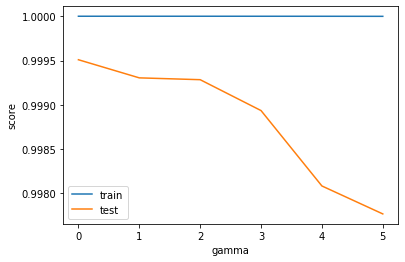

In [495]:
# Plotting the results. 

plt.figure()

plt.plot(results_2["param_gamma"], 
         results_2["mean_train_score"], 
         label = "train")

plt.plot(results_2["param_gamma"], 
         results_2["mean_test_score"], 
         label = "test")

plt.xlabel("gamma")
plt.ylabel("score")
plt.legend()
plt.show()

In [496]:
# Tuning 'subsample'.

n_folds = 3

parameters = {'subsample': np.arange(0, 1, 0.1)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.7min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [497]:
# Cross validation results.

results_3 = pd.DataFrame(model.cv_results_)
results_3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,52.776024,1.726973,0.504013,0.047373,0,{'subsample': 0.0},0.500000,0.500000,0.500000,0.500000,0.000000,10,0.500000,0.500000,0.500000,0.500000,0.000000e+00
1,275.827519,0.457099,1.890180,0.076528,0.1,{'subsample': 0.1},0.999665,0.988257,0.999541,0.995821,0.005349,9,0.999997,0.999989,0.999987,0.999991,4.341359e-06
2,299.380450,0.837998,2.365183,0.506194,0.2,{'subsample': 0.2},0.999794,0.995292,0.999447,0.998178,0.002045,7,1.000000,0.999998,0.999999,0.999999,8.760675e-07
3,313.921633,21.924378,2.062020,0.025512,0.3,{'subsample': 0.30000000000000004},0.999832,0.993894,0.999679,0.997802,0.002764,8,1.000000,0.999999,1.000000,1.000000,4.656558e-07
4,314.319188,3.371609,2.020366,0.137571,0.4,{'subsample': 0.4},0.999816,0.997638,0.999674,0.999043,0.000995,4,1.000000,1.000000,1.000000,1.000000,1.617920e-07
5,334.181161,4.745904,1.858943,0.025509,0.5,{'subsample': 0.5},0.999822,0.997124,0.999490,0.998812,0.001201,6,1.000000,1.000000,1.000000,1.000000,4.049825e-08
6,333.753782,8.547473,2.051607,0.328254,0.6,{'subsample': 0.6000000000000001},0.999812,0.997652,0.999615,0.999026,0.000975,5,1.000000,1.000000,1.000000,1.000000,1.071027e-09
7,343.130554,1.411297,1.858944,0.108979,0.7,{'subsample': 0.7000000000000001},0.999811,0.999202,0.999600,0.999537,0.000252,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,331.694778,9.499437,1.395484,0.125822,0.8,{'subsample': 0.8},0.999729,0.998918,0.999741,0.999463,0.000385,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,226.941993,9.613931,0.853976,0.097406,0.9,{'subsample': 0.9},0.999637,0.999131,0.999550,0.999440,0.000221,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00


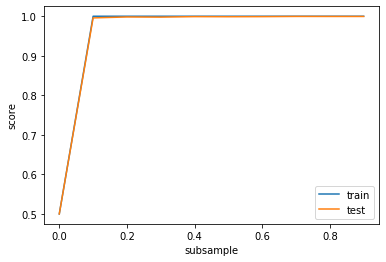

In [498]:
# Plotting the results.

plt.figure()

plt.plot(results_3["param_subsample"], 
         results_3["mean_train_score"], 
         label = "train")

plt.plot(results_3["param_subsample"], 
         results_3["mean_test_score"], 
         label = "test")

plt.xlabel("subsample")
plt.ylabel("score")
plt.legend()
plt.show()

In [499]:
# Tuning 'colsample_bytree'.

n_folds = 3

parameters = {'colsample_bytree': np.arange(0, 1, 0.1)}

xgb = XGBClassifier(random_state = 0)

model = GridSearchCV(estimator = xgb, param_grid = parameters, cv = n_folds, scoring = "roc_auc", return_train_score = True, n_jobs = -1, verbose = 1)

model.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.5min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [500]:
# Cross validation results.

results_4 = pd.DataFrame(model.cv_results_)
results_4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,21.786478,0.702310,1.987753,0.403456,0,{'colsample_bytree': 0.0},0.988621,0.939732,0.978268,0.968874,0.021035,10,0.998455,0.998983,0.998635,0.998691,2.190423e-04
1,30.095715,0.388249,1.598583,0.019483,0.1,{'colsample_bytree': 0.1},0.997007,0.966494,0.993148,0.985550,0.013566,9,0.999995,0.999991,0.999993,0.999993,1.449855e-06
2,86.458965,9.779185,1.994330,0.095735,0.2,{'colsample_bytree': 0.2},0.999391,0.998198,0.998173,0.998587,0.000569,8,1.000000,1.000000,1.000000,1.000000,3.494917e-09
3,107.979070,1.187381,1.890185,0.058448,0.3,{'colsample_bytree': 0.30000000000000004},0.999363,0.998950,0.999166,0.999160,0.000168,7,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,137.870689,7.184811,1.705281,0.136756,0.4,{'colsample_bytree': 0.4},0.999667,0.999097,0.999295,0.999353,0.000236,5,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,167.239818,1.804137,1.841242,0.023697,0.5,{'colsample_bytree': 0.5},0.999446,0.999138,0.999335,0.999306,0.000127,6,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,227.880783,0.386662,1.869355,0.122561,0.6,{'colsample_bytree': 0.6000000000000001},0.999602,0.999248,0.999329,0.999393,0.000152,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
7,259.469346,3.068992,1.952670,0.349538,0.7,{'colsample_bytree': 0.7000000000000001},0.999633,0.999231,0.999522,0.999462,0.000170,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,263.926705,26.104657,1.369460,0.130296,0.8,{'colsample_bytree': 0.8},0.999559,0.999133,0.999571,0.999421,0.000204,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,235.307897,11.554303,0.926893,0.127727,0.9,{'colsample_bytree': 0.9},0.999800,0.999409,0.999491,0.999567,0.000169,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00


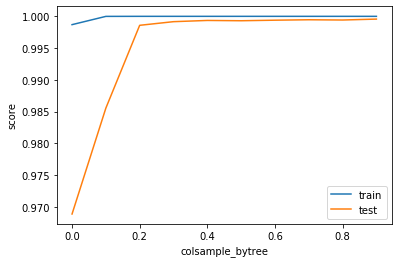

In [501]:
# Plotting the results. 

plt.figure()

plt.plot(results_4["param_colsample_bytree"], 
         results_4["mean_train_score"], 
         label = "train")

plt.plot(results_4["param_colsample_bytree"], 
         results_4["mean_test_score"], 
         label = "test")

plt.xlabel("colsample_bytree")
plt.ylabel("score")
plt.legend()
plt.show()

In [502]:
# Grid Search to find Optimal Hyperparameters.
# Creating the parameter grid based on the results of random search.

param_grid = {'max_depth': [5, 7], 
              'gamma': [0], 
              'subsample': [0.1], 
              'colsample_bytree': [0.2]}

xgb = XGBClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [503]:
# Fitting the grid search to the train data.

grid_search.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   47.0s finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [504]:
# Printing the optimal hyperparameters.

print(grid_search.best_params_)

{'colsample_bytree': 0.2, 'gamma': 0, 'max_depth': 5, 'subsample': 0.1}


In [505]:
# Fitting the final model with the best parameters obtained from grid search.

xgb = XGBClassifier(booster = 'gbtree',
                    learning_rate = 0.2,
                    max_depth = 5, 
                    gamma = 0,
                    subsample = 0.1, 
                    colsample_bytree = 0.2, 
                    random_state = 0)

In [506]:
# Fitting our final tuned model on train data.

xgb.fit(X_adasyn, y_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [507]:
# Predictions on test data.

predictions = xgb.predict(X_test)

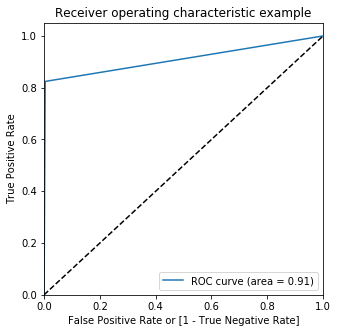

In [508]:
# Drawing ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, drop_intermediate = False)

draw_roc(y_test, predictions)

In [509]:
# Returning the roc_auc_score.

y_true = np.array(y_test)
y_scores = predictions
roc_auc_score(y_true, y_scores)

0.9101221832653921

In [510]:
# Confusion matrix.

confusion_matrix_27 = confusion_matrix(y_test, predictions)
print(confusion_matrix_27)

[[84947   348]
 [   26   122]]


In [511]:
# Let's check the overall accuracy.

Accuracy = accuracy_score(y_test, predictions)
Accuracy

0.9956228128693984

In [512]:
TP = confusion_matrix_27[1,1] # true positive 
TN = confusion_matrix_27[0,0] # true negatives
FP = confusion_matrix_27[0,1] # false positives
FN = confusion_matrix_27[1,0] # false negatives

In [513]:
# Let's see the sensitivity of our XGBoost model.

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8243243243243243

In [514]:
# Let's see the specificity of our XGBoost model.

Specificity = TN / float(TN+FP)
Specificity

0.9959200422064599

In [515]:
# Let's see the precision of our XGBoost model.

Precision = TP / float(TP+FP)
Precision

0.25957446808510637

In [516]:
# Let's see the F1 score of our XGBoost model.

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.3948220064724918

**XGBoost model evaluation metrics on test data using ADASYN without hyperparameter tuning are:**
- **Accuracy - 99.92%**
- **Sensitivity - 80.40%**
- **Specificity - 99.95%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.90**

**XGBoost model evaluation metrics on test data using ADASYN after hyperparameter tuning are:**
- **Accuracy - 99.56%**
- **Sensitivity - 82.43%**
- **Specificity - 99.59%**
- **Precision - 25.95%**
- **F1 score - 39.48%**

**Area Under Curve - roc_auc_score:**
- **ROC curve area - 0.91**

In [517]:
# Dataframe containing all the metrics for each model we've built so far using ADASYN.

adasyn_metrics = pd.DataFrame({'Metrics': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 score', 'ROC_AUC'], 
                               'Decision Trees': [87.41, 93.91, 87.40, 1.27, 2.52, 0.91], 
                               'Random Forests': [98.93, 83.10, 98.96, 12.21, 21.29, 0.91], 
                               'XGBoost': [99.56, 82.43, 99.59, 25.95, 39.48, 0.91]})
adasyn_metrics

,Metrics,Decision Trees,Random Forests,XGBoost
0,Accuracy,87.41,98.93,99.56
1,Sensitivity,93.91,83.10,82.43
2,Specificity,87.40,98.96,99.59
3,Precision,1.27,12.21,25.95
4,F1 score,2.52,21.29,39.48
5,ROC_AUC,0.91,0.91,0.91


# Final model and its metrics

**Of all the models we've tried so far, XGBoost balanced with ADASYN has outperformed other models.**

In [518]:
adasyn_metrics.set_index('Metrics', inplace = True)

adasyn_metrics['XGBoost']

Metrics
Accuracy       99.56
Sensitivity    82.43
Specificity    99.59
Precision      25.95
F1 score       39.48
ROC_AUC         0.91
Name: XGBoost, dtype: float64

In [519]:
from xgboost import plot_importance

# Feature importance

importance = dict(zip(X_train.columns, xgb.feature_importances_))
importance

{'V1': 0.027430538,
 'V2': 0.025016254,
 'V3': 0.04338598,
 'V4': 0.27072164,
 'V5': 0.011291371,
 'V6': 0.015755033,
 'V7': 0.023868138,
 'V8': 0.039686244,
 'V9': 0.0253378,
 'V10': 0.04123112,
 'V11': 0.028606867,
 'V12': 0.028072027,
 'V13': 0.017945433,
 'V14': 0.016085202,
 'V15': 0.020410702,
 'V16': 0.013841951,
 'V17': 0.10777526,
 'V18': 0.020797178,
 'V19': 0.018233392,
 'V20': 0.028973099,
 'V21': 0.014792905,
 'V22': 0.014020467,
 'V23': 0.018904544,
 'V24': 0.022426657,
 'V25': 0.022415053,
 'V26': 0.01646577,
 'V27': 0.014278144,
 'V28': 0.02296597,
 'Amount': 0.029265342}

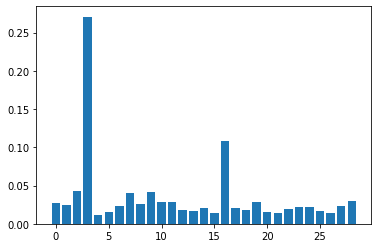

In [520]:
# Plot

plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

**From the above plot the top three features given by our model are:**
- V4
- V17
- V3